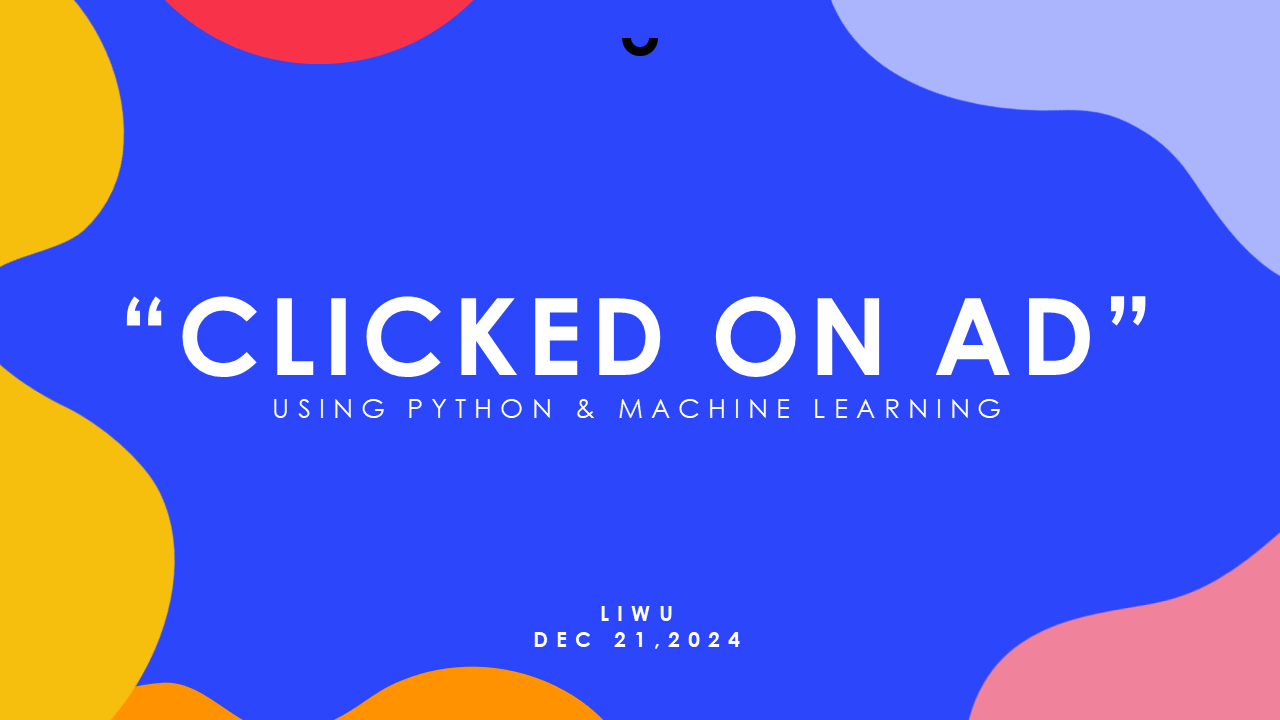

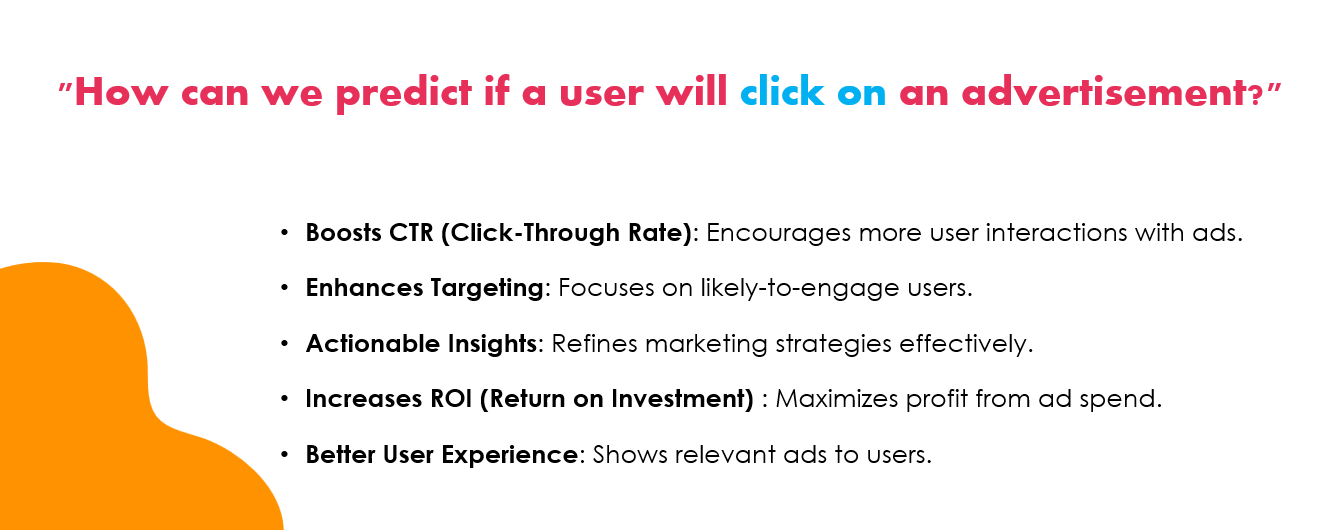


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from scipy import stats
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb

import re
from nltk import word_tokenize, TreebankWordTokenizer, bigrams, pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

import shap
import pickle

import warnings
warnings.filterwarnings('ignore')

seed=33

In [2]:
data = pd.read_csv('ad_click_dataset_combined.csv')
data

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                        49.21  30.0          NaN                201.58   
1                        51.65  51.0     74535.94                188.56   
2                        47.64  29.0     53431.35                200.71   
3                        55.60  24.0     52252.91                167.22   
4                        78.84  27.0     69646.35                239.32   
...                        ...   ...          ...                   ...   
2995                     44.33  36.0     61610.05                140.46   
2996                     80.03  42.0     60514.05                243.61   
2997                     41.73  31.0     61840.26                207.17   
2998                     41.73  28.0     51501.38                120.49   
2999                     46.61  50.0     43974.49                123.13   

                                   Ad Topic Line             City  Gender  \
0            Total 5thgeneration standardization     West Richard  Female   
1     Function-based incremental standardization      Edwardmouth  Female   
2                Digitized content-based circuit      East Carlos  Female   
3        Configurable disintermediate throughput     North Daniel  Female   
4        Front-line bandwidth-monitored capacity         Johnstad  Female   
...                                          ...              ...     ...   
2995          Multi-layered user-facing paradigm      Sanchezland  Female   
2996               Innovative interactive portal    Lake Jennifer  Female   
2997              Profound executive flexibility  West Angelabury    Male   
2998              Managed zero tolerance concept      Kennedyfurt    Male   
2999            Realigned content-based leverage   North Samantha  Female   

             Country            Timestamp  Clicked on Ad  
0              Qatar  2016-07-21 10:54:35              1  
1           Cameroon  2016-01-31 05:12:44              0  
2            Burundi  2016-03-09 00:41:46              0  
3             Guinea  2016-06-11 06:47:55              1  
4              Spain  2016-05-21 01:36:16              0  
...              ...                  ...            ...  
2995          Uganda  2016-07-01 01:12:04              1  
2996  Czech Republic  2016-04-06 11:24:21              1  
2997       Singapore  2016-01-03 03:22:15              1  
2998      Luxembourg  2016-05-28 12:20:15              0  
2999          Malawi  2016-04-04 07:07:46              1  

[3000 rows x 10 columns]

In [4]:
df = data.copy()

In [5]:
df

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                        49.21  30.0          NaN                201.58   
1                        51.65  51.0     74535.94                188.56   
2                        47.64  29.0     53431.35                200.71   
3                        55.60  24.0     52252.91                167.22   
4                        78.84  27.0     69646.35                239.32   
...                        ...   ...          ...                   ...   
2995                     44.33  36.0     61610.05                140.46   
2996                     80.03  42.0     60514.05                243.61   
2997                     41.73  31.0     61840.26                207.17   
2998                     41.73  28.0     51501.38                120.49   
2999                     46.61  50.0     43974.49                123.13   

                                   Ad Topic Line             City  Gender  \
0            Total 5thgeneration standardization     West Richard  Female   
1     Function-based incremental standardization      Edwardmouth  Female   
2                Digitized content-based circuit      East Carlos  Female   
3        Configurable disintermediate throughput     North Daniel  Female   
4        Front-line bandwidth-monitored capacity         Johnstad  Female   
...                                          ...              ...     ...   
2995          Multi-layered user-facing paradigm      Sanchezland  Female   
2996               Innovative interactive portal    Lake Jennifer  Female   
2997              Profound executive flexibility  West Angelabury    Male   
2998              Managed zero tolerance concept      Kennedyfurt    Male   
2999            Realigned content-based leverage   North Samantha  Female   

             Country            Timestamp  Clicked on Ad  
0              Qatar  2016-07-21 10:54:35              1  
1           Cameroon  2016-01-31 05:12:44              0  
2            Burundi  2016-03-09 00:41:46              0  
3             Guinea  2016-06-11 06:47:55              1  
4              Spain  2016-05-21 01:36:16              0  
...              ...                  ...            ...  
2995          Uganda  2016-07-01 01:12:04              1  
2996  Czech Republic  2016-04-06 11:24:21              1  
2997       Singapore  2016-01-03 03:22:15              1  
2998      Luxembourg  2016-05-28 12:20:15              0  
2999          Malawi  2016-04-04 07:07:46              1  

[3000 rows x 10 columns]

# Getting Familiar With Data

In [11]:
df.shape

(3000, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  3000 non-null   float64
 1   Age                       2976 non-null   float64
 2   Area Income               2969 non-null   float64
 3   Daily Internet Usage      3000 non-null   float64
 4   Ad Topic Line             3000 non-null   object 
 5   City                      2967 non-null   object 
 6   Gender                    2977 non-null   object 
 7   Country                   2972 non-null   object 
 8   Timestamp                 3000 non-null   object 
 9   Clicked on Ad             3000 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 234.5+ KB


In [13]:
df.isnull().sum()

Daily Time Spent on Site     0
Age                         24
Area Income                 31
Daily Internet Usage         0
Ad Topic Line                0
City                        33
Gender                      23
Country                     28
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [14]:
#calculatin no. of missing values for each column and it's percentage

def percentage_of_miss():
  df1=df[df.columns[df.isnull().sum()>=1]]
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = round((df1.isnull().sum()/df.shape[0]*100),2).sort_values(ascending=False)
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage(%)'])
  return(missing_data)

In [15]:
percentage_of_miss()

Number of Missing  Percentage(%)
City                        33           1.10
Area Income                 31           1.03
Country                     28           0.93
Age                         24           0.80
Gender                      23           0.77

### The dataset contains a small proportion of missing values, with the highest percentage in the `"City" column (1.10%)`, followed by `"Area Income" (1.03%), "Country" (0.93%), "Age" (0.80%), and "Gender" (0.77%)`.
### `'Clicked on Ad'` is the target variable.

# ⬛ DATA PREPARATION ⬛

## 🔴 Handling Duplicated Data

In [16]:
df.duplicated().sum()

31

In [17]:
df.drop_duplicates(inplace=True)
df

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                        49.21  30.0          NaN                201.58   
1                        51.65  51.0     74535.94                188.56   
2                        47.64  29.0     53431.35                200.71   
3                        55.60  24.0     52252.91                167.22   
4                        78.84  27.0     69646.35                239.32   
...                        ...   ...          ...                   ...   
2995                     44.33  36.0     61610.05                140.46   
2996                     80.03  42.0     60514.05                243.61   
2997                     41.73  31.0     61840.26                207.17   
2998                     41.73  28.0     51501.38                120.49   
2999                     46.61  50.0     43974.49                123.13   

                                   Ad Topic Line             City  Gender  \
0            Total 5thgeneration standardization     West Richard  Female   
1     Function-based incremental standardization      Edwardmouth  Female   
2                Digitized content-based circuit      East Carlos  Female   
3        Configurable disintermediate throughput     North Daniel  Female   
4        Front-line bandwidth-monitored capacity         Johnstad  Female   
...                                          ...              ...     ...   
2995          Multi-layered user-facing paradigm      Sanchezland  Female   
2996               Innovative interactive portal    Lake Jennifer  Female   
2997              Profound executive flexibility  West Angelabury    Male   
2998              Managed zero tolerance concept      Kennedyfurt    Male   
2999            Realigned content-based leverage   North Samantha  Female   

             Country            Timestamp  Clicked on Ad  
0              Qatar  2016-07-21 10:54:35              1  
1           Cameroon  2016-01-31 05:12:44              0  
2            Burundi  2016-03-09 00:41:46              0  
3             Guinea  2016-06-11 06:47:55              1  
4              Spain  2016-05-21 01:36:16              0  
...              ...                  ...            ...  
2995          Uganda  2016-07-01 01:12:04              1  
2996  Czech Republic  2016-04-06 11:24:21              1  
2997       Singapore  2016-01-03 03:22:15              1  
2998      Luxembourg  2016-05-28 12:20:15              0  
2999          Malawi  2016-04-04 07:07:46              1  

[2969 rows x 10 columns]

## 🔴 Handling Time-Series Data

In [197]:
pd.set_option('display.max_rows',500)

In [198]:
df['Timestamp'].value_counts()

Timestamp
2016-03-11 00:05:48    74
2016-04-06 11:24:21    63
2016-07-03 04:11:40    62
2016-04-03 21:13:46    55
2016-05-19 14:30:17    52
2016-04-04 20:01:12    50
2016-06-21 14:32:32    45
2016-05-08 22:24:27    43
2016-04-28 22:54:37    41
2016-07-08 03:47:41    41
2016-03-05 12:03:41    38
2016-01-03 16:01:40    35
2016-05-08 10:25:08    35
2016-04-17 21:39:11    34
2016-04-07 15:18:10    32
2016-01-05 16:26:44    32
2016-02-27 08:52:50    31
2016-03-18 13:22:35    31
2016-03-31 20:55:22    31
2016-06-16 02:01:24    29
2016-07-17 01:13:56    29
2016-07-18 01:36:37    28
2016-06-12 21:21:53    27
2016-04-27 04:28:17    27
2016-02-15 16:52:04    24
2016-06-29 10:50:45    24
2016-01-05 20:58:42    23
2016-05-31 23:42:26    23
2016-02-19 20:49:27    23
2016-05-13 11:57:12    23
2016-01-01 15:14:24    22
2016-01-03 07:13:53    22
2016-01-15 19:40:47    22
2016-01-09 03:45:19    22
2016-03-11 06:49:10    21
2016-06-09 21:43:05    20
2016-01-26 02:47:17    20
2016-05-12 21:32:06    20
20

In [199]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [200]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute

In [201]:
df

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                        49.21 30.00          NaN                201.58   
1                        51.65 51.00     74535.94                188.56   
2                        47.64 29.00     53431.35                200.71   
3                        55.60 24.00     52252.91                167.22   
4                        78.84 27.00     69646.35                239.32   
...                        ...   ...          ...                   ...   
2995                     44.33 36.00     61610.05                140.46   
2996                     80.03 42.00     60514.05                243.61   
2997                     41.73 31.00     61840.26                207.17   
2998                     41.73 28.00     51501.38                120.49   
2999                     46.61 50.00     43974.49                123.13   

                                   Ad Topic Line             City  Gender  \
0            Total 5thgeneration standardization     West Richard  Female   
1     Function-based incremental standardization      Edwardmouth  Female   
2                Digitized content-based circuit      East Carlos  Female   
3        Configurable disintermediate throughput     North Daniel  Female   
4        Front-line bandwidth-monitored capacity         Johnstad  Female   
...                                          ...              ...     ...   
2995          Multi-layered user-facing paradigm      Sanchezland  Female   
2996               Innovative interactive portal    Lake Jennifer  Female   
2997              Profound executive flexibility  West Angelabury    Male   
2998              Managed zero tolerance concept      Kennedyfurt    Male   
2999            Realigned content-based leverage   North Samantha  Female   

             Country           Timestamp  Clicked on Ad  Year  Month  Day  \
0              Qatar 2016-07-21 10:54:35              1  2016      7   21   
1           Cameroon 2016-01-31 05:12:44              0  2016      1   31   
2            Burundi 2016-03-09 00:41:46              0  2016      3    9   
3             Guinea 2016-06-11 06:47:55              1  2016      6   11   
4              Spain 2016-05-21 01:36:16              0  2016      5   21   
...              ...                 ...            ...   ...    ...  ...   
2995          Uganda 2016-07-01 01:12:04              1  2016      7    1   
2996  Czech Republic 2016-04-06 11:24:21              1  2016      4    6   
2997       Singapore 2016-01-03 03:22:15              1  2016      1    3   
2998      Luxembourg 2016-05-28 12:20:15              0  2016      5   28   
2999          Malawi 2016-04-04 07:07:46              1  2016      4    4   

      Hour  Minute  
0       10      54  
1        5      12  
2        0      41  
3        6      47  
4        1      36  
...    ...     ...  
2995     1      12  
2996    11      24  
2997     3      22  
2998    12      20  
2999     7       7  

[2969 rows x 15 columns]

In [202]:
df['Timestamp_Combined'] = (
    df['Year'].astype(str) +
    df['Month'].astype(str).str.zfill(2) +
    df['Day'].astype(str).str.zfill(2) +
    df['Hour'].astype(str).str.zfill(2) +
    df['Minute'].astype(str).str.zfill(2)
)

In [203]:
df['Timestamp_Combined'] = df['Timestamp_Combined'].astype(float)

In [204]:
df

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                        49.21 30.00          NaN                201.58   
1                        51.65 51.00     74535.94                188.56   
2                        47.64 29.00     53431.35                200.71   
3                        55.60 24.00     52252.91                167.22   
4                        78.84 27.00     69646.35                239.32   
...                        ...   ...          ...                   ...   
2995                     44.33 36.00     61610.05                140.46   
2996                     80.03 42.00     60514.05                243.61   
2997                     41.73 31.00     61840.26                207.17   
2998                     41.73 28.00     51501.38                120.49   
2999                     46.61 50.00     43974.49                123.13   

                                   Ad Topic Line             City  Gender  \
0            Total 5thgeneration standardization     West Richard  Female   
1     Function-based incremental standardization      Edwardmouth  Female   
2                Digitized content-based circuit      East Carlos  Female   
3        Configurable disintermediate throughput     North Daniel  Female   
4        Front-line bandwidth-monitored capacity         Johnstad  Female   
...                                          ...              ...     ...   
2995          Multi-layered user-facing paradigm      Sanchezland  Female   
2996               Innovative interactive portal    Lake Jennifer  Female   
2997              Profound executive flexibility  West Angelabury    Male   
2998              Managed zero tolerance concept      Kennedyfurt    Male   
2999            Realigned content-based leverage   North Samantha  Female   

             Country           Timestamp  Clicked on Ad  Year  Month  Day  \
0              Qatar 2016-07-21 10:54:35              1  2016      7   21   
1           Cameroon 2016-01-31 05:12:44              0  2016      1   31   
2            Burundi 2016-03-09 00:41:46              0  2016      3    9   
3             Guinea 2016-06-11 06:47:55              1  2016      6   11   
4              Spain 2016-05-21 01:36:16              0  2016      5   21   
...              ...                 ...            ...   ...    ...  ...   
2995          Uganda 2016-07-01 01:12:04              1  2016      7    1   
2996  Czech Republic 2016-04-06 11:24:21              1  2016      4    6   
2997       Singapore 2016-01-03 03:22:15              1  2016      1    3   
2998      Luxembourg 2016-05-28 12:20:15              0  2016      5   28   
2999          Malawi 2016-04-04 07:07:46              1  2016      4    4   

      Hour  Minute  Timestamp_Combined  
0       10      54     201607211054.00  
1        5      12     201601310512.00  
2        0      41     201603090041.00  
3        6      47     201606110647.00  
4        1      36     201605210136.00  
...    ...     ...                 ...  
2995     1      12     201607010112.00  
2996    11      24     201604061124.00  
2997     3      22     201601030322.00  
2998    12      20     201605281220.00  
2999     7       7     201604040707.00  

[2969 rows x 16 columns]

# ⬛ UNIVARIATE ANALYSIS ⬛

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2969 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  2969 non-null   float64       
 1   Age                       2945 non-null   float64       
 2   Area Income               2938 non-null   float64       
 3   Daily Internet Usage      2969 non-null   float64       
 4   Ad Topic Line             2969 non-null   object        
 5   City                      2936 non-null   object        
 6   Gender                    2946 non-null   object        
 7   Country                   2941 non-null   object        
 8   Timestamp                 2969 non-null   datetime64[ns]
 9   Clicked on Ad             2969 non-null   int64         
 10  Year                      2969 non-null   int32         
 11  Month                     2969 non-null   int32         
 12  Day                      

## Target Variable "Clicked on Ad"

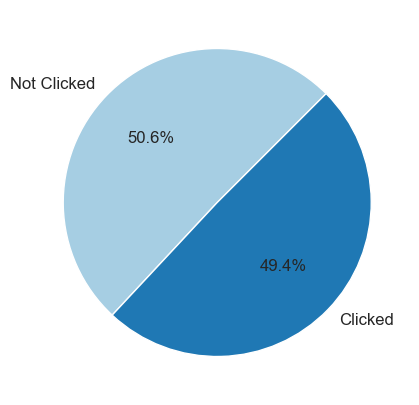

In [221]:
plt.figure(figsize=(5,5))

target = df['Clicked on Ad'].value_counts()
custom_labels = ['Not Clicked', 'Clicked']
plt.pie(target, labels=custom_labels, autopct='%1.1f%%', startangle=45, colors=plt.cm.Paired.colors,textprops={'fontsize': 12})

plt.show()

### The dataset is balanced, with "Clicked on Ad" showing an almost even split between Clicked (49.4%) and Not Clicked (50.6%).

In [222]:
col_num = ['Timestamp_Combined', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
col_cat = ['Ad Topic Line', 'Gender', 'City', 'Country']

In [223]:
pd.options.display.float_format = "{:.2f}".format

## 🔴 Numerical Variables

In [224]:
df[col_num].describe()

Timestamp_Combined  Daily Time Spent on Site     Age  Area Income  \
count             2969.00                   2969.00 2945.00      2938.00   
mean      201603986068.18                     61.70   40.93     53758.88   
std            1969771.50                     15.82   71.35     13443.63   
min       201601010531.00                     32.91   19.00     13996.50   
25%       201602220704.00                     48.03   29.00     43974.49   
50%       201604061124.00                     59.59   35.00     56180.93   
75%       201605312342.00                     77.14   42.00     61840.26   
max       201607230618.00                     90.97  999.00     79332.33   

       Daily Internet Usage  
count               2969.00  
mean                 178.54  
std                   40.69  
min                  105.86  
25%                  140.46  
50%                  178.92  
75%                  212.38  
max                  269.96

In [225]:
# Visualization for Numerical Variables

def num_histplot(df,row,col):
    fig, axes = plt.subplots(row,col, figsize=(22,18))
    axes = axes.flatten()

    for i, val in enumerate(df[col_num]):
        sns.histplot(data=df, x=val, ax=axes[i], kde=True, color='#67B3FA')  
        axes[i].set_xlabel(val, fontsize=16) 
        axes[i].set_ylabel('Count', fontsize=16)
        axes[i].tick_params(axis='x', labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)
    sns.set_style("darkgrid")
    plt.show()


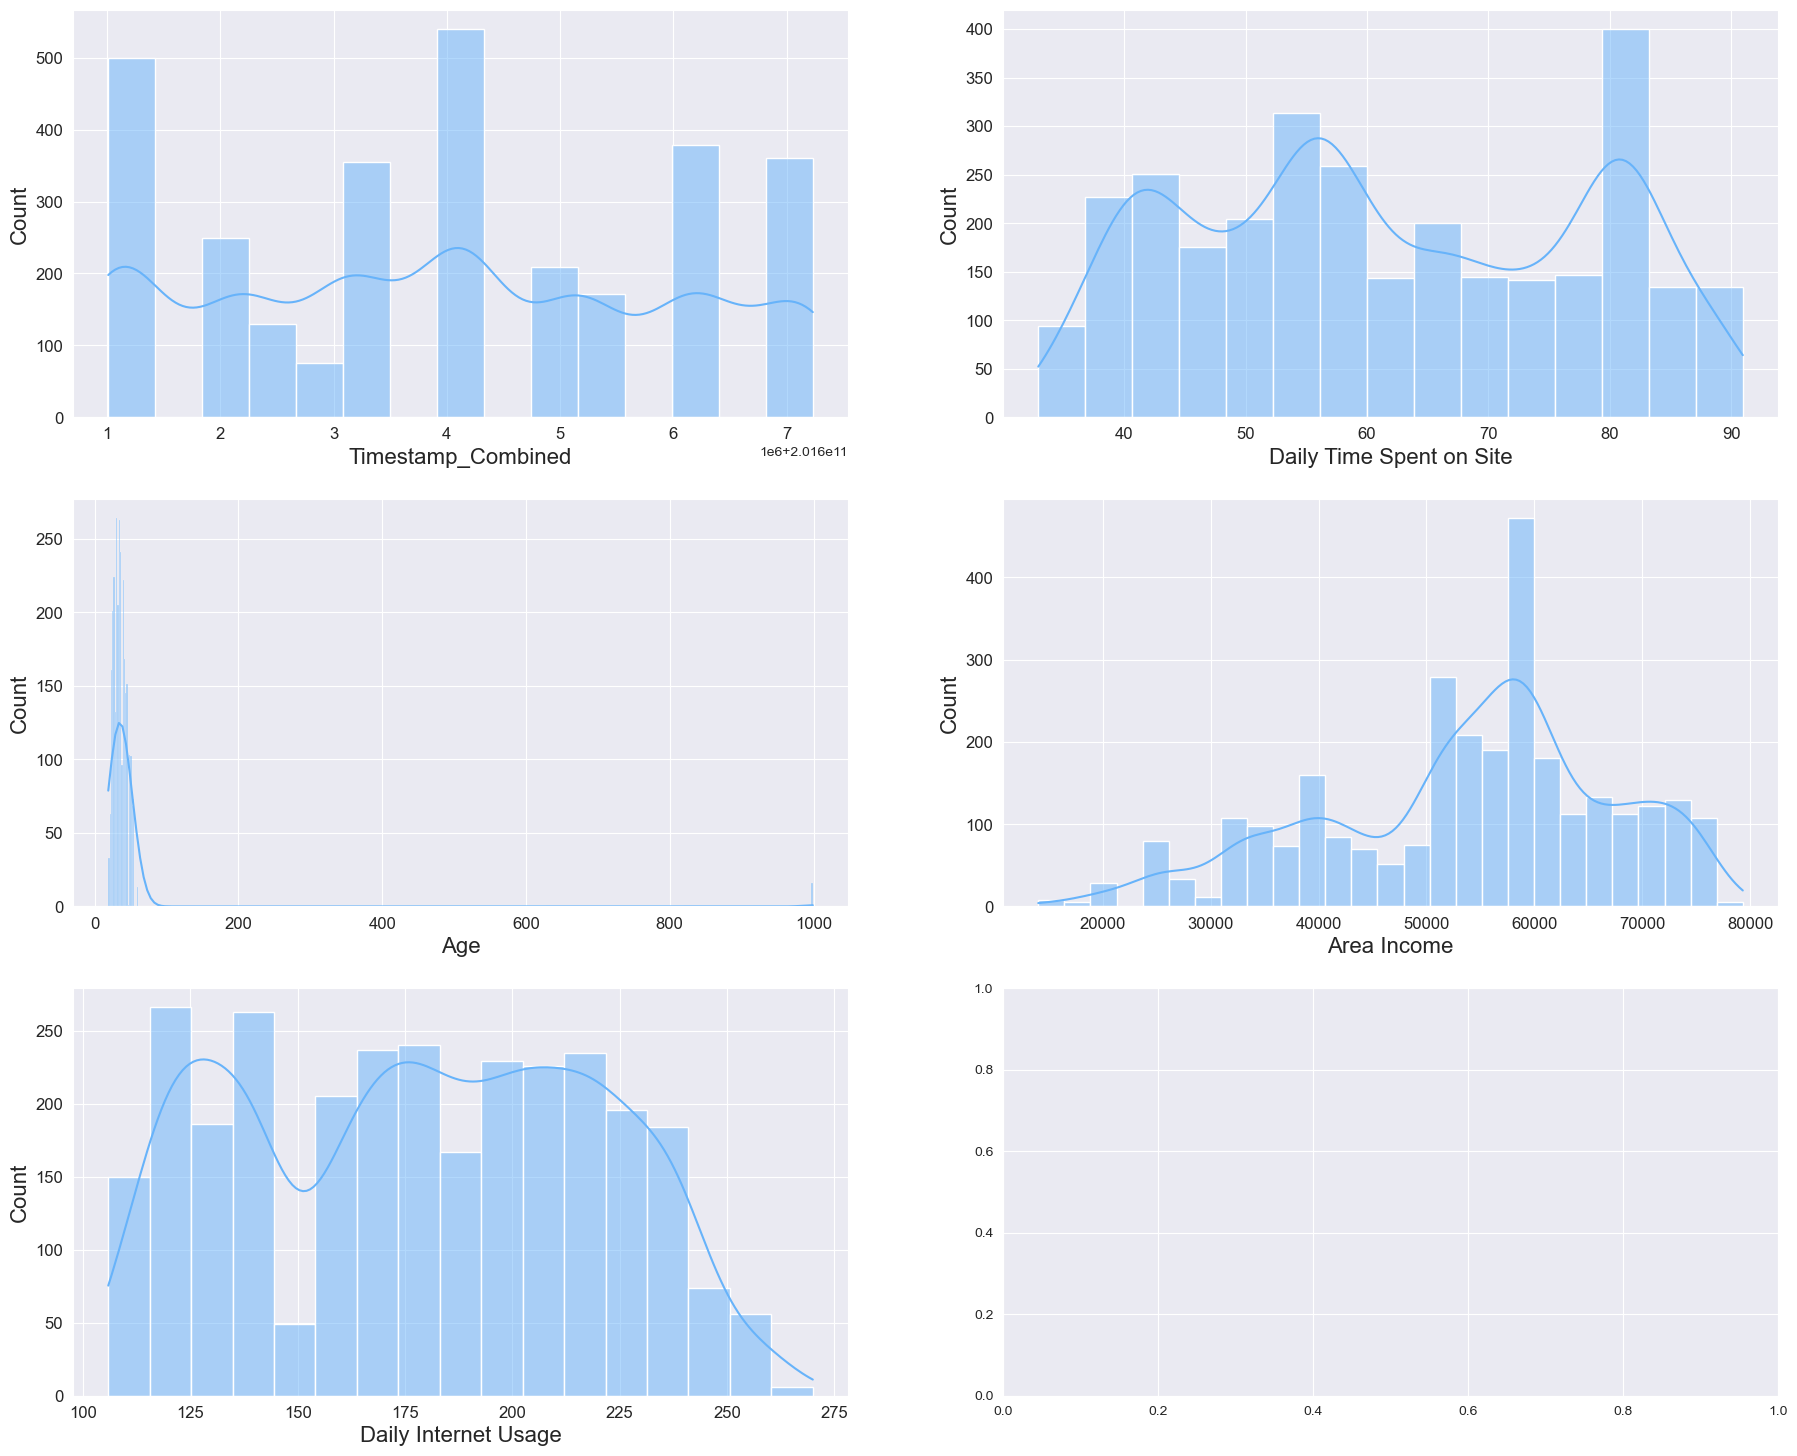

In [226]:
num_histplot(df,3,2)

In [227]:
df[col_num].skew()

Timestamp_Combined          0.06
Daily Time Spent on Site    0.09
Age                        13.17
Area Income                -0.51
Daily Internet Usage       -0.01
dtype: float64

In [228]:
def num_boxplot(df,row,col):
    fig, axes = plt.subplots(row,col, figsize=(22,18))
    axes = axes.flatten()

    for i, val in enumerate(df[col_num]):
        sns.boxplot(data=df, x=val,ax=axes[i],color='#67B3FA')
        axes[i].set_xlabel(val, fontsize=16) 
        axes[i].set_ylabel('Count', fontsize=16)
        axes[i].tick_params(axis='x', labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)
    sns.set_style("darkgrid")
    plt.show()
    

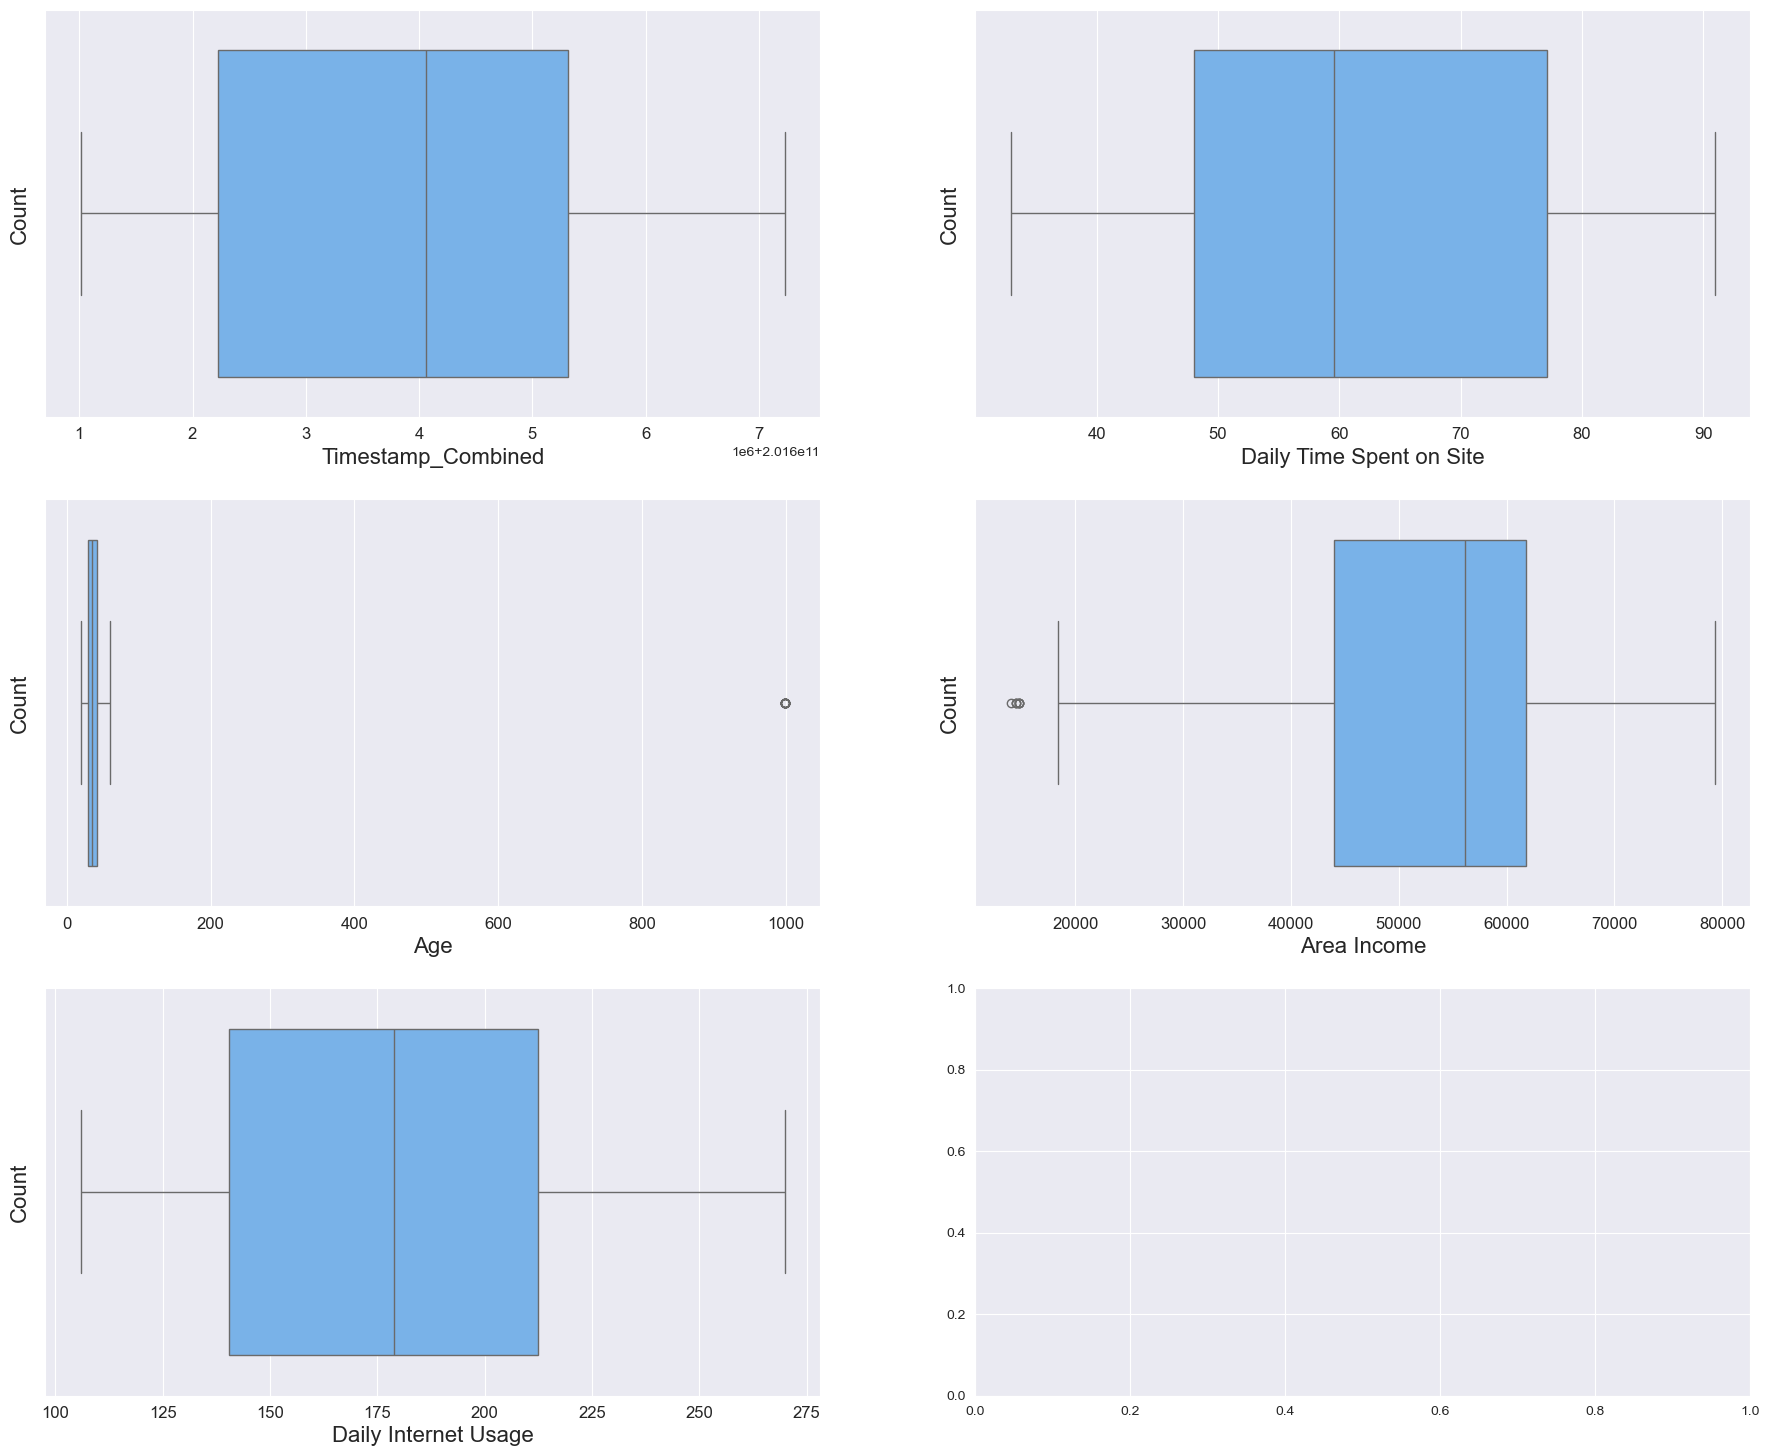

In [229]:
num_boxplot(df,3,2)

### We observed potential noise in the `'Area Income'` column and identified some extreme values in the `'Age'` column. To further investigate, we will use the `"Tukey Method"` and the `"Mean and Standard Deviation Method"` to detect outliers in these columns.

## 🔴 Outliers

### `Method 1`: Turkey Method

In [31]:
def turkey_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_outer_fence = Q1-3*IQR
    upper_outer_fence = Q3+3*IQR
    df_outliers = df[(df[col]<lower_outer_fence) | (df[col]>upper_outer_fence)]

    print('The lower bound value is:', lower_outer_fence)
    print('The upper bound value is:', upper_outer_fence)
    print(f'Total number of outliers in column "{col}" are:', df_outliers.shape[0])

    plt.figure(figsize=(8,5))
    sns.histplot(df[col], edgecolor='white', kde=False)
    plt.axvspan(xmin=lower_outer_fence, xmax=df[col].min(), alpha=0.2, color='red')
    plt.axvspan(xmin=upper_outer_fence, xmax=df[col].max(), alpha=0.2, color='red')
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sns.set_style("darkgrid") 
    plt.show()

The lower bound value is: -9622.820000000014
The upper bound value is: 115437.57
Total number of outliers in column "Area Income" are: 0


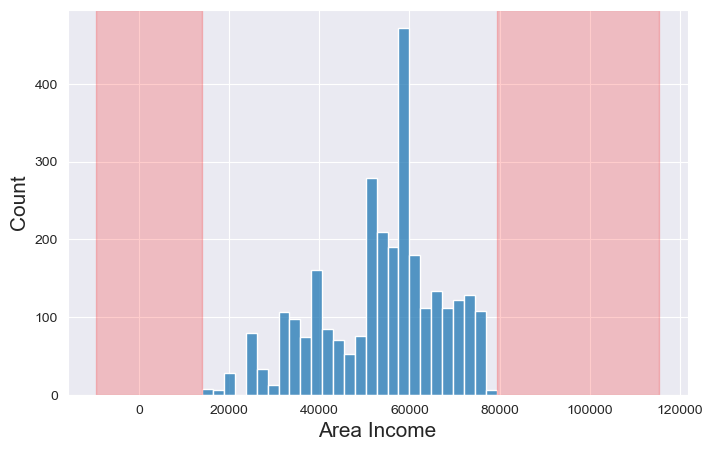

In [32]:
turkey_outliers(df, 'Area Income')

The lower bound value is: -10.0
The upper bound value is: 81.0
Total number of outliers in column "Age" are: 16


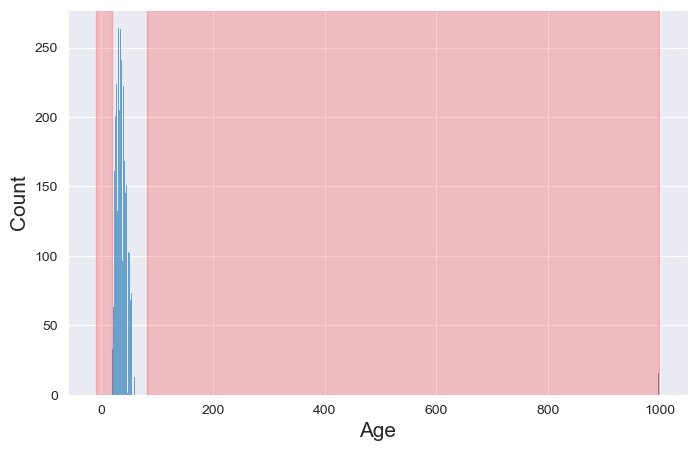

In [33]:
turkey_outliers(df, 'Age')

### `Method 2`: Mean and Standard Deviation Method

In [34]:
def std_outliers(df,col,threshold):
    mean, std = df[col].mean(), df[col].std()
    cut_off = std*threshold
    lower, upper = mean-cut_off, mean+cut_off
    print('The lower bound value is:', lower)
    print('The upper bound value is:', upper)

    df_lower = df[df[col] < lower]
    df_upper = df[df[col] > upper]
    print(f'Total number of outliers in column "{col}" are:', df_lower.shape[0]+df_upper.shape[0])

    plt.figure(figsize=(8,5))
    sns.histplot(df[col], edgecolor='white', kde=False)
    plt.axvspan(xmin=lower, xmax=df[col].min(), alpha=0.2, color='red')
    plt.axvspan(xmin=upper, xmax=df[col].max(), alpha=0.2, color='red')
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sns.set_style("darkgrid") 
    plt.show()

The lower bound value is: 13427.976305585013
The upper bound value is: 94089.78577065733
Total number of outliers in column "Area Income" are: 0


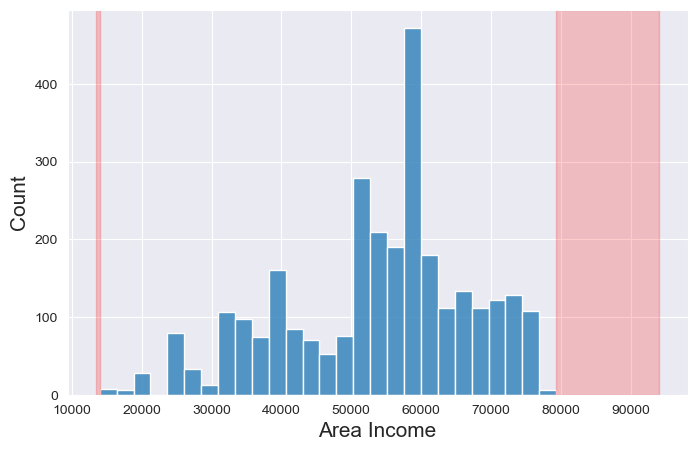

In [35]:
std_outliers(df,'Area Income',3)

The lower bound value is: -173.10239014850143
The upper bound value is: 254.97064142184607
Total number of outliers in column "Age" are: 16


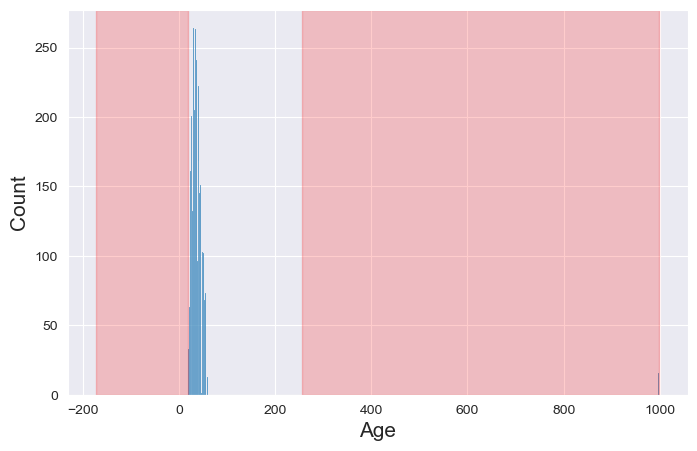

In [36]:
std_outliers(df,'Age',3)

In [230]:
df['Age'].describe()

count   2945.00
mean      40.93
std       71.35
min       19.00
25%       29.00
50%       35.00
75%       42.00
max      999.00
Name: Age, dtype: float64

In [231]:
df['Age'].quantile([0.95, 0.99])

0.95   52.00
0.99   55.00
Name: Age, dtype: float64

In [232]:
df[df['Age']==999].shape

(16, 16)

### The `'Area Income'` column contains some noise, but these values are not considered outliers.

### For both methods, the `'Age'` column contains some extreme values, such as an apparent typo with an age value of 999. Since there are only 16 such instances in the dataset, we will replace these outliers with `NaN` values for now.

In [233]:
df['Age']=df['Age'].replace(999, np.NaN)

In [234]:
df['Age'].isnull().sum()

40

In [235]:
df['Age'].describe()

count   2929.00
mean      35.70
std        8.65
min       19.00
25%       29.00
50%       35.00
75%       42.00
max       60.00
Name: Age, dtype: float64

In [236]:
df.Age.skew()

0.391142121833947

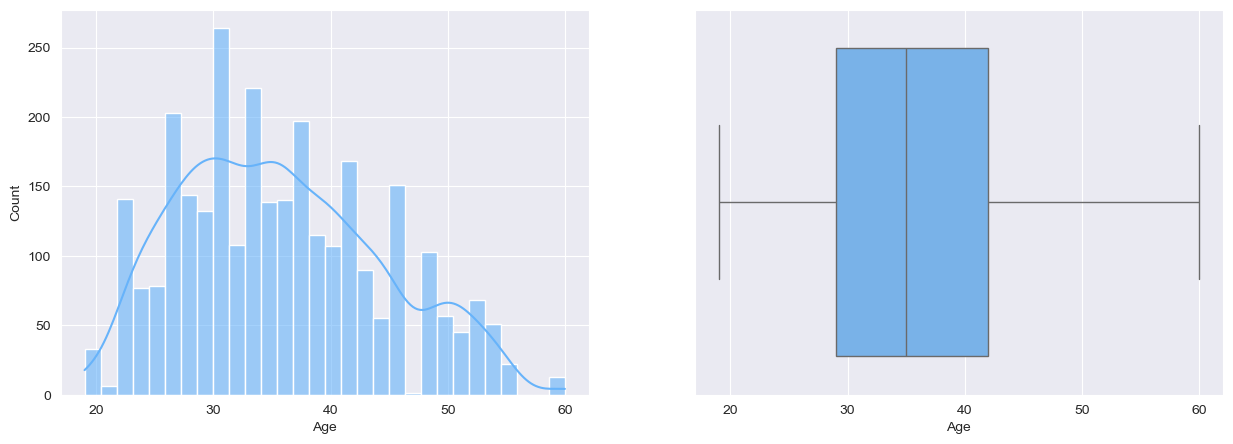

In [237]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.histplot(df['Age'], ax=ax[0], bins=30, kde=True, color='#67B3FA', edgecolor='white', alpha=0.6)
sns.boxplot(x=df['Age'], ax=ax[1], color='#67B3FA')

sns.set_style("darkgrid")  
plt.show()

## 🔴 Categorical Variables

In [238]:
for col in df[col_cat]:
    print(f"{col}:", df[col].nunique())
    print("="*30)

Ad Topic Line: 417
Gender: 2
City: 407
Country: 186


In [239]:
df[col_cat].describe().T

count unique                         top  freq
Ad Topic Line  2969    417  Cloned explicit middleware   105
Gender         2946      2                      Female  1565
City           2936    407                Hubbardmouth   114
Country        2941    186                   Australia   113

In [240]:
# Visualization for Categorical Variables (Vertical Bar Chart)

def cat_vbar(df,col):
    plt.figure(figsize=(10,8))
    ax = sns.countplot(data=df, x=col, hue=col, palette="viridis")
    for cnts in ax.containers:
        ax.bar_label(cnts, fontsize=10)
        plt.xlabel(col,fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        if ax.legend_:
            ax.legend_.remove()
        ax.spines['top'].set_linewidth(1.2) 
        ax.spines['right'].set_linewidth(1.2) 
        ax.spines['left'].set_linewidth(1.2) 
        ax.spines['bottom'].set_linewidth(1.2)
            
    sns.set_style("darkgrid")    
    plt.show()

In [241]:
# Visualization for Categorical Variables (Horizontal Bar Chart)

def cat_hbar(df,col):
    plt.figure(figsize=(10,6))
    top_10 = df[col].value_counts().head(10).reset_index()
    top_10.columns = [col, 'count']
    ax = sns.barplot(data=top_10, x='count', y=col, hue=col, palette="viridis")
    for cnts in ax.containers:
        ax.bar_label(cnts, fontsize=10)
        plt.xlabel('Count',fontsize=15)
        plt.ylabel(col, fontsize=15)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
    
    sns.set_style("darkgrid") 
    plt.show()

## ➡️`"Gender"`

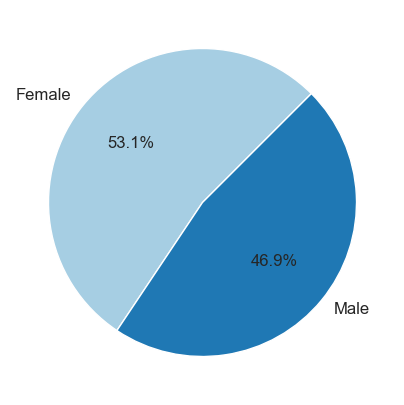

In [242]:
plt.figure(figsize=(5,5))

gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=45, colors=plt.cm.Paired.colors,textprops={'fontsize': 12})

plt.show()

## ➡️`"Ad Topic Line"`

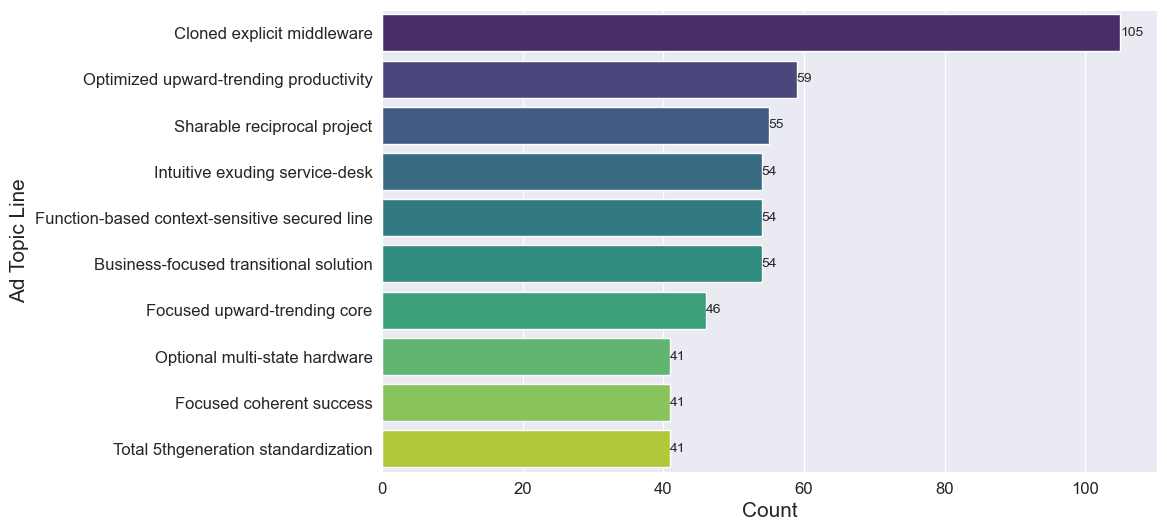

In [243]:
cat_hbar(df,'Ad Topic Line')

## ➡️`"Country"`

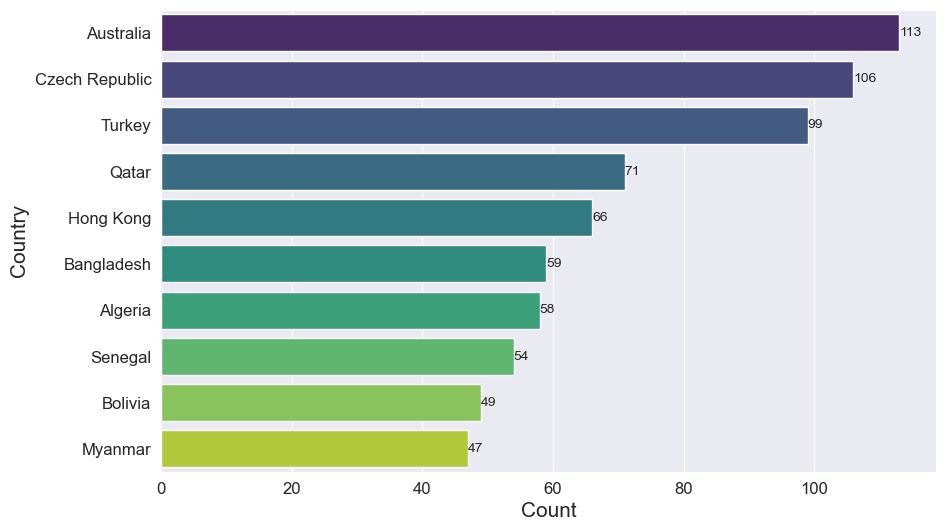

In [245]:
cat_hbar(df,'Country')

## ➡️`"City"`

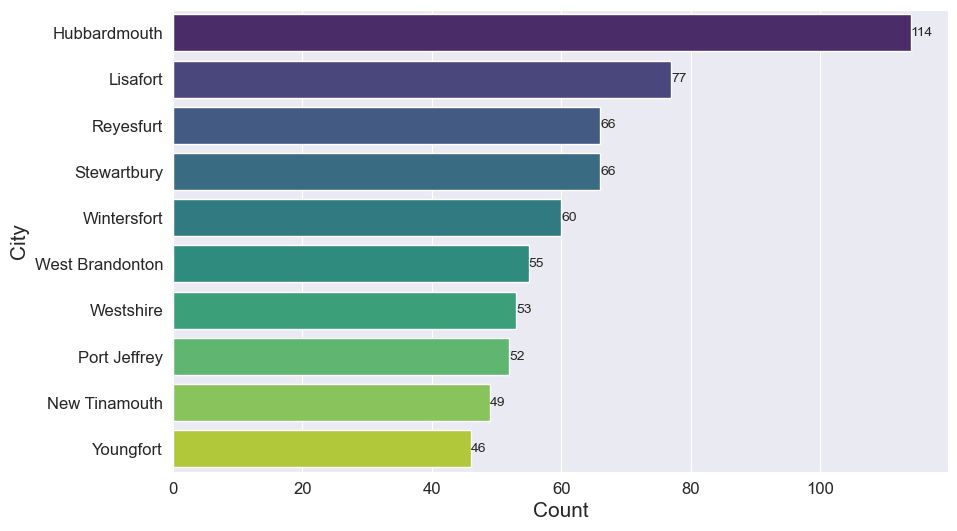

In [246]:
cat_hbar(df,'City')

## 🔴 Handling Missing Values

In [247]:
df.isnull().sum()

Daily Time Spent on Site     0
Age                         40
Area Income                 31
Daily Internet Usage         0
Ad Topic Line                0
City                        33
Gender                      23
Country                     28
Timestamp                    0
Clicked on Ad                0
Year                         0
Month                        0
Day                          0
Hour                         0
Minute                       0
Timestamp_Combined           0
dtype: int64

## ➡️`"Country"`

### We will use the 'City' column to fill the missing values in the 'Country' column, and subsequently map the countries to their respective continents.

In [248]:
df['Country'].value_counts()

Country
Australia                                       113
Czech Republic                                  106
Turkey                                           99
Qatar                                            71
Hong Kong                                        66
Bangladesh                                       59
Algeria                                          58
Senegal                                          54
Bolivia                                          49
Myanmar                                          47
Luxembourg                                       47
Micronesia                                       46
Northern Mariana Islands                         46
Burundi                                          45
Gabon                                            45
Croatia                                          44
Singapore                                        44
Vanuatu                                          41
Uganda                                           41
West

In [249]:
df.Country.isnull().sum()

28

In [250]:
df[df['Country'].isnull()]

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
74                       50.63 31.00     61067.58                236.87   
154                      51.24 36.00     76003.47                140.46   
457                      47.74 40.00     73910.90                120.37   
464                      82.07 48.00     57868.44                123.13   
465                      78.36 22.00     51257.26                220.05   
608                      73.72 35.00     53898.89                221.18   
921                      82.07 22.00          NaN                176.98   
952                      55.60 35.00     25603.93                236.87   
1007                     37.51 49.00          NaN                217.37   
1043                     44.46 33.00     61005.87                133.20   
1044                     74.54 23.00     55121.65                146.80   
1057                     51.24 39.00     66412.04                255.61   
1065                     71.33 39.00     53336.76                202.18   
1109                     48.03 45.00     31092.93                150.80   
1139                     65.65 40.00     69718.19                167.22   
1702                     61.22 45.00     51739.63                148.93   
1748                     40.04 28.00     55121.65                172.81   
1887                     80.47 38.00     57868.44                130.83   
2010                     54.88 50.00     52563.22                122.31   
2036                     78.64 31.00     61840.26                240.64   
2186                     51.24 39.00     38067.08                124.44   
2212                     34.86 36.00     50628.31                109.07   
2238                     51.24 36.00     32549.95                141.52   
2352                     89.34 32.00     38609.20                172.83   
2538                     86.63 34.00     59785.94                160.03   
2599                     65.77 41.00     57846.68                137.24   
2776                     40.17 45.00     31092.93                174.88   
2887                     85.84 25.00     63430.33                105.86   

                              Ad Topic Line               City  Gender  \
74            Optional multi-state hardware         Austinland    Male   
154         Up-sized incremental encryption        North Randy  Female   
457   Extended context-sensitive monitoring       South Walter    Male   
464             Proactive local focus group  Port Michaelmouth  Female   
465              Focused systemic benchmark      South Rebecca  Female   
608               Total cohesive moratorium        Port Cassie    Male   
921         Profit-focused secondary portal   Port Katelynview  Female   
952           Optional multi-state hardware        Wrightburgh  Female   
1007            Sharable reciprocal project                NaN    Male   
1043     Synchronized multi-tasking ability         New Thomas    Male   
1044                 Automated mobile model       Hubbardmouth  Female   
1057         Intuitive exuding service-desk         Garciatown  Female   
1065        Digitized content-based circuit         Garciatown  Female   
1109        Reactive demand-driven strategy          Jacobstad  Female   
1139               Front-line dynamic model          Reyesfurt  Female   
1702                  Secured 24hour policy        Wintersfort  Female   
1748           Team-oriented executive core       Hubbardmouth  Female   
1887       Exclusive even-keeled moratorium        Stewartbury    Male   
2010  Devolved zero administration intranet      Lake Jennifer  Female   
2036            Sharable reciprocal project    Port Calvintown    Male   
2186         Intuitive exuding service-desk          Hannaport  Female   
2212   Team-oriented zero-defect initiative       Williammouth    Male   
2238      Synergized grid-enabled framework          Youngfort    Male   
2352           Focused upward-trending core           

In [251]:
df.loc[df['Country'].isnull(),'City']

74             Austinland
154           North Randy
457          South Walter
464     Port Michaelmouth
465         South Rebecca
608           Port Cassie
921      Port Katelynview
952           Wrightburgh
1007                  NaN
1043           New Thomas
1044         Hubbardmouth
1057           Garciatown
1065           Garciatown
1109            Jacobstad
1139            Reyesfurt
1702          Wintersfort
1748         Hubbardmouth
1887          Stewartbury
2010        Lake Jennifer
2036      Port Calvintown
2186            Hannaport
2212         Williammouth
2238            Youngfort
2352             Lisafort
2538        New Tinamouth
2599          Stewartbury
2776          Wintersfort
2887           Lake David
Name: City, dtype: object

In [252]:
# City-to-country mapping

city_to_country = {
    "Austinland": "USA",
    "North Randy": "USA",
    "South Walter": "Canada",
    "Port Michaelmouth": "Canada",
    "South Rebecca": "USA",
    "Port Cassie": "USA",
    "Port Katelynview": "Canada",
    "Wrightburgh": "Canada",
    "New Thomas": "USA",
    "Hubbardmouth": "USA",
    "Garciatown": "USA",
    "Jacobstad": "USA",
    "Reyesfurt": "Canada",
    "Wintersfort": "Canada",
    "Stewartbury": "USA",
    "Lake Jennifer": "Canada",
    "Port Calvintown": "USA",
    "Hannaport": "USA",
    "Williammouth": "USA",
    "Youngfort": "USA",
    "Lisafort": "USA",
    "New Tinamouth": "USA",
    "Lake David": "USA",
}

df['Country'] = df['Country'].fillna(df['City'].map(city_to_country))

In [253]:
df['Country'].isnull().sum()

1

In [254]:
df['Country'].fillna(df['Country'].mode()[0], inplace=True)

In [255]:
df['Country'].isnull().sum()

0

In [256]:
# Dictionary mapping countries to continents

country_to_continent = {
    "Africa": [
        "Algeria", "Senegal", "Burundi", "Gabon", "Uganda", "Namibia", "Cameroon", "Ethiopia",
        "Ghana", "Zimbabwe", "Equatorial Guinea", "Eritrea", "Madagascar", "Liberia", "Somalia",
        "South Africa", "Chad", "Zambia", "Burkina Faso", "Kenya", "Tanzania", "Rwanda", "Congo",
        "Malawi", "Mauritius", "Mozambique", "Mali", "Sao Tome and Principe", "Togo", "Central African Republic",
        "Sierra Leone", "Mauritania", "Tunisia", "Cote d'Ivoire", "Western Sahara", "Mayotte", "Angola",
        "Egypt", "Saint Helena", "Libyan Arab Jamahiriya", "Gambia", "Guinea", "Niger"],
    
    "Asia": [
        "Turkey", "Qatar", "Bangladesh", "Myanmar", "Singapore", "Lao People's Democratic Republic",
        "Brunei Darussalam", "Kazakhstan", "Saudi Arabia", "China", "Taiwan", "Sri Lanka", "Hong Kong",
        "United Arab Emirates", "Kuwait", "Israel", "Iran", "Cambodia", "Kyrgyz Republic", "Tajikistan",
        "Japan", "Mongolia", "Yemen", "Nepal", "Palestinian Territory", "Bhutan", "Malaysia", "Afghanistan",
        "Timor-Leste", "Lebanon", "Georgia", "Bahrain", "Korea", "Maldives", "Thailand", "Azerbaijan",
        "Turkmenistan", "Indonesia"],
    
    "Europe": [
        "Czech Republic", "Luxembourg", "Croatia", "Bosnia and Herzegovina", "Albania", "Belgium",
        "Ukraine", "Switzerland", "Moldova", "Liechtenstein", "Hungary", "Austria", "Bulgaria", "Serbia",
        "Norway", "Ireland", "Estonia", "Poland", "Latvia", "Malta", "Slovenia", "France", "Italy",
        "Cyprus", "Greece", "Portugal", "Spain", "Sweden", "Andorra", "Iceland", "San Marino", "Belarus",
        "Macedonia", "Finland", "Denmark", "Netherlands", "Guernsey", "Gibraltar", "Montenegro", "Jersey",
        "Isle of Man", "Faroe Islands", "Svalbard & Jan Mayen Islands", "United Kingdom"],
    
    "North America": [
        "United States of America", "USA", "United States Virgin Islands", "Mexico", "Belize", "Honduras",
        "El Salvador", "Cuba", "Bahamas", "Dominica", "Saint Vincent and the Grenadines", "Saint Lucia",
        "Grenada", "Antigua and Barbuda", "Barbados", "Guatemala", "Canada", "Panama", "Nicaragua",
        "Netherlands Antilles", "Puerto Rico", "Cayman Islands", "Turks and Caicos Islands", "Dominican Republic",
        "Greenland", "Martinique", "Saint Pierre and Miquelon", "Anguilla", "Costa Rica"],
    
    "South America": [
        "Bolivia", "Venezuela", "Chile", "Brazil", "Uruguay", "Argentina", "Peru", "Suriname",
        "French Guiana", "Colombia"],
    
    "Oceania": [
        "Australia", "Micronesia", "Northern Mariana Islands", "Vanuatu", "American Samoa",
        "Fiji", "Tonga", "Tokelau", "French Polynesia", "Tuvalu", "Papua New Guinea", "Cook Islands",
        "New Zealand", "Palau", "New Caledonia", "Christmas Island", "Norfolk Island", "Guam", "Samoa"],
    
    "Antarctica": [
        "French Southern Territories", "Heard Island and McDonald Islands", "Bouvet Island (Bouvetoya)",
        "South Georgia and the South Sandwich Islands", "Falkland Islands (Malvinas)"]
}


# Flatten dictionary for reverse lookup
flat_country_continent = {country: continent for continent, countries in country_to_continent.items() for country in countries}

df["Continent"] = df["Country"].map(flat_country_continent)


In [257]:
df.Continent.value_counts(dropna=False)

Continent
Asia             739
Europe           720
Africa           665
Oceania          359
North America    321
South America    132
Antarctica        33
Name: count, dtype: int64

In [258]:
df.Continent.isnull().sum()

0

### Since a new column, `'Continent'`, has been created to group data based on the `'Country'` column, both the `'City' and 'Country'` columns will be dropped later.

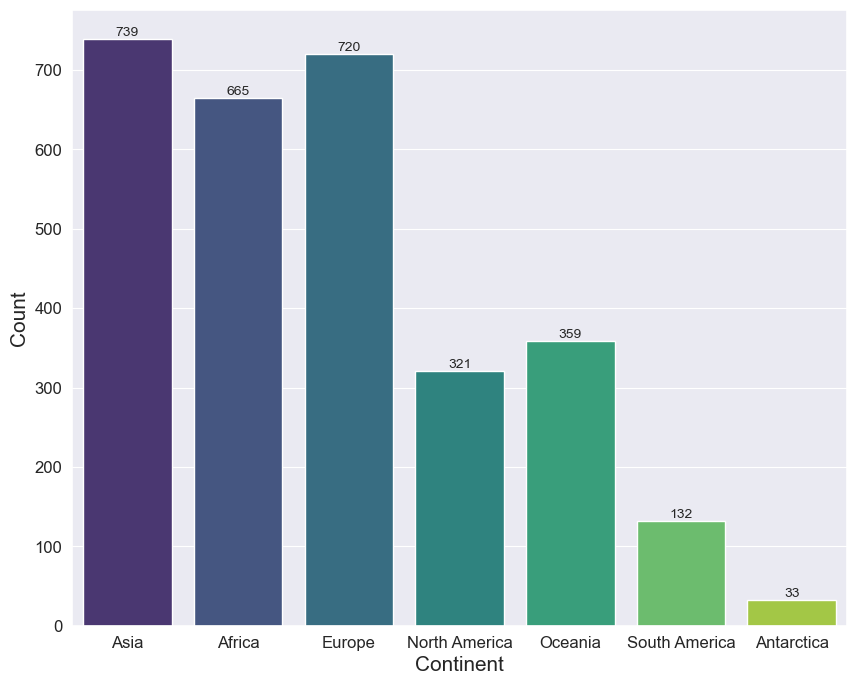

In [259]:
cat_vbar(df,'Continent')

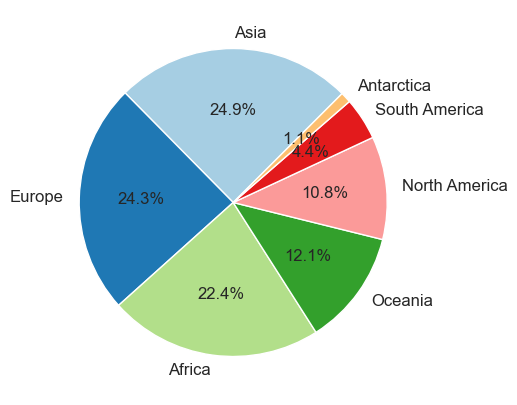

In [260]:
plt.figure(figsize=(5,5))

continent_counts = df['Continent'].value_counts()
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=45, colors=plt.cm.Paired.colors,textprops={'fontsize': 12})

plt.show()

## ➡️`"Area Income"`

In [261]:
df['Area Income'].isnull().sum()

31

In [262]:
df[df['Area Income'].isnull()]

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                        49.21 30.00          NaN                201.58   
13                       57.24 33.00          NaN                120.75   
82                       51.24 36.00          NaN                128.62   
155                      55.60 35.00          NaN                236.87   
239                      78.70 33.00          NaN                196.77   
253                      38.37 35.00          NaN                236.87   
259                      55.60 24.00          NaN                209.64   
690                      65.56 46.00          NaN                229.12   
835                      71.84 39.00          NaN                230.52   
921                      82.07 22.00          NaN                176.98   
988                      59.05 50.00          NaN                123.13   
1007                     37.51 49.00          NaN                217.37   
1009                     55.60 54.00          NaN                240.63   
1050                     82.07 55.00          NaN                187.76   
1182                     33.33 45.00          NaN                235.99   
1226                     89.05 38.00          NaN                230.93   
1359                     79.54 41.00          NaN                126.39   
1404                     79.52 44.00          NaN                157.04   
1654                     50.08 52.00          NaN                186.37   
1843                     55.60 24.00          NaN                172.83   
1849                     63.45 38.00          NaN                130.83   
1916                     41.73 34.00          NaN                168.34   
2012                     46.61 41.00          NaN                255.57   
2365                     75.84 38.00          NaN                230.93   
2383                     55.60 24.00          NaN                178.92   
2504                     44.40 32.00          NaN                182.20   
2570                     75.19 38.00          NaN                224.23   
2748                     79.52 49.00          NaN                187.76   
2775                     60.23 44.00          NaN                125.22   
2780                     59.05 50.00          NaN                123.13   
2781                     79.52 41.00          NaN                126.39   

                                          Ad Topic Line              City  \
0                   Total 5thgeneration standardization      West Richard   
13                         Compatible composite project   New Taylorburgh   
82                   Automated object-oriented firmware     Hatfieldshire   
155                       Optional multi-state hardware      West Roytown   
239           Multi-tiered foreground Graphic Interface          Silvaton   
253        Future-proofed fresh-thinking conglomeration    North Johnside   
259                  Upgradable heuristic system engine      North Daniel   
690                    Configurable tertiary capability   Richardsonshire   
835             Configurable mission-critical algorithm         Westshire   
921                     Profit-focused secondary portal  Port Katelynview   
988                    Realigned content-based leverage       Stewartbury   
1007                        Sharable reciprocal project               NaN   
1009        Profit-focused attitude-oriented task-force        East Shawn   
1050                Advanced modular Local Area Network      Hubbardmouth   
1182                     Enhanced homogeneous moderator       Wintersfort   
1226  Vision-oriented attitude-oriented Internet sol...      Michelleside   
1359                    Synergistic reciprocal attitude      Michaelmouth   
1404             Fully-configurable neutral open system         Hobbsbury   
1654                    Customizable tangible hierarchy         Shawnside   
1843                    Devolved human-resource circuit          

In [263]:
df.groupby('Country').agg({'Area Income':'median'})

Area Income
Country                                                  
Afghanistan                                      53338.10
Albania                                          51463.17
Algeria                                          52252.91
American Samoa                                   56180.93
Andorra                                          50906.77
Angola                                           54774.77
Anguilla                                         63363.04
Antigua and Barbuda                              62669.59
Argentina                                        69646.35
Australia                                        48335.20
Austria                                          50586.47
Azerbaijan                                       66348.95
Bahamas                                          57868.44
Bahrain                                          40357.36
Bangladesh                                       54462.24
Barbados                                         58956.43
Belarus                                          40468.53
Belgium                                          53672.51
Belize                                           42993.48
Bhutan                                           34191.23
Bolivia                                          57877.15
Bosnia and Herzegovina                           59886.58
Bouvet Island (Bouvetoya)                        53426.26
Brazil                                           59610.81
Brunei Darussalam                                59785.94
Bulgaria                                         56770.79
Burkina Faso                                     54251.78
Burundi                                          69646.35
Cambodia                                         52325.93
Cameroon                                         56113.37
Canada                                           55215.83
Cayman Islands                                   51296.26
Central African Republic                         48199.09
Chad                                             59243.46
Chile                                            55424.24
China                                            55121.65
Christmas Island                                 57375.08
Congo                                            61317.32
Cook Islands                                     40468.53
Costa Rica                                       57868.44
Cote d'Ivoire                                    59621.73
Croatia                                          58390.58
Cuba                                             49101.67
Cyprus                                           57088.62
Czech Republic                                   58151.87
Denmark                                          57074.04
Dominica                                         47566.35
Dominican Republic                               39193.45
Egypt                                            66269.49
El Salvador                                      57846.68
Equatorial Guinea                                34191.23
Eritrea                                          61172.04
Estonia                                          38817.40
Ethiopia                                         50335.46
Falkland Islands (Malvinas)                      61303.25
Faroe Islands                                    57395.53
Fiji                                             55424.24
Finland                                          63327.76
France                                           42569.83
French Guiana                                    52524.15
French Polynesia                                 55688.27
French Southern Territories                      53058.91
Gabon                                            61172.07
Gambia                                           53431.35
Georgia                                          50671.60
Ghana                                            62669.59
Gibraltar                                        57877.15
Greece                                      

In [264]:
df['Area Income'] = df['Area Income'].fillna(df.groupby('Country')['Area Income'].transform('median'))

In [265]:
df['Area Income'].isnull().sum()

0

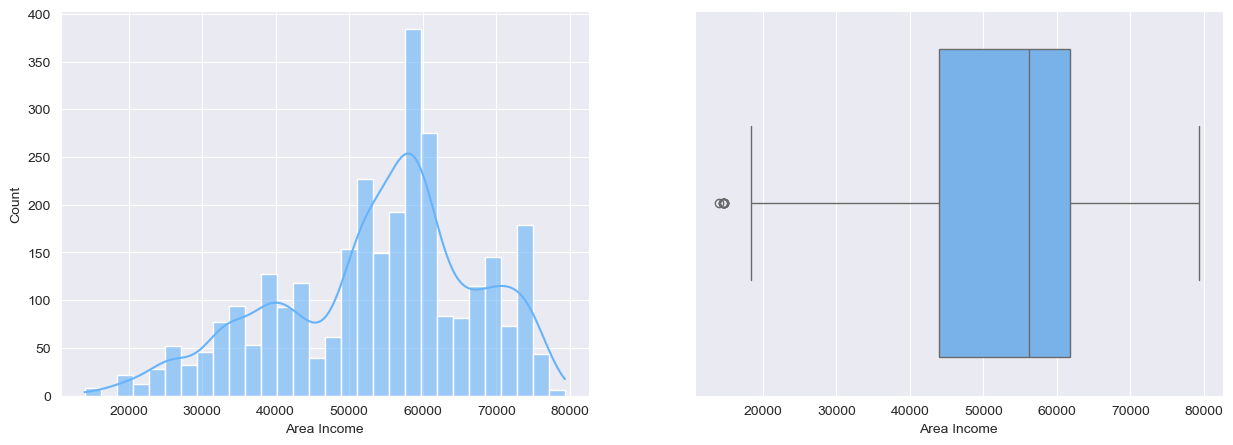

In [266]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.histplot(df['Area Income'], ax=ax[0], bins=30, kde=True, color='#67B3FA', edgecolor='white', alpha=0.6)
sns.boxplot(x=df['Area Income'], ax=ax[1], color='#67B3FA')

sns.set_style("darkgrid")  
plt.show()

## ➡️`"Gender"`

In [267]:
df['Gender'].isnull().sum()

23

In [268]:
df[df['Gender'].isnull()]

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
207                      80.51 38.00     71455.62                122.04   
225                      59.51 30.00     58677.69                219.94   
232                      55.60 35.00     73889.99                236.87   
338                      51.56 52.00     73049.30                234.75   
351                      83.71 26.00     50628.31                126.39   
431                      74.54 23.00     60514.05                158.35   
557                      71.28 41.00     65791.17                126.39   
656                      60.53 22.00     63363.04                121.07   
910                      69.88 34.00     34191.23                160.03   
1084                     68.88 38.00     71455.62                156.36   
1181                     83.71 38.00     57868.44                206.98   
1482                     65.59 35.00     42993.48                161.16   
1562                     44.40 30.00     57877.15                201.58   
1568                     59.51 40.00     27086.40                117.30   
1601                     55.60 54.00     38609.20                177.55   
1868                     37.00 30.00     58677.69                167.22   
1901                     65.77 23.00     25739.09                172.81   
1993                     39.96 25.00     50506.44                140.46   
2392                     59.51 40.00     40468.53                167.22   
2557                     66.12   NaN     53058.91                217.37   
2741                     75.84 25.00     50506.44                202.18   
2799                     41.73 28.00     53058.91                217.37   
2932                     55.60 20.00     55942.04                178.92   

                                          Ad Topic Line                City  \
207                  Synergized clear-thinking protocol     East Rachelview   
225                     Synchronized systemic hierarchy           Reyesfurt   
232                       Optional multi-state hardware         Wrightburgh   
338                    Streamlined homogeneous analyzer     West Brandonton   
351                 Upgradable multi-tasking initiative      East Kevinbury   
431                         Enhanced optimizing website        Hubbardmouth   
557             Focused 3rdgeneration pricing structure         Edwardsport   
656              Customizable modular Internet solution          Garciatown   
910                          Cloned explicit middleware       New Tinamouth   
1084              Networked regional Local Area Network  South Daniellefort   
1181                    Pre-emptive content-based frame         Stewartbury   
1482                      Operative full-range forecast         Lake Edward   
1562                    Synchronized systemic hierarchy         Kristinfurt   
1568            Visionary maximized process improvement     West Angelabury   
1601                              Configurable 24/7 hub        Blairborough   
1868                Total 5thgeneration standardization           Reyesfurt   
1901                       Team-oriented executive core        Hubbardmouth   
1993       Focused web-enabled Graphical User Interface      West Gregburgh   
2392  Vision-oriented attitude-oriented Internet sol...        Williamsport   
2557                Centralized logistical secured line          Lake James   
2741                  Face-to-face analyzing encryption      West Aprilport   
2799                Down-sized bandwidth-monitored core           Port Beth   
2932             Business-focused transitional solution        South Walter   

     Gender                           Country           Timestamp  \
207     NaN  Lao People's Democratic Republic 2016-04-21 09:30:35   
225     NaN                             Qatar 2016-03-09 06:22:03   
232     NaN                             Niger 2016-07-02 20:23:15   
338     NaN                     

In [269]:
df['Gender'].describe()

count       2946
unique         2
top       Female
freq        1565
Name: Gender, dtype: object

In [270]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [271]:
df['Gender'].isnull().sum()

0

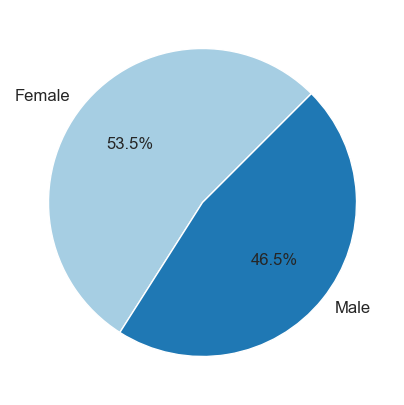

In [272]:
plt.figure(figsize=(5,5))

gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=45, colors=plt.cm.Paired.colors,textprops={'fontsize': 12})

plt.show()

## ➡️`"Age"`

In [273]:
df['Age'].isnull().sum()

40

In [274]:
df[df['Age'].isnull()]

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
51                       54.97  NaN     55984.89                204.27   
161                      71.03  NaN     71222.40                217.37   
233                      34.30  NaN     59243.46                143.13   
254                      78.17  NaN     57846.68                115.60   
271                      35.61  NaN     56113.37                208.05   
273                      44.57  NaN     48335.20                141.52   
309                      59.59  NaN     63363.04                208.24   
350                      55.60  NaN     38609.20                182.20   
588                      41.73  NaN     71222.40                207.17   
744                      65.59  NaN     63649.04                161.16   
829                      80.91  NaN     66815.54                222.11   
936                      73.38  NaN     61172.07                196.61   
938                      55.60  NaN     73889.99                219.91   
990                      71.03  NaN     53058.91                258.62   
1015                     88.12  NaN     64564.07                227.63   
1068                     59.51  NaN     69646.35                200.71   
1117                     55.60  NaN     52252.91                182.20   
1173                     60.23  NaN     73538.09                167.86   
1184                     56.39  NaN     69646.35                200.71   
1215                     81.75  NaN     69646.35                163.00   
1287                     51.24  NaN     70592.81                140.46   
1427                     66.79  NaN     69718.19                163.00   
1437                     80.47  NaN     70582.55                206.98   
1476                     59.05  NaN     33951.63                229.12   
1862                     56.34  NaN     72203.96                244.91   
1977                     61.22  NaN     52252.91                182.20   
2180                     79.54  NaN     64564.07                137.24   
2187                     79.54  NaN     48335.20                122.31   
2282                     82.07  NaN     67058.72                121.28   
2293                     63.36  NaN     32635.70                121.28   
2313                     35.61  NaN     58337.18                236.87   
2361                     55.60  NaN     37334.78                210.60   
2491                     46.61  NaN     74180.05                137.24   
2557                     66.12  NaN     53058.91                217.37   
2585                     50.19  NaN     32549.95                203.90   
2625                     34.30  NaN     34191.23                160.03   
2653                     46.14  NaN     39193.45                227.63   
2681                     80.30  NaN     45632.51                168.34   
2693                     78.36  NaN     59785.94                160.03   
2810                     71.84  NaN     56180.93                124.44   

                                       Ad Topic Line              City  \
51                      Compatible composite project         Novaktown   
161              Centralized logistical secured line         Jamiefort   
233                Digitized disintermediate ability      Hubbardmouth   
254                    Distributed maximized ability      Michaelmouth   
271              Advanced modular Local Area Network       Wrightburgh   
273        Decentralized attitude-oriented interface         Youngfort   
309                  Profit-focused secondary portal  North Angelatown   
350                     Focused upward-trending core       East Carlos   
588              Down-sized bandwidth-monitored core         Reyesfurt   
744                 Cloned object-oriented benchmark        New Brandy   
829                         Front-line dynamic model      Kimberlytown   
936                  Profit-focused secondary portal         Evansfurt   
938      

In [275]:
df['Age'] = df['Age'].fillna(df.groupby('Gender')['Age'].transform('median'))

In [276]:
df['Age'].isnull().sum()

0

In [277]:
df['Age'].describe()

count   2969.00
mean      35.69
std        8.59
min       19.00
25%       29.00
50%       35.00
75%       41.00
max       60.00
Name: Age, dtype: float64

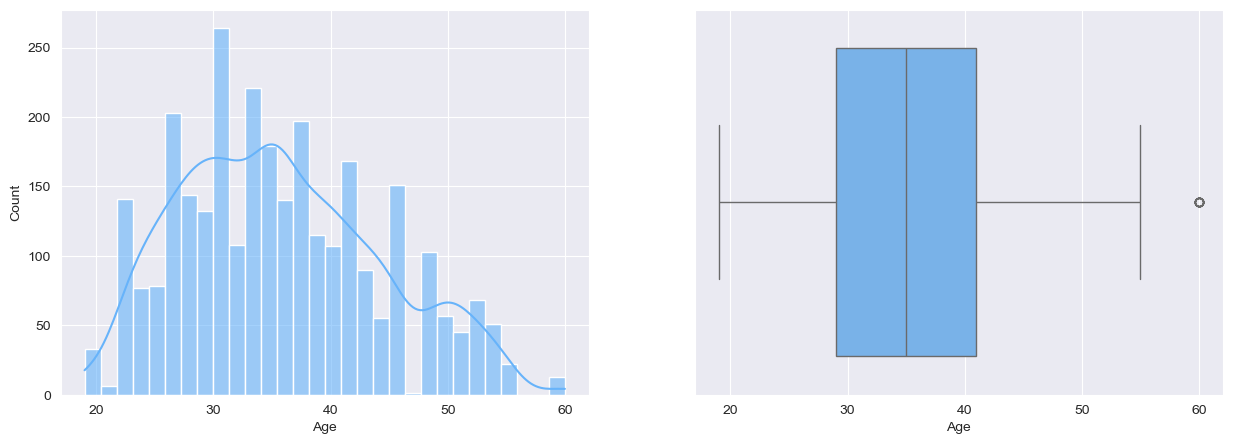

In [278]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.histplot(df['Age'], ax=ax[0], bins=30, kde=True, color='#67B3FA', edgecolor='white', alpha=0.6)
sns.boxplot(x=df['Age'], ax=ax[1], color='#67B3FA')

sns.set_style("darkgrid")  
plt.show()


## `'Ad Topic Line'`

In [1065]:
topic = df['Ad Topic Line']
topic = pd.DataFrame(topic)
topic

Ad Topic Line
0                 Digitized content-based circuit
1                      Intuitive radical forecast
2        Reverse-engineered maximized focus group
3         Multi-layered fresh-thinking neural-net
4           Vision-oriented optimizing middleware
...                                           ...
2995  Monitored object-oriented Graphic Interface
2996          Total 5thgeneration standardization
2997               Enhanced homogeneous moderator
2998                Upgradable optimizing toolset
2999              Reactive demand-driven capacity

[2975 rows x 1 columns]

In [1064]:
topic.shape, df.shape

((2975,), (2975, 18))

In [1076]:
def preprocess_txt(text):
    text = text.lower()
    text = re.sub('[^a-z0-9]',' ',text)
    tokens = word_tokenize(text)

    def lemmatize_all(tokens):
        wnl = WordNetLemmatizer()
        for word, tag in pos_tag(tokens):
            if tag.startswith("NN"):
                yield wnl.lemmatize(word, pos='n')
            elif tag.startswith('VB'):
                yield wnl.lemmatize(word, pos='v')
            elif tag.startswith('JJ'):
                yield wnl.lemmatize(word, pos='a')
            else:
                yield word

    stop_words = stopwords.words('english')
    stemmer = PorterStemmer()
    
    filtered_stop_words = [ i for i in stop_words if re.search(r"not|nor|no|n't|dn|tn|sn",i)==None]
    filtered_tokens = [token for token in tokens if token not in filtered_stop_words]
    lemma_tokens = lemmatize_all(filtered_tokens)
    stem_tokens = [stemmer.stem(token) for token in lemma_tokens]
      
    clean_txt = ' '.join(stem_tokens)

    return clean_txt
 

In [1077]:
topic['Ad Topic Line'] = topic['Ad Topic Line'].apply(preprocess_txt)
topic

Ad Topic Line
0                 digit content base circuit
1                      intuit radic forecast
2              revers engin maxim focu group
3         multi layer fresh think neural net
4              vision orient optim middlewar
...                                      ...
2995  monitor object orient graphic interfac
2996                 total 5thgener standard
2997                    enhanc homogen moder
2998                    upgrad optim toolset
2999              reactiv demand drive capac

[2975 rows x 1 columns]

In [1080]:
tfidf = TfidfVectorizer()
topic_tv = tfidf.fit_transform(topic['Ad Topic Line'])

In [1087]:
len(tfidf.vocabulary_)

313

In [1089]:
tfidf.vocabulary_

{'digit': 79,
 'content': 60,
 'base': 33,
 'circuit': 47,
 'intuit': 161,
 'radic': 233,
 'forecast': 114,
 'revers': 243,
 'engin': 95,
 'maxim': 179,
 'focu': 111,
 'group': 131,
 'multi': 193,
 'layer': 168,
 'fresh': 118,
 'think': 283,
 'neural': 199,
 'net': 197,
 'vision': 302,
 'orient': 210,
 'optim': 206,
 'middlewar': 182,
 'size': 257,
 '6thgener': 5,
 'moratorium': 191,
 'clone': 50,
 'explicit': 103,
 'innov': 150,
 'interact': 156,
 'portal': 218,
 'sharabl': 256,
 'reciproc': 238,
 'project': 228,
 'invers': 162,
 'local': 173,
 'hub': 141,
 'focus': 112,
 'system': 277,
 'benchmark': 34,
 'network': 198,
 'even': 99,
 'keel': 163,
 'workforc': 310,
 'busi': 40,
 'transit': 290,
 'solut': 259,
 'autom': 29,
 'state': 264,
 'toolset': 288,
 'function': 123,
 'increment': 147,
 'standard': 263,
 'realign': 237,
 'intang': 153,
 'synchron': 273,
 'task': 280,
 'abil': 6,
 'visionari': 303,
 'asymmetr': 26,
 'encrypt': 94,
 'tripl': 292,
 'buffer': 39,
 'demand': 76,
 'dri

In [1082]:
topic_tv

<2975x313 sparse matrix of type '<class 'numpy.float64'>'
	with 11397 stored elements in Compressed Sparse Row format>

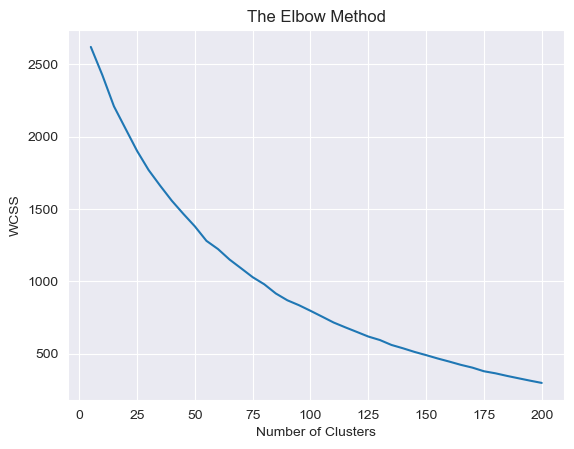

In [1095]:
wcss = []
for i in range(5,201,5):
    kmeans = KMeans(n_clusters = i, init='k-means++', n_init=10, random_state=1)
    kmeans.fit(topic_tv)
    wcss.append(kmeans.inertia_)

plt.plot(range(5,201,5), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.grid(True)
plt.show()

In [1092]:
cv = CountVectorizer()
topic_cv = cv.fit_transform(topic['Ad Topic Line'])

In [1093]:
topic_cv

<2975x313 sparse matrix of type '<class 'numpy.int64'>'
	with 11397 stored elements in Compressed Sparse Row format>

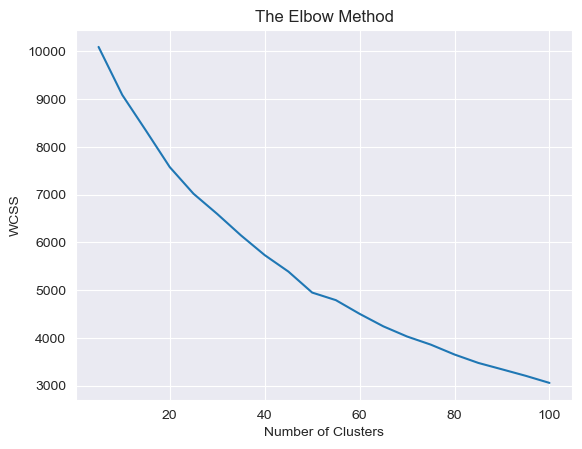

In [1094]:
wcss = []
for i in range(5,101,5):
    kmeans = KMeans(n_clusters = i, init='k-means++', n_init=10, random_state=1)
    kmeans.fit(topic_cv)
    wcss.append(kmeans.inertia_)

plt.plot(range(5,101,5), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.grid(True)
plt.show()

### After applying text mining techniques and K-Means to extract useful information from this feature, no significant improvements were achieved, so I have decided to exclude it from the model.

# ⬛ BIVARIATE ANALYSIS ⬛

In [279]:
df = df.drop(columns=['City','Country'])

In [280]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
Gender                      0
Timestamp                   0
Clicked on Ad               0
Year                        0
Month                       0
Day                         0
Hour                        0
Minute                      0
Timestamp_Combined          0
Continent                   0
dtype: int64

In [281]:
df = df.reindex(columns=['Timestamp_Combined', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Timestamp', 'Ad Topic Line', \
                    'Continent', 'Age', 'Gender', 'Area Income', 'Daily Time Spent on Site', 'Daily Internet Usage', 'Clicked on Ad'])
df

Timestamp_Combined  Year  Month  Day  Hour  Minute           Timestamp  \
0        201607211054.00  2016      7   21    10      54 2016-07-21 10:54:35   
1        201601310512.00  2016      1   31     5      12 2016-01-31 05:12:44   
2        201603090041.00  2016      3    9     0      41 2016-03-09 00:41:46   
3        201606110647.00  2016      6   11     6      47 2016-06-11 06:47:55   
4        201605210136.00  2016      5   21     1      36 2016-05-21 01:36:16   
...                  ...   ...    ...  ...   ...     ...                 ...   
2995     201607010112.00  2016      7    1     1      12 2016-07-01 01:12:04   
2996     201604061124.00  2016      4    6    11      24 2016-04-06 11:24:21   
2997     201601030322.00  2016      1    3     3      22 2016-01-03 03:22:15   
2998     201605281220.00  2016      5   28    12      20 2016-05-28 12:20:15   
2999     201604040707.00  2016      4    4     7       7 2016-04-04 07:07:46   

                                   Ad Topic Line Continent   Age  Gender  \
0            Total 5thgeneration standardization      Asia 30.00  Female   
1     Function-based incremental standardization    Africa 51.00  Female   
2                Digitized content-based circuit    Africa 29.00  Female   
3        Configurable disintermediate throughput    Africa 24.00  Female   
4        Front-line bandwidth-monitored capacity    Europe 27.00  Female   
...                                          ...       ...   ...     ...   
2995          Multi-layered user-facing paradigm    Africa 36.00  Female   
2996               Innovative interactive portal    Europe 42.00  Female   
2997              Profound executive flexibility      Asia 31.00    Male   
2998              Managed zero tolerance concept    Europe 28.00    Male   
2999            Realigned content-based leverage    Africa 50.00  Female   

      Area Income  Daily Time Spent on Site  Daily Internet Usage  \
0        54723.19                     49.21                201.58   
1        74535.94                     51.65                188.56   
2        53431.35                     47.64                200.71   
3        52252.91                     55.60                167.22   
4        69646.35                     78.84                239.32   
...           ...                       ...                   ...   
2995     61610.05                     44.33                140.46   
2996     60514.05                     80.03                243.61   
2997     61840.26                     41.73                207.17   
2998     51501.38                     41.73                120.49   
2999     43974.49                     46.61                123.13   

      Clicked on Ad  
0                 1  
1                 0  
2                 0  
3                 1  
4                 0  
...             ...  
2995              1  
2996              1  
2997              1  
2998              0  
2999              1  

[2969 rows x 15 columns]

In [282]:
df['Clicked on Ad'].value_counts(dropna=False)

Clicked on Ad
0    1501
1    1468
Name: count, dtype: int64

## 🔴 Categorical vs Categorical -- *`Chi-Square Test (Cramer's V)`*

In [283]:
# chi_square function

def chi_square(df,c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))
    print(f'\n🟥{c1} vs {c2}')
    print("Actual values:\n")
    print(pd.crosstab(df[c1],df[c2],margins = True))
    print("-"*100)
    
    print("Expected values: \n")
    print(exp_val)
    print("-"*100)

    print(f'\nChi-square is : {chi_2}', f'\np_value is : {p_val}', f'\ndegree of freedom is :{dof}')
    print("-"*100)
    
    if exp_val.min()<5 or np.sum(exp_val)<30 : 
        print(f'Warning : We have some small expected values or the total number of observations is not enough to get any conclusion between "{c1}" and "{c2}".')
    elif p_val < 0.05:
        print(f'There is statistically significant association between "{c1}" and "{c2}" at 0.05 significant level.')
    else:
        print(f"""There is no association between the two variables. 
We don't have enough evidence to conclude there is a statistically significant association between "{c1}" and "{c2}".""")   

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2969 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Timestamp_Combined        2969 non-null   float64       
 1   Year                      2969 non-null   int32         
 2   Month                     2969 non-null   int32         
 3   Day                       2969 non-null   int32         
 4   Hour                      2969 non-null   int32         
 5   Minute                    2969 non-null   int32         
 6   Timestamp                 2969 non-null   datetime64[ns]
 7   Ad Topic Line             2969 non-null   object        
 8   Continent                 2969 non-null   object        
 9   Age                       2969 non-null   float64       
 10  Gender                    2969 non-null   object        
 11  Area Income               2969 non-null   float64       
 12  Daily Time Spent on Site 

## ➡️"Continent" vs "Clicked on Ad"
## ➡️"Gender" vs "Clicked on Ad"

In [285]:
col_cat = ['Continent', 'Gender']

In [302]:
def crosstab_plt(df, col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2], normalize='index')*100
    ax = crosstab.plot(kind='bar', stacked=True, color=['#ADD8E6', '#5F9EA0'], figsize=(10, 6))

    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=8, color='black')
    
    plt.xlabel(col1,fontsize=16)
    plt.ylabel('Percentage', fontsize=16)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(
            title="Clicked on Ad",
            loc='upper left',
            bbox_to_anchor=(1,1.01), 
            fontsize=10,
            title_fontsize=12)

sns.set_style("white") 
plt.show()

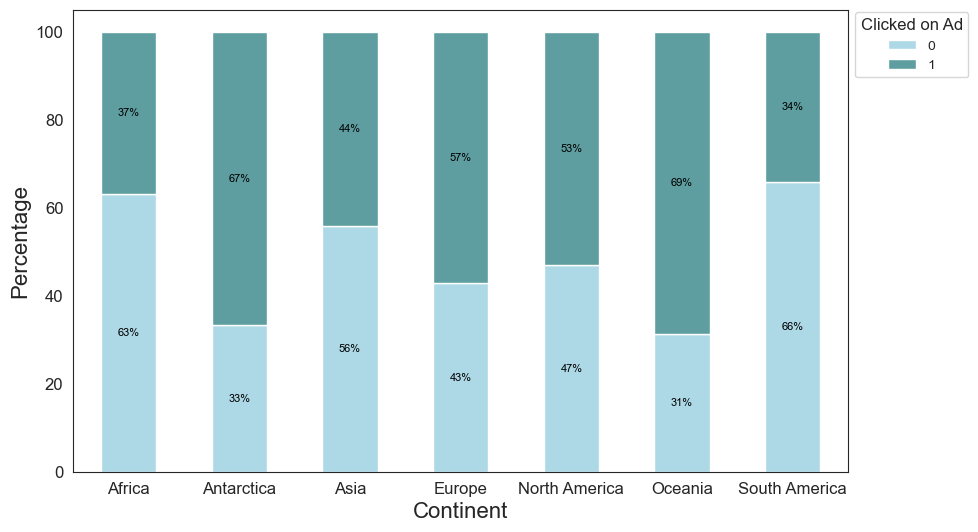

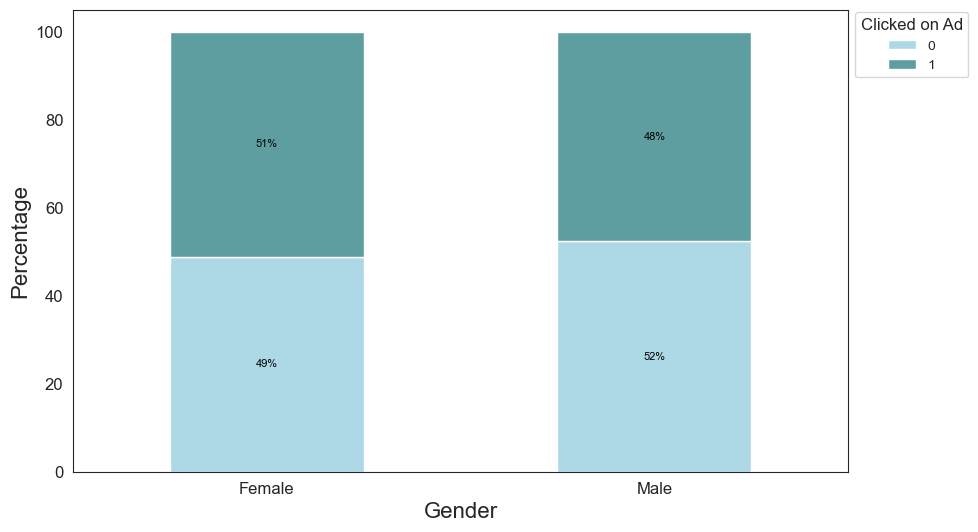

In [287]:
for col in df[col_cat]: 
    crosstab_plt(df, col, 'Clicked on Ad')

In [288]:
for col in col_cat:
    chi_square(df, col, 'Clicked on Ad')
    print("🔳"*55)


🟥Continent vs Clicked on Ad
Actual values:

Clicked on Ad     0     1   All
Continent                      
Africa          419   246   665
Antarctica       11    22    33
Asia            413   326   739
Europe          308   412   720
North America   151   170   321
Oceania         112   247   359
South America    87    45   132
All            1501  1468  2969
----------------------------------------------------------------------------------------------------
Expected values: 

[[336.19568878 328.80431122]
 [ 16.68339508  16.31660492]
 [373.60693836 365.39306164]
 [364.00134725 355.99865275]
 [162.28393398 158.71606602]
 [181.4951162  177.5048838 ]
 [ 66.73358033  65.26641967]]
----------------------------------------------------------------------------------------------------

Chi-square is : 138.84174915047763 
p_value is : 1.759371864808287e-27 
degree of freedom is :6
----------------------------------------------------------------------------------------------------
There is sta

### There is a statistically significant association between `"Continent" and "Clicked on Ad"` at the 5% significance level. However, there is insufficient evidence to suggest a statistically significant association between `"Gender" and "Clicked on Ad"`.

## Cramer's V btw Categorical Variables

In [291]:
col_allcat = ['Continent', 'Gender', 'Clicked on Ad']

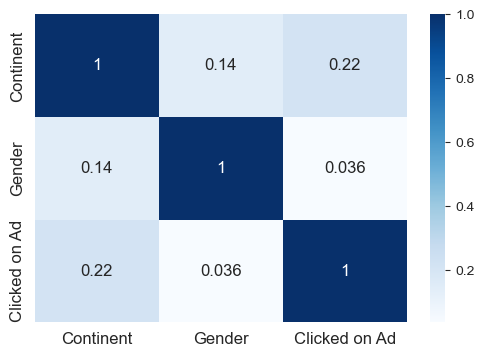

In [292]:
def cramers_v(var1,var2):
    crosstab = np.array(pd.crosstab(var1,var2,rownames=None,colnames=None))
    stat = chi2_contingency(crosstab,correction=False)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape)-1
    return np.sqrt(stat/(obs*mini))

rows = []
for var1 in df[col_allcat]:
    cols = []
    for var2 in df[col_allcat]:
        cramers = cramers_v(df[var1],df[var2])
        cols.append(round(cramers,4))
    rows.append(cols)

cramers_results = np.array(rows)
cramers_matrix = pd.DataFrame(cramers_results, columns=col_allcat, index=col_allcat)
cramers_matrix

plt.figure(figsize=(6,4))
sns.heatmap(cramers_matrix, cmap="Blues", annot=True, annot_kws={"size": 12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.show()

### The correlation between `"Continent" and "Gender" is 0.14`, indicating a weak association, suggesting that these variables are mostly independent.
### The correlation between `"Continent" and "Clicked on Ad" is 0.22`, showing a weak association, which implies that the user's continent might have a minor influence on ad clicks.
### The correlation between `"Gender" and "Clicked on Ad" is 0.036`, reflecting no meaningful association, indicating that gender has no noticeable effect on ad clicks.

## 🔴 Reorganize Numerical / Categorical Variables

## ➡️"Timestamp"

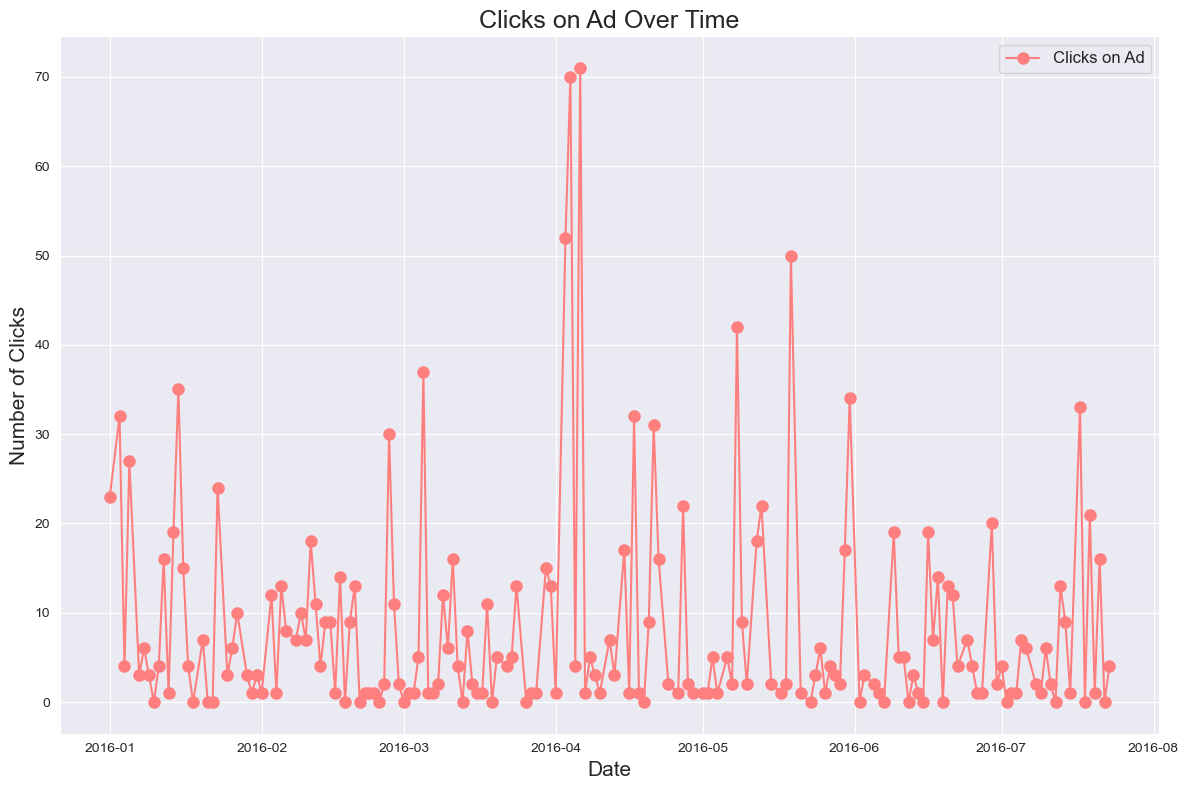

In [294]:
timetrend = df.groupby(df['Timestamp'].dt.date)['Clicked on Ad'].sum().reset_index()
timetrend.columns = ['Date', 'Clicks']

plt.figure(figsize=(12, 8))
plt.plot(timetrend['Date'], timetrend['Clicks'], marker='o', markersize=8, linestyle='-', color='#FF7F7F', label='Clicks on Ad')
plt.title('Clicks on Ad Over Time', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Clicks', fontsize=15)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()
sns.set_style("darkgrid")  
plt.show()

## ➡️"Hour" 

In [295]:
df.Hour.value_counts()

Hour
20    229
21    219
14    199
22    194
16    189
11    156
0     129
10    127
4     124
13    123
3     121
23    112
7     111
2      99
15     98
8      94
1      92
17     89
12     88
6      87
19     86
9      70
5      67
18     66
Name: count, dtype: int64

In [296]:
hour_trend = pd.DataFrame(df.groupby('Hour')['Clicked on Ad'].sum().reset_index())
hour_trend

Hour  Clicked on Ad
0      0             38
1      1             40
2      2             46
3      3             33
4      4             42
5      5             16
6      6             30
7      7             50
8      8             61
9      9             54
10    10             52
11    11             91
12    12             62
13    13             38
14    14            115
15    15             47
16    16            104
17    17             54
18    18             40
19    19             46
20    20            116
21    21            138
22    22             81
23    23             74

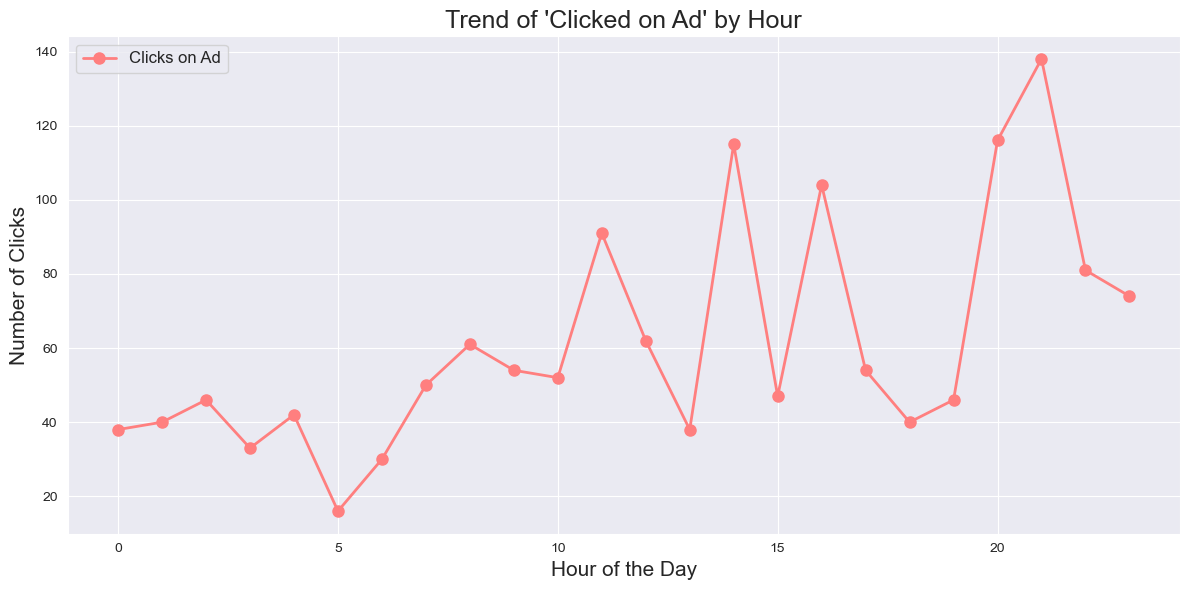

In [297]:
plt.figure(figsize=(12,6))

plt.plot(hour_trend['Hour'], hour_trend['Clicked on Ad'], marker='o', markersize=8, linestyle='-', linewidth=2, color='#FF7F7F', label='Clicks on Ad')

plt.title("Trend of 'Clicked on Ad' by Hour", fontsize=18)
plt.xlabel('Hour of the Day', fontsize=15)
plt.ylabel('Number of Clicks', fontsize=15)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(fontsize=12)
sns.set_style("darkgrid")  
plt.tight_layout()
plt.show()

### The hours will be segmented into four bins (Night, Morning, Afternoon, and Evening) to analyze the association between these time periods and the target variable, 'Clicked on Ad'.

- ### `Morning: 6AM - 11AM (6–11)`
- ### `Afternoon: 12PM - 5PM (12–17)`
- ### `Evening: 6PM - 11PM (18–23)`
- ### `Night: 12AM - 5AM (0–5)`

In [298]:
df['Hour_bins'] = pd.cut(df['Hour'], bins=[0,5,11,17,23], labels=['Night','Morning','Afternoon','Evening'], include_lowest=True)
df

Timestamp_Combined  Year  Month  Day  Hour  Minute           Timestamp  \
0        201607211054.00  2016      7   21    10      54 2016-07-21 10:54:35   
1        201601310512.00  2016      1   31     5      12 2016-01-31 05:12:44   
2        201603090041.00  2016      3    9     0      41 2016-03-09 00:41:46   
3        201606110647.00  2016      6   11     6      47 2016-06-11 06:47:55   
4        201605210136.00  2016      5   21     1      36 2016-05-21 01:36:16   
...                  ...   ...    ...  ...   ...     ...                 ...   
2995     201607010112.00  2016      7    1     1      12 2016-07-01 01:12:04   
2996     201604061124.00  2016      4    6    11      24 2016-04-06 11:24:21   
2997     201601030322.00  2016      1    3     3      22 2016-01-03 03:22:15   
2998     201605281220.00  2016      5   28    12      20 2016-05-28 12:20:15   
2999     201604040707.00  2016      4    4     7       7 2016-04-04 07:07:46   

                                   Ad Topic Line Continent   Age  Gender  \
0            Total 5thgeneration standardization      Asia 30.00  Female   
1     Function-based incremental standardization    Africa 51.00  Female   
2                Digitized content-based circuit    Africa 29.00  Female   
3        Configurable disintermediate throughput    Africa 24.00  Female   
4        Front-line bandwidth-monitored capacity    Europe 27.00  Female   
...                                          ...       ...   ...     ...   
2995          Multi-layered user-facing paradigm    Africa 36.00  Female   
2996               Innovative interactive portal    Europe 42.00  Female   
2997              Profound executive flexibility      Asia 31.00    Male   
2998              Managed zero tolerance concept    Europe 28.00    Male   
2999            Realigned content-based leverage    Africa 50.00  Female   

      Area Income  Daily Time Spent on Site  Daily Internet Usage  \
0        54723.19                     49.21                201.58   
1        74535.94                     51.65                188.56   
2        53431.35                     47.64                200.71   
3        52252.91                     55.60                167.22   
4        69646.35                     78.84                239.32   
...           ...                       ...                   ...   
2995     61610.05                     44.33                140.46   
2996     60514.05                     80.03                243.61   
2997     61840.26                     41.73                207.17   
2998     51501.38                     41.73                120.49   
2999     43974.49                     46.61                123.13   

      Clicked on Ad  Hour_bins  
0                 1    Morning  
1                 0      Night  
2                 0      Night  
3                 1    Morning  
4                 0      Night  
...             ...        ...  
2995              1      Night  
2996              1    Morning  
2997              1      Night  
2998              0  Afternoon  
2999              1    Morning  

[2969 rows x 16 columns]

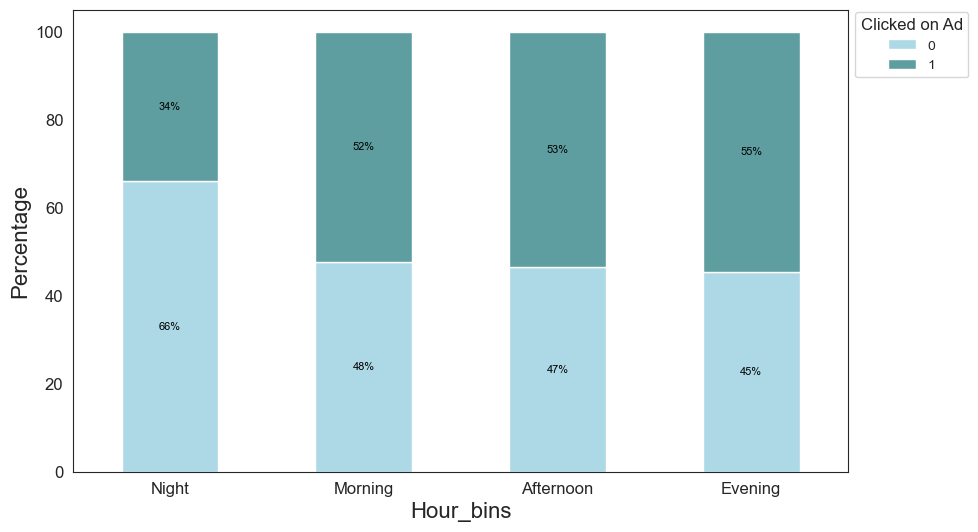

In [303]:
crosstab_plt(df, 'Hour_bins', 'Clicked on Ad')

In [304]:
chi_square(df, 'Hour_bins', 'Clicked on Ad')
print("🔳"*55)


🟥Hour_bins vs Clicked on Ad
Actual values:

Clicked on Ad     0     1   All
Hour_bins                      
Night           417   215   632
Morning         307   338   645
Afternoon       366   420   786
Evening         411   495   906
All            1501  1468  2969
----------------------------------------------------------------------------------------------------
Expected values: 

[[319.5122937  312.4877063 ]
 [326.08454025 318.91545975]
 [397.36813742 388.63186258]
 [458.03502863 447.96497137]]
----------------------------------------------------------------------------------------------------

Chi-square is : 77.19396312887872 
p_value is : 1.2268633155628195e-16 
degree of freedom is :3
----------------------------------------------------------------------------------------------------
There is statistically significant association between "Hour_bins" and "Clicked on Ad" at 0.05 significant level.
🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳🔳


### There is a statistically significant association between `"Hour_bins" and "Clicked on Ad"` at the 5% significance level.

## ➡️"Month" 

In [305]:
df.Month.value_counts()

Month
4    540
1    500
3    431
5    380
6    379
2    379
7    360
Name: count, dtype: int64

In [306]:
df['Month'] = df['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul'})

In [307]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']

month_trend = pd.DataFrame(df.groupby('Month')['Clicked on Ad'].sum().reset_index())
month_trend['Month'] = pd.Categorical(month_trend['Month'], categories=month_order, ordered=True)
month_trend = month_trend.sort_values(by='Month')
month_trend

Month  Clicked on Ad
2   Jan            249
1   Feb            195
5   Mar            166
0   Apr            353
6   May            234
4   Jun            143
3   Jul            128

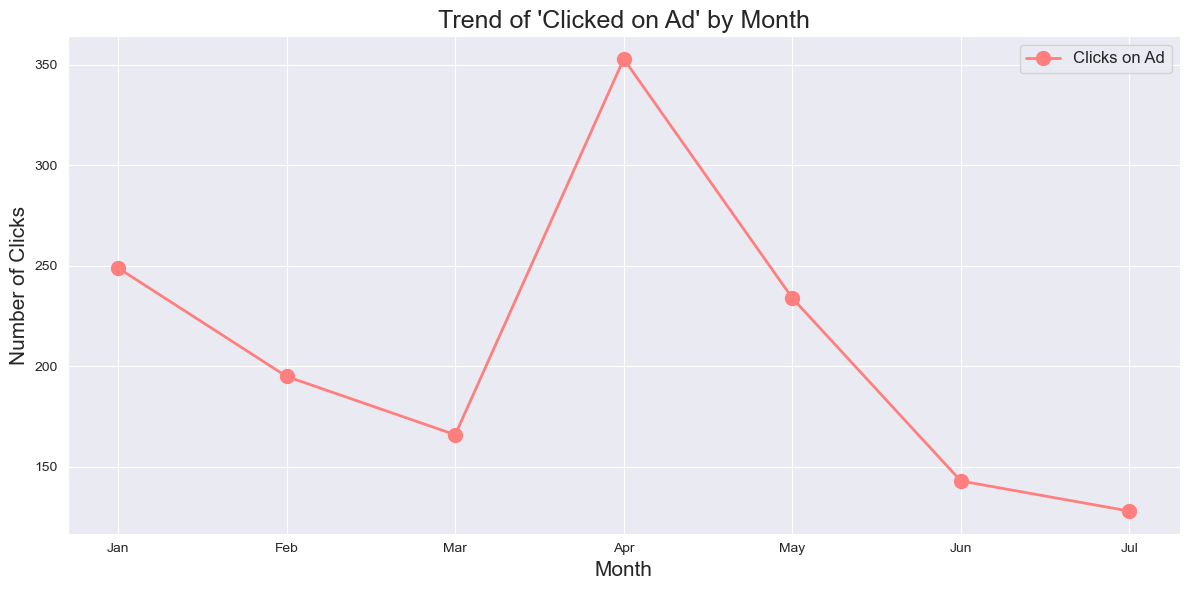

In [309]:
plt.figure(figsize=(12,6))

plt.plot(month_trend['Month'], month_trend['Clicked on Ad'], marker='o', markersize=10, linestyle='-', linewidth=2, color='#FF7F7F', label='Clicks on Ad')

plt.title("Trend of 'Clicked on Ad' by Month", fontsize=18)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Clicks', fontsize=15)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(fontsize=12)
sns.set_style("darkgrid")  
plt.tight_layout()
plt.show()

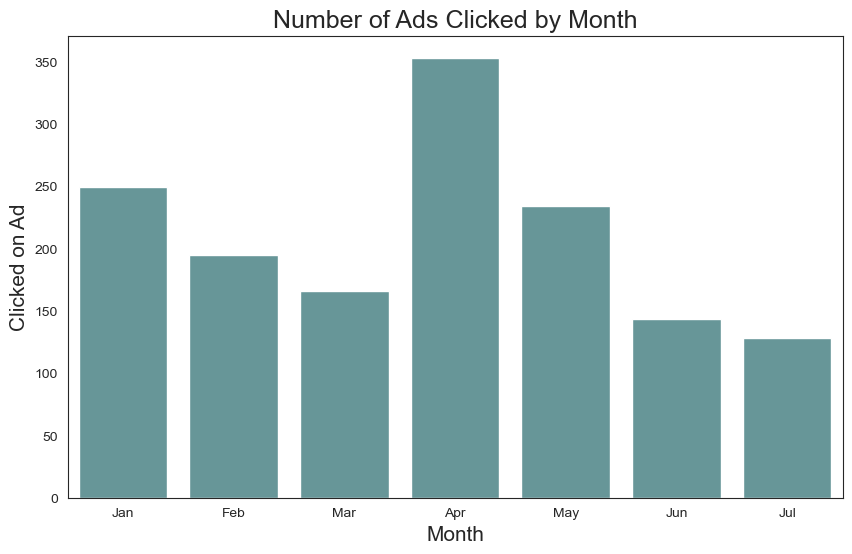

In [311]:
plt.figure(figsize=(10,6))

sns.barplot(data=month_trend, x='Month', y="Clicked on Ad", color='#5F9EA0')

plt.title("Number of Ads Clicked by Month", fontsize=18)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Clicked on Ad", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.set_style("white") 
plt.show()

In [312]:
df_month=df.copy()
mon_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']
df_month['Month'] = pd.Categorical(df_month['Month'], categories=month_order, ordered=True)

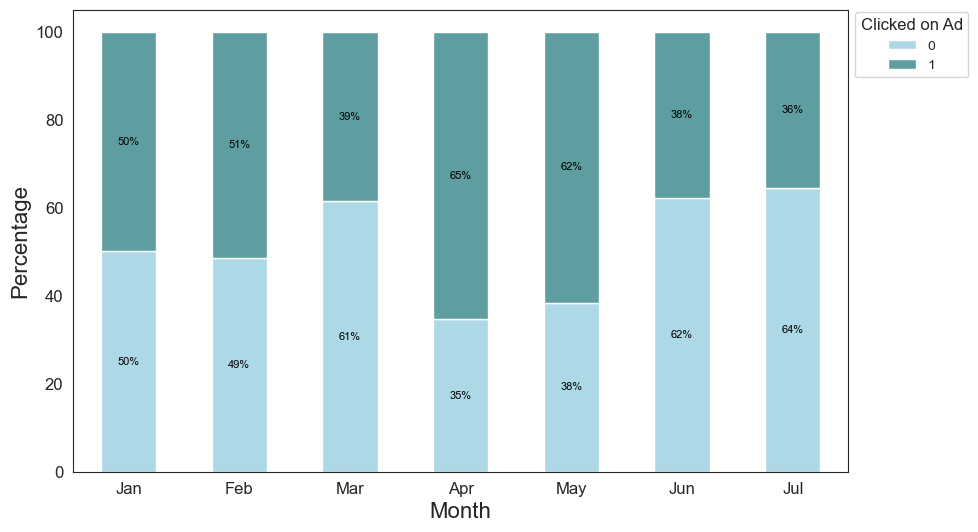

In [313]:
crosstab_plt(df_month, 'Month', 'Clicked on Ad')

In [314]:
chi_square(df, 'Month', 'Clicked on Ad')
print("🔳"*55)


🟥Month vs Clicked on Ad
Actual values:

Clicked on Ad     0     1   All
Month                          
Apr             187   353   540
Feb             184   195   379
Jan             251   249   500
Jul             232   128   360
Jun             236   143   379
Mar             265   166   431
May             146   234   380
All            1501  1468  2969
----------------------------------------------------------------------------------------------------
Expected values: 

[[273.00101044 266.99898956]
 [191.60626474 187.39373526]
 [252.77871337 247.22128663]
 [182.00067363 177.99932637]
 [191.60626474 187.39373526]
 [217.89525093 213.10474907]
 [192.11182216 187.88817784]]
----------------------------------------------------------------------------------------------------

Chi-square is : 146.99237161013497 
p_value is : 3.3444783730630815e-29 
degree of freedom is :6
----------------------------------------------------------------------------------------------------
There is statis

### There is a statistically significant association between `"Month" and "Clicked on Ad"` at the 5% significance level.

## Cramer's V

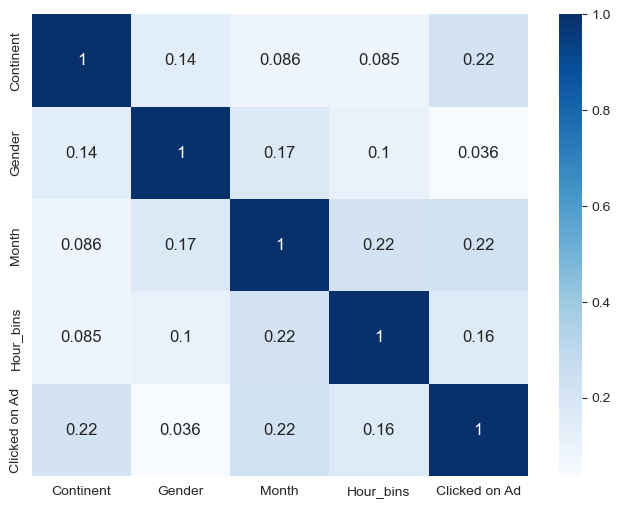

In [315]:
col_allcat = ['Continent', 'Gender', 'Month', 'Hour_bins', 'Clicked on Ad']

rows = []
for var1 in df[col_allcat]:
    cols = []
    for var2 in df[col_allcat]:
        cramers = cramers_v(df[var1],df[var2])
        cols.append(round(cramers,4))
    rows.append(cols)

cramers_results = np.array(rows)
cramers_matrix = pd.DataFrame(cramers_results, columns=col_allcat, index=col_allcat)
cramers_matrix

plt.figure(figsize=(8,6))
sns.heatmap(cramers_matrix, cmap="Blues", annot=True, annot_kws={"size": 12})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10) 
plt.show()

### While both "Month" and "Hour_bins" exhibit significant associations with the target variable "Clicked on Ad" at the 5% significance level, the low Cramér's V values indicate that these associations are weak.

## ➡️"Timestamp_Combined" 

### __`Summarization`__

In [316]:
df.groupby('Clicked on Ad').agg({'Timestamp_Combined':'mean'})

Timestamp_Combined
Clicked on Ad                    
0                 201604096231.94
1                 201603873427.98

### __`Visualization`__

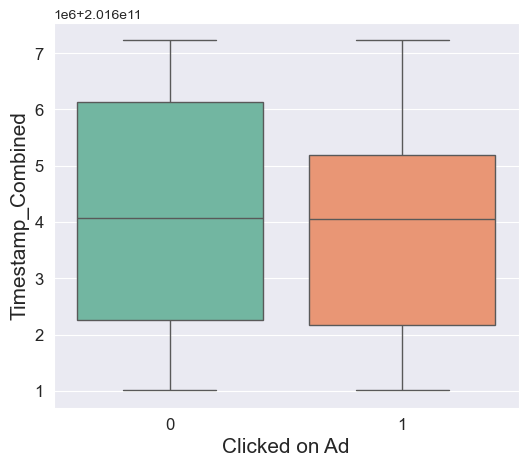

In [317]:
plt.figure(figsize=(6,5))
sns.set_style("darkgrid")

ax = sns.boxplot(data=df, x="Clicked on Ad", hue="Clicked on Ad", y="Timestamp_Combined", palette="Set2")

plt.xlabel('Clicked on Ad', fontsize=15)
plt.ylabel('Timestamp_Combined', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.get_legend().remove()
plt.show()

### There are no outliers present.

In [164]:
clicked = df[df['Clicked on Ad']==1]['Timestamp_Combined']
no_clicked = df[df['Clicked on Ad']==0]['Timestamp_Combined']

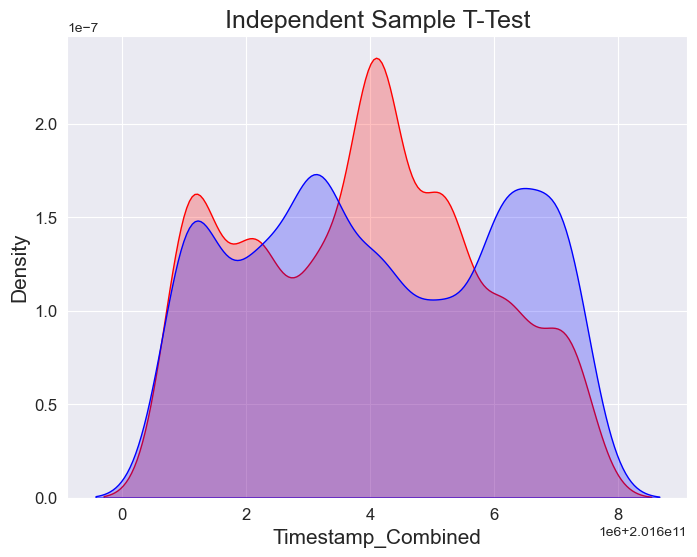

In [165]:
plt.figure(figsize=(8,6))

sns.kdeplot(clicked, fill=True,color='red')
sns.kdeplot(no_clicked, fill=True,color='blue')

plt.title("Independent Sample T-Test", fontsize=18)
plt.xlabel('Timestamp_Combined', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## __`Check the Assumptions of the Two-Sample T-test`__

### a) Independency: The two independent groups are "clicked" (1) and "no_clicked" (0).

### b) Normality test

In [166]:
stats.normaltest(clicked)

NormaltestResult(statistic=313.6984605692868, pvalue=7.607549670722223e-69)

In [167]:
stats.normaltest(no_clicked)

NormaltestResult(statistic=5962.96239062234, pvalue=0.0)

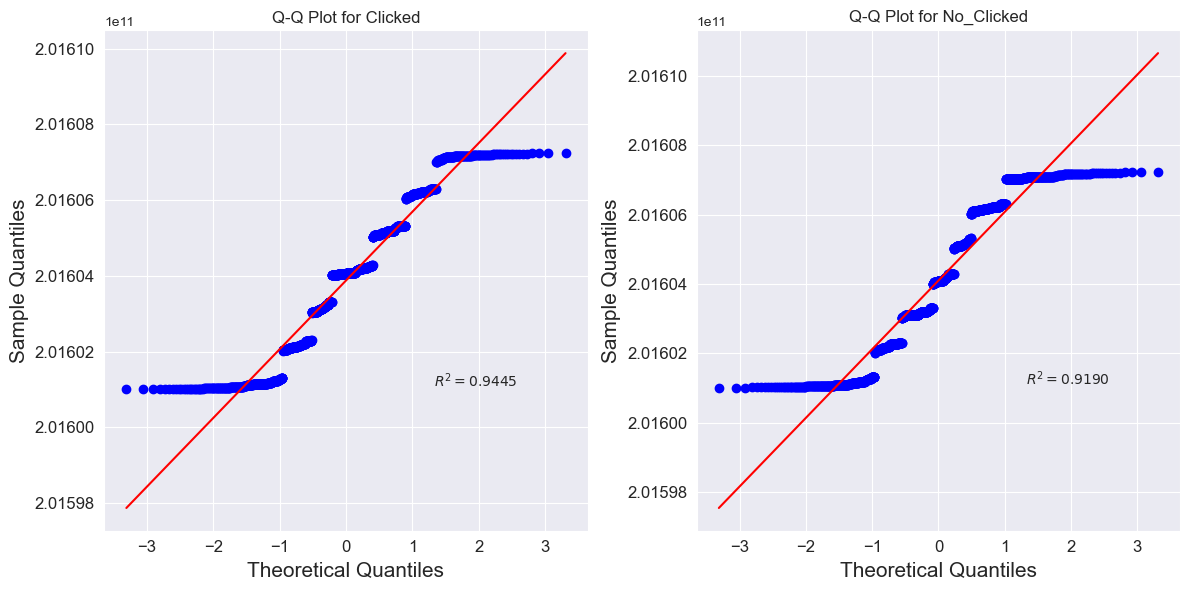

In [168]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
stats.probplot(clicked, plot=plt, rvalue=True)
plt.title('Q-Q Plot for Clicked')
plt.xlabel('Theoretical Quantiles', fontsize=15)
plt.ylabel('Sample Quantiles', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.subplot(1,2,2)
stats.probplot(no_clicked, plot=plt, rvalue=True)
plt.title('Q-Q Plot for No_Clicked')
plt.xlabel('Theoretical Quantiles', fontsize=15)
plt.ylabel('Sample Quantiles', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

- __Normality Tests (p-value < 0.05):__ Both groups are not normally distributed based on the normality test results, as the p-value is below 0.05.
  
- __Visual Evidence from Q-Q Plot:__ The Q-Q plots indicate that both the "Clicked" and "No_Clicked" groups deviate from normality, particularly at the higher and lower quantiles, suggesting the presence of non-normal behavior in the tails of the distributions.
  
- __Large Sample Size (CLT):__ With a large sample size (>30), the Central Limit Theorem allows us to assume the sample means are approximately normally distributed, supporting the validity of parametric tests.

### c)  Homogeneity of Variances

In [169]:
stats.levene(clicked, no_clicked)

LeveneResult(statistic=49.81986490189413, pvalue=2.0896874910269506e-12)

- The __Levene's test__ __p-value of 0.0000__ is less than 0.05, indicating unequal variances between the 'clicked' and 'no_clicked' groups. Therefore, we reject the assumption of equal variances and should consider using __Welch's t-test__.

### d) Welch's T-test

In [170]:
stats.ttest_ind(clicked, no_clicked, equal_var=False)

TtestResult(statistic=-3.0892909096281724, pvalue=0.002025044191847359, df=2949.3120170540856)

### __`Conclusion:`__ Since the p-value is below the significance level (0.05), the null hypothesis is rejected. This indicates a statistically significant difference in the means of `"Timestamp_Combined"` between the 'clicked' and 'no_clicked' groups at the 5% significance level.

In [210]:
df['Timestamp_Combined'].skew()

0.060056825020336636

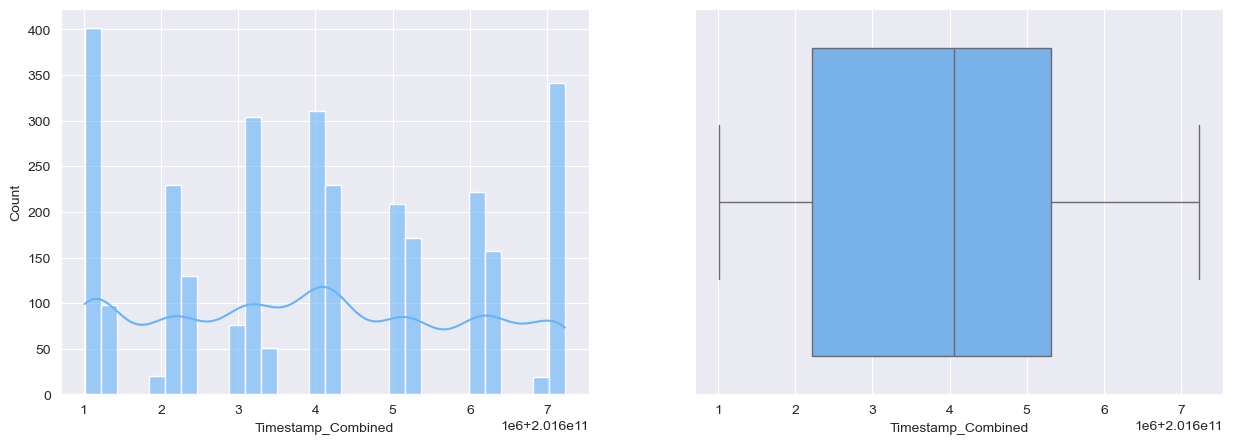

In [172]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.histplot(df['Timestamp_Combined'], ax=ax[0], bins=30, kde=True, color='#67B3FA', edgecolor='white', alpha=0.6)
sns.boxplot(x=df['Timestamp_Combined'], ax=ax[1], color='#67B3FA')

sns.set_style("darkgrid")  
plt.show()

## ➡️"Age" 

### __`Summarization`__

In [319]:
df.Age.skew()

0.3970399124567756

In [318]:
df.groupby('Clicked on Ad').agg({'Age':'mean'})

Age
Clicked on Ad      
0             31.83
1             39.64

In [174]:
df.groupby('Clicked on Ad').agg({'Age':'describe'})

Age                                         
                count  mean  std   min   25%   50%   75%   max
Clicked on Ad                                                 
0             1501.00 31.83 6.65 19.00 27.00 31.00 36.00 60.00
1             1468.00 39.64 8.55 19.00 34.00 40.00 45.00 60.00

### __`Visualization`__

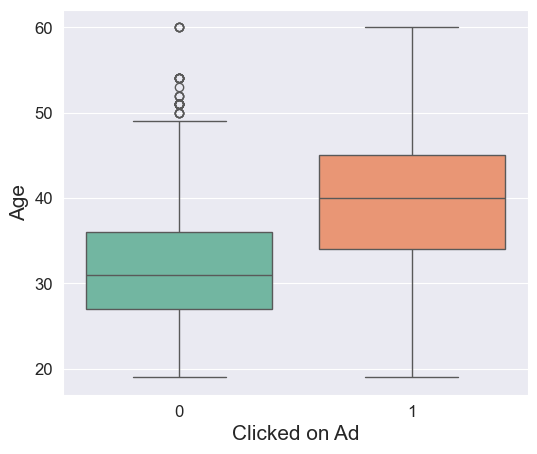

In [175]:
plt.figure(figsize=(6,5))
sns.set_style("darkgrid")

ax = sns.boxplot(data=df, x="Clicked on Ad", hue="Clicked on Ad", y="Age", palette="Set2")

plt.xlabel('Clicked on Ad', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.get_legend().remove()
plt.show()

### There are no significant outliers present.

In [176]:
clicked = df[df['Clicked on Ad']==1]['Age']
no_clicked = df[df['Clicked on Ad']==0]['Age']

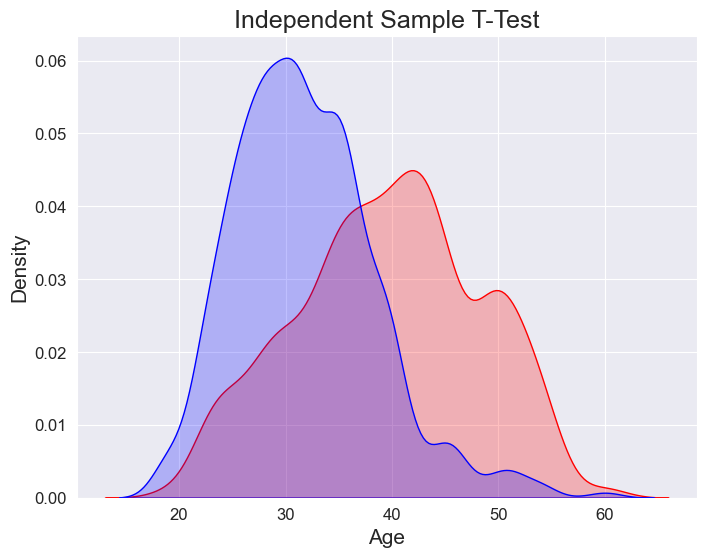

In [177]:
plt.figure(figsize=(8,6))

sns.kdeplot(clicked, fill=True,color='red')
sns.kdeplot(no_clicked, fill=True,color='blue')

plt.title("Independent Sample T-Test", fontsize=18)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## __`Check the Assumptions of the Two-Sample T-test`__

### a) Independency: The two independent groups are "clicked" (1) and "no_clicked" (0).

### b) Normality test

In [178]:
stats.normaltest(clicked)

NormaltestResult(statistic=65.75726047722901, pvalue=5.260079582016935e-15)

In [179]:
stats.normaltest(no_clicked)

NormaltestResult(statistic=157.0120872078137, pvalue=8.04004476438342e-35)

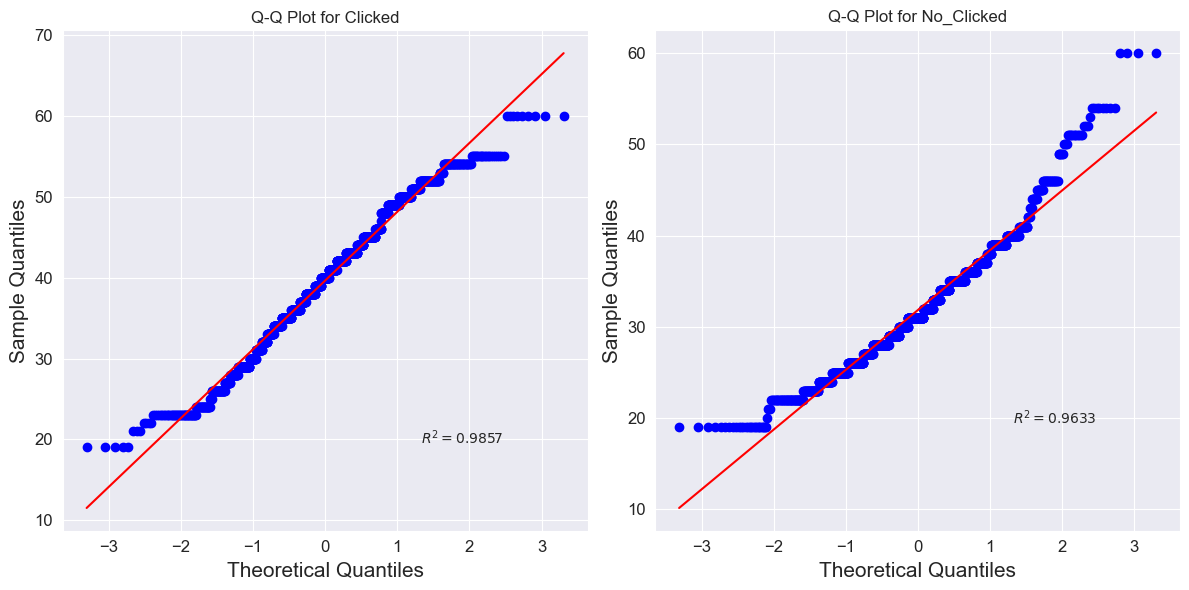

In [180]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
stats.probplot(clicked, plot=plt, rvalue=True)
plt.title('Q-Q Plot for Clicked')
plt.xlabel('Theoretical Quantiles', fontsize=15)
plt.ylabel('Sample Quantiles', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.subplot(1,2,2)
stats.probplot(no_clicked, plot=plt, rvalue=True)
plt.title('Q-Q Plot for No_Clicked')
plt.xlabel('Theoretical Quantiles', fontsize=15)
plt.ylabel('Sample Quantiles', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

- __Normality Tests (p-value < 0.05):__ Both groups are not normally distributed based on the normality test results, as the p-value is below 0.05.
  
- __Visual Evidence from Q-Q Plot:__ The Q-Q plots indicate that both the "Clicked" and "No_Clicked" groups deviate from normality, particularly at the higher and lower quantiles, suggesting the presence of non-normal behavior in the tails of the distributions.
  
- __Large Sample Size (CLT):__ With a large sample size (>30), the Central Limit Theorem allows us to assume the sample means are approximately normally distributed, supporting the validity of parametric tests.

### c)  Homogeneity of Variances

In [181]:
stats.levene(clicked, no_clicked)

LeveneResult(statistic=120.78020323612866, pvalue=1.4412044084753905e-27)

- The __Levene's test__ __p-value of 0.0000__ is less than 0.05, indicating unequal variances between the 'clicked' and 'no_clicked' groups. Therefore, we reject the assumption of equal variances and should consider using __Welch's t-test__.

### d) Welch's T-test

In [182]:
stats.ttest_ind(clicked, no_clicked, equal_var=False)

TtestResult(statistic=27.738235995106923, pvalue=1.2158555567892463e-149, df=2768.653896243436)

### __`Conclusion:`__ Since the p-value is below the significance level (0.05), the null hypothesis is rejected. This indicates a statistically significant difference in the means of "Age" between the 'clicked' and 'no_clicked' groups at the 5% significance level.

## ➡️"Area Income"

### __`Summarization`__

In [320]:
df['Area Income'].skew()

-0.5113054699594668

In [321]:
df.groupby('Clicked on Ad').agg({'Area Income':'mean'})

Area Income
Clicked on Ad             
0                 54299.81
1                 53218.87

In [192]:
df.groupby('Clicked on Ad').agg({'Area Income':'describe'})

Area Income                                               \
                    count     mean      std      min      25%      50%   
Clicked on Ad                                                            
0                 1501.00 54299.81 13645.14 14548.06 47575.44 56180.93   
1                 1468.00 53218.87 13097.52 13996.50 43974.49 55424.24   

                                 
                   75%      max  
Clicked on Ad                    
0             63430.33 77988.71  
1             60514.05 79332.33

### __`Visualization`__

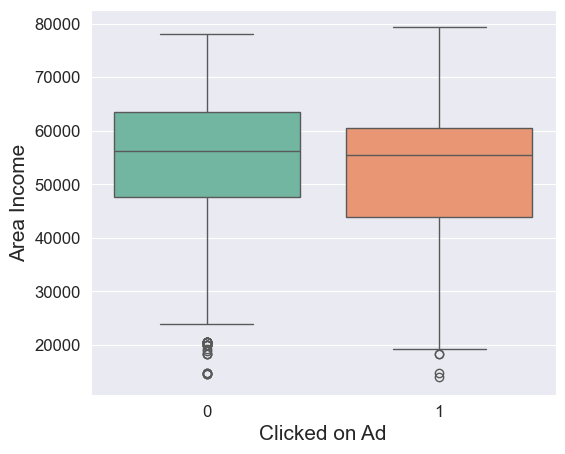

In [193]:
plt.figure(figsize=(6,5))
sns.set_style("darkgrid")

ax = sns.boxplot(data=df, x="Clicked on Ad", hue="Clicked on Ad", y="Area Income", palette="Set2")

plt.xlabel('Clicked on Ad', fontsize=15)
plt.ylabel('Area Income', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.get_legend().remove()
plt.show()

### There are no significant outliers present.

In [194]:
clicked = df[df['Clicked on Ad']==1]['Area Income']
no_clicked = df[df['Clicked on Ad']==0]['Area Income']

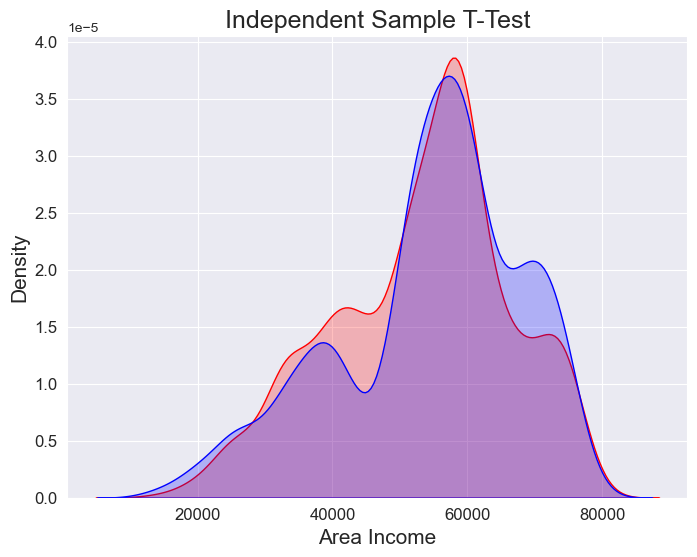

In [195]:
plt.figure(figsize=(8,6))

sns.kdeplot(clicked, fill=True,color='red')
sns.kdeplot(no_clicked, fill=True,color='blue')

plt.title("Independent Sample T-Test", fontsize=18)
plt.xlabel('Area Income', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## __`Check the Assumptions of the Two-Sample T-test`__

### a) Independency: The two independent groups are "clicked" (1) and "no_clicked" (0).

### b) Normality test

In [196]:
stats.normaltest(clicked)

NormaltestResult(statistic=49.17481816741575, pvalue=2.098089018460269e-11)

In [197]:
stats.normaltest(no_clicked)

NormaltestResult(statistic=88.4860036401257, pvalue=6.102509254650143e-20)

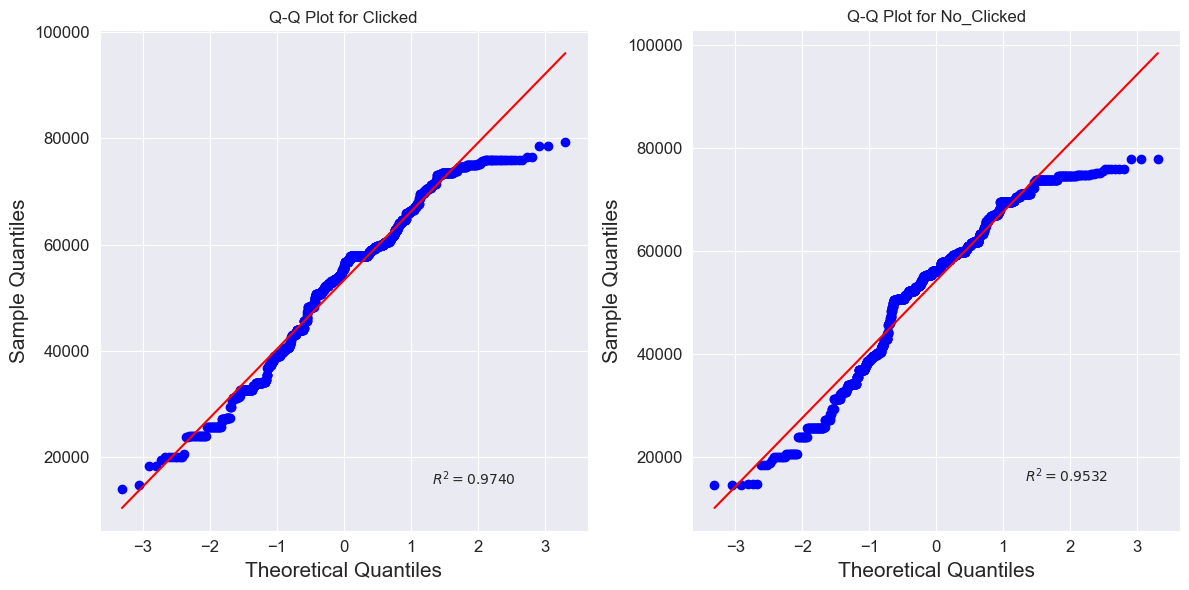

In [198]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
stats.probplot(clicked, plot=plt, rvalue=True)
plt.title('Q-Q Plot for Clicked')
plt.xlabel('Theoretical Quantiles', fontsize=15)
plt.ylabel('Sample Quantiles', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.subplot(1,2,2)
stats.probplot(no_clicked, plot=plt, rvalue=True)
plt.title('Q-Q Plot for No_Clicked')
plt.xlabel('Theoretical Quantiles', fontsize=15)
plt.ylabel('Sample Quantiles', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

- __Normality Tests (p-value < 0.05):__ Both groups are not normally distributed based on the normality test results, as the p-value is below 0.05.
  
- __Visual Evidence from Q-Q Plot:__ The Q-Q plots indicate that both the "Clicked" and "No_Clicked" groups deviate from normality, particularly at the higher and lower quantiles, suggesting the presence of non-normal behavior in the tails of the distributions.
  
- __Large Sample Size (CLT):__ With a large sample size (>30), the Central Limit Theorem allows us to assume the sample means are approximately normally distributed, supporting the validity of parametric tests.

### c)  Homogeneity of Variances

In [199]:
stats.levene(clicked, no_clicked)

LeveneResult(statistic=0.12101454499828429, pvalue=0.7279614052118969)

- The __Levene's test p-value is 0.7279__, which is greater than the significance level (0.05). This indicates that we fail to reject the null hypothesis, suggesting that the variances of the "clicked" and "no_clicked" groups are equal. Therefore, a __pooled t-test__ can be conducted.

### d) Pooled T-test

In [200]:
stats.ttest_ind(clicked, no_clicked, equal_var=True )

TtestResult(statistic=-2.201335623824925, pvalue=0.027789006305372056, df=2967.0)

### __`Conclusion:`__ The pooled t-test resulted in a p-value of 0.0277, which is below the significance level of 0.05. Therefore, the null hypothesis is rejected, indicating a statistically significant difference in the means of "Area Income" between the "clicked" and "no_clicked" groups at the 5% significance level.

## ➡️"Daily Time Spent on Site"

### __`Summarization`__

In [322]:
df['Daily Time Spent on Site'].skew()

0.0866739976254632

In [213]:
df.groupby('Clicked on Ad').agg({'Daily Time Spent on Site':'mean'})

Daily Time Spent on Site
Clicked on Ad                          
0                                 60.62
1                                 62.80

### __`Visualization`__

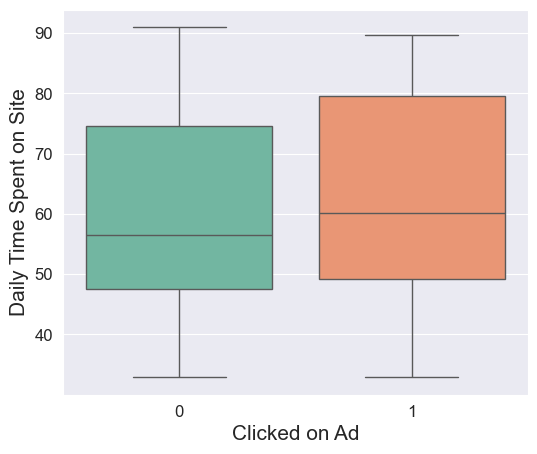

In [214]:
plt.figure(figsize=(6,5))
sns.set_style("darkgrid")

ax = sns.boxplot(data=df, x="Clicked on Ad", hue="Clicked on Ad", y="Daily Time Spent on Site", palette="Set2")

plt.xlabel('Clicked on Ad', fontsize=15)
plt.ylabel('Daily Time Spent on Site', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.get_legend().remove()
plt.show()

### There are no outliers present.

In [215]:
clicked = df[df['Clicked on Ad']==1]['Daily Time Spent on Site']
no_clicked = df[df['Clicked on Ad']==0]['Daily Time Spent on Site']

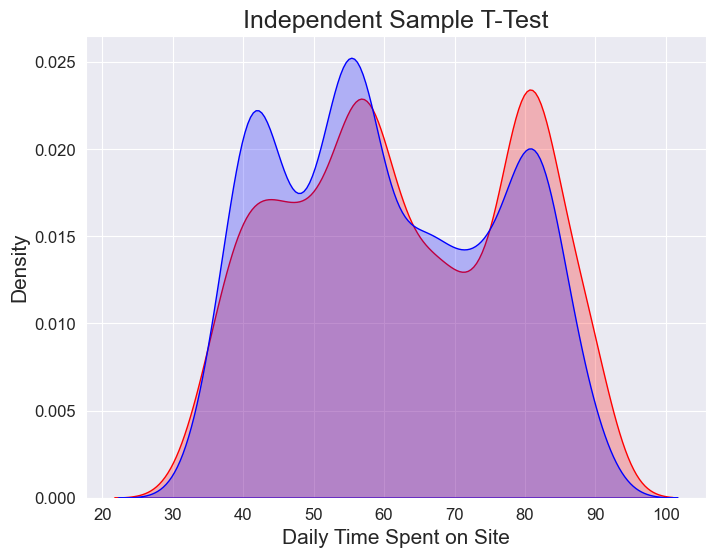

In [216]:
plt.figure(figsize=(8,6))

sns.kdeplot(clicked, fill=True,color='red')
sns.kdeplot(no_clicked, fill=True,color='blue')

plt.title("Independent Sample T-Test", fontsize=18)
plt.xlabel('Daily Time Spent on Site', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## __`Check the Assumptions of the Two-Sample T-test`__

### a) Independency: The two independent groups are "clicked" (1) and "no_clicked" (0).

### b) Normality test

In [217]:
stats.normaltest(clicked)

NormaltestResult(statistic=1534.0999320362916, pvalue=0.0)

In [218]:
stats.normaltest(no_clicked)

NormaltestResult(statistic=1186.1297307365635, pvalue=2.7239652307992193e-258)

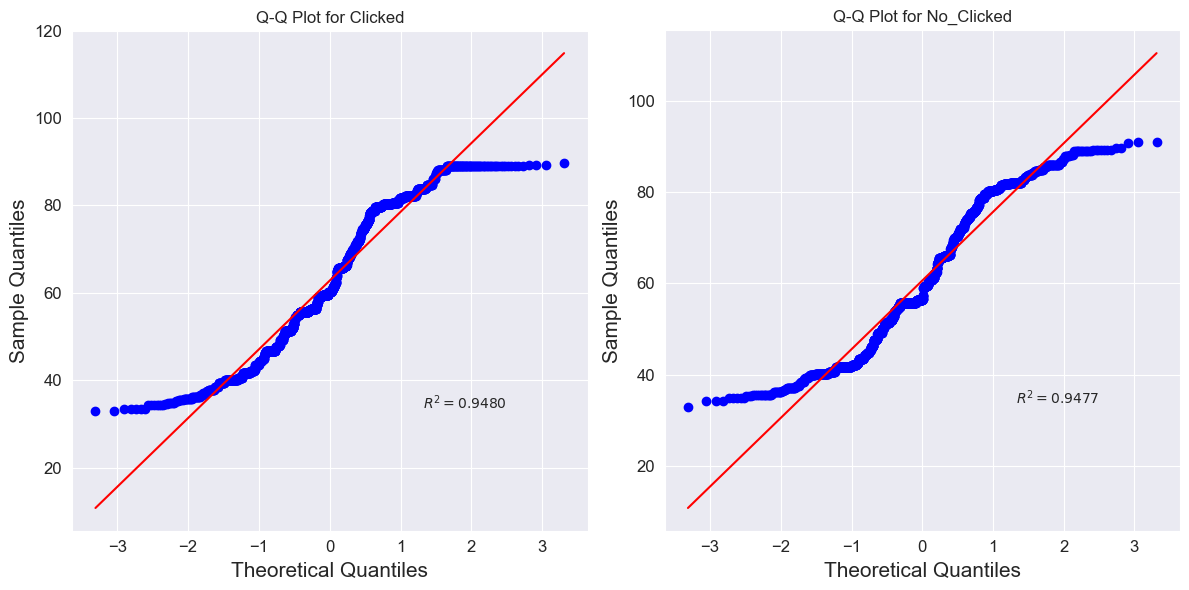

In [219]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
stats.probplot(clicked, plot=plt, rvalue=True)
plt.title('Q-Q Plot for Clicked')
plt.xlabel('Theoretical Quantiles', fontsize=15)
plt.ylabel('Sample Quantiles', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.subplot(1,2,2)
stats.probplot(no_clicked, plot=plt, rvalue=True)
plt.title('Q-Q Plot for No_Clicked')
plt.xlabel('Theoretical Quantiles', fontsize=15)
plt.ylabel('Sample Quantiles', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

- __Normality Tests (p-value < 0.05):__ Both groups are not normally distributed based on the normality test results, as the p-value is below 0.05.
  
- __Visual Evidence from Q-Q Plot:__ The Q-Q plots indicate that both the "Clicked" and "No_Clicked" groups deviate from normality, particularly at the higher and lower quantiles, suggesting the presence of non-normal behavior in the tails of the distributions.
  
- __Large Sample Size (CLT):__ With a large sample size (>30), the Central Limit Theorem allows us to assume the sample means are approximately normally distributed, supporting the validity of parametric tests.

### c)  Homogeneity of Variances

In [220]:
stats.levene(clicked, no_clicked)

LeveneResult(statistic=5.061127378229268, pvalue=0.02454133115322903)

- The __Levene's test p-value is 0.0245__, which is less than the significance level (0.05). This indicates that we reject the null hypothesis, suggesting that the variances of the "clicked" and "no_clicked" groups are not equal. Therefore, a Welch's t-test should be conducted.

### d) Welch's T-test

In [221]:
stats.ttest_ind(clicked, no_clicked, equal_var=False)

TtestResult(statistic=3.7596941268124255, pvalue=0.00017341700073397084, df=2954.2981635340307)

### __`Conclusion:`__ The welch's t-test resulted in a p-value of 0.0001, which is below the significance level of 0.05. Therefore, the null hypothesis is rejected, indicating a statistically significant difference in the means of "Daily Time Spent on Site" between the "clicked" and "no_clicked" groups at the 5% significance level.

## ➡️"Daily Internet Usage"

### __`Summarization`__

In [323]:
df['Daily Internet Usage'].skew()

-0.009931007996005463

In [222]:
df.groupby('Clicked on Ad').agg({'Daily Internet Usage':'mean'})

Daily Internet Usage
Clicked on Ad                      
0                            183.11
1                            173.86

### __`Visualization`__

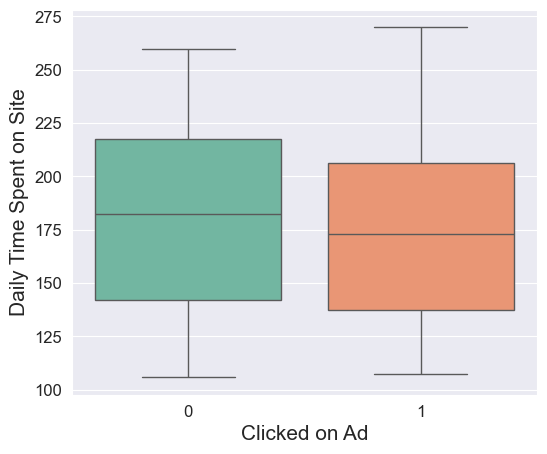

In [223]:
plt.figure(figsize=(6,5))
sns.set_style("darkgrid")

ax = sns.boxplot(data=df, x="Clicked on Ad", hue="Clicked on Ad", y="Daily Internet Usage", palette="Set2")

plt.xlabel('Clicked on Ad', fontsize=15)
plt.ylabel('Daily Time Spent on Site', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.get_legend().remove()
plt.show()

### There are no outliers present.

In [224]:
clicked = df[df['Clicked on Ad']==1]['Daily Internet Usage']
no_clicked = df[df['Clicked on Ad']==0]['Daily Internet Usage']

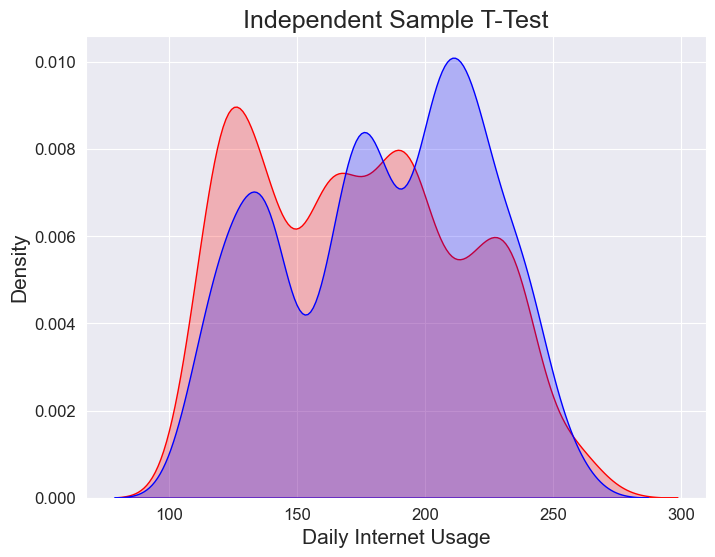

In [225]:
plt.figure(figsize=(8,6))

sns.kdeplot(clicked, fill=True,color='red')
sns.kdeplot(no_clicked, fill=True,color='blue')

plt.title("Independent Sample T-Test", fontsize=18)
plt.xlabel('Daily Internet Usage', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## __`Check the Assumptions of the Two-Sample T-test`__

### a) Independency: The two independent groups are "clicked" (1) and "no_clicked" (0).

### b) Normality test

In [226]:
stats.normaltest(clicked)

NormaltestResult(statistic=457.31781276364273, pvalue=4.951066052741172e-100)

In [227]:
stats.normaltest(no_clicked)

NormaltestResult(statistic=498.7342913478236, pvalue=5.026025247258467e-109)

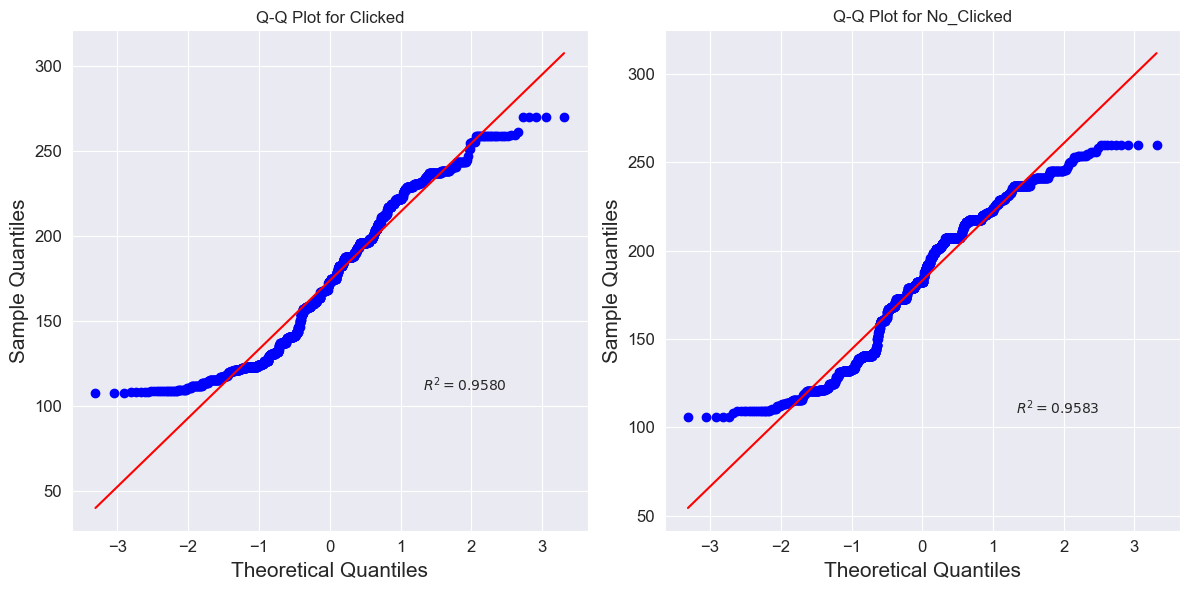

In [228]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
stats.probplot(clicked, plot=plt, rvalue=True)
plt.title('Q-Q Plot for Clicked')
plt.xlabel('Theoretical Quantiles', fontsize=15)
plt.ylabel('Sample Quantiles', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.subplot(1,2,2)
stats.probplot(no_clicked, plot=plt, rvalue=True)
plt.title('Q-Q Plot for No_Clicked')
plt.xlabel('Theoretical Quantiles', fontsize=15)
plt.ylabel('Sample Quantiles', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

- __Normality Tests (p-value < 0.05):__ Both groups are not normally distributed based on the normality test results, as the p-value is below 0.05.
  
- __Visual Evidence from Q-Q Plot:__ The Q-Q plots indicate that both the "Clicked" and "No_Clicked" groups deviate from normality, particularly at the higher and lower quantiles, suggesting the presence of non-normal behavior in the tails of the distributions.
  
- __Large Sample Size (CLT):__ With a large sample size (>30), the Central Limit Theorem allows us to assume the sample means are approximately normally distributed, supporting the validity of parametric tests.

### c)  Homogeneity of Variances

In [229]:
stats.levene(clicked, no_clicked)

LeveneResult(statistic=3.8328425604903087, pvalue=0.05035123414208378)

- The __Levene's test p-value of 0.0503__ is larger than 0.05, indicating equal variances between the 'clicked' and 'no_clicked' groups. Therefore, we fail to reject the assumption of equal variances and can proceed with a __pooled t-test__.

### d) Pooled T-test

In [230]:
stats.ttest_ind(clicked, no_clicked, equal_var=True)

TtestResult(statistic=-6.235444295673429, pvalue=5.144343863559137e-10, df=2967.0)

### __`Conclusion:`__ Since the p-value is below the significance level (0.05), the null hypothesis is rejected. This indicates a statistically significant difference in the means of "Daily Internet Usage" between the 'clicked' and 'no_clicked' groups at the 5% significance level.

## 📌After the bivariate analysis, all the predictor variables, except for "Gender," demonstrate a relationship with the target variable, "Clicked on Ad."

In [324]:
df

Timestamp_Combined  Year Month  Day  Hour  Minute           Timestamp  \
0        201607211054.00  2016   Jul   21    10      54 2016-07-21 10:54:35   
1        201601310512.00  2016   Jan   31     5      12 2016-01-31 05:12:44   
2        201603090041.00  2016   Mar    9     0      41 2016-03-09 00:41:46   
3        201606110647.00  2016   Jun   11     6      47 2016-06-11 06:47:55   
4        201605210136.00  2016   May   21     1      36 2016-05-21 01:36:16   
...                  ...   ...   ...  ...   ...     ...                 ...   
2995     201607010112.00  2016   Jul    1     1      12 2016-07-01 01:12:04   
2996     201604061124.00  2016   Apr    6    11      24 2016-04-06 11:24:21   
2997     201601030322.00  2016   Jan    3     3      22 2016-01-03 03:22:15   
2998     201605281220.00  2016   May   28    12      20 2016-05-28 12:20:15   
2999     201604040707.00  2016   Apr    4     7       7 2016-04-04 07:07:46   

                                   Ad Topic Line Continent   Age  Gender  \
0            Total 5thgeneration standardization      Asia 30.00  Female   
1     Function-based incremental standardization    Africa 51.00  Female   
2                Digitized content-based circuit    Africa 29.00  Female   
3        Configurable disintermediate throughput    Africa 24.00  Female   
4        Front-line bandwidth-monitored capacity    Europe 27.00  Female   
...                                          ...       ...   ...     ...   
2995          Multi-layered user-facing paradigm    Africa 36.00  Female   
2996               Innovative interactive portal    Europe 42.00  Female   
2997              Profound executive flexibility      Asia 31.00    Male   
2998              Managed zero tolerance concept    Europe 28.00    Male   
2999            Realigned content-based leverage    Africa 50.00  Female   

      Area Income  Daily Time Spent on Site  Daily Internet Usage  \
0        54723.19                     49.21                201.58   
1        74535.94                     51.65                188.56   
2        53431.35                     47.64                200.71   
3        52252.91                     55.60                167.22   
4        69646.35                     78.84                239.32   
...           ...                       ...                   ...   
2995     61610.05                     44.33                140.46   
2996     60514.05                     80.03                243.61   
2997     61840.26                     41.73                207.17   
2998     51501.38                     41.73                120.49   
2999     43974.49                     46.61                123.13   

      Clicked on Ad  Hour_bins  
0                 1    Morning  
1                 0      Night  
2                 0      Night  
3                 1    Morning  
4                 0      Night  
...             ...        ...  
2995              1      Night  
2996              1    Morning  
2997              1      Night  
2998              0  Afternoon  
2999              1    Morning  

[2969 rows x 16 columns]

In [325]:
df_all = df.copy()

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2969 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Timestamp_Combined        2969 non-null   float64       
 1   Year                      2969 non-null   int32         
 2   Month                     2969 non-null   object        
 3   Day                       2969 non-null   int32         
 4   Hour                      2969 non-null   int32         
 5   Minute                    2969 non-null   int32         
 6   Timestamp                 2969 non-null   datetime64[ns]
 7   Ad Topic Line             2969 non-null   object        
 8   Continent                 2969 non-null   object        
 9   Age                       2969 non-null   float64       
 10  Gender                    2969 non-null   object        
 11  Area Income               2969 non-null   float64       
 12  Daily Time Spent on Site 

## The unnecessary columns will be dropped to clean up the dataset.

In [328]:
df = df.drop(columns=['Year','Day','Hour','Minute','Timestamp','Ad Topic Line'])

In [329]:
df = df.reindex(columns=['Timestamp_Combined','Month','Hour_bins','Gender','Age',\
                        'Continent','Area Income','Daily Internet Usage','Daily Time Spent on Site','Clicked on Ad'])

In [330]:
df

Timestamp_Combined Month  Hour_bins  Gender   Age Continent  \
0        201607211054.00   Jul    Morning  Female 30.00      Asia   
1        201601310512.00   Jan      Night  Female 51.00    Africa   
2        201603090041.00   Mar      Night  Female 29.00    Africa   
3        201606110647.00   Jun    Morning  Female 24.00    Africa   
4        201605210136.00   May      Night  Female 27.00    Europe   
...                  ...   ...        ...     ...   ...       ...   
2995     201607010112.00   Jul      Night  Female 36.00    Africa   
2996     201604061124.00   Apr    Morning  Female 42.00    Europe   
2997     201601030322.00   Jan      Night    Male 31.00      Asia   
2998     201605281220.00   May  Afternoon    Male 28.00    Europe   
2999     201604040707.00   Apr    Morning  Female 50.00    Africa   

      Area Income  Daily Internet Usage  Daily Time Spent on Site  \
0        54723.19                201.58                     49.21   
1        74535.94                188.56                     51.65   
2        53431.35                200.71                     47.64   
3        52252.91                167.22                     55.60   
4        69646.35                239.32                     78.84   
...           ...                   ...                       ...   
2995     61610.05                140.46                     44.33   
2996     60514.05                243.61                     80.03   
2997     61840.26                207.17                     41.73   
2998     51501.38                120.49                     41.73   
2999     43974.49                123.13                     46.61   

      Clicked on Ad  
0                 1  
1                 0  
2                 0  
3                 1  
4                 0  
...             ...  
2995              1  
2996              1  
2997              1  
2998              0  
2999              1  

[2969 rows x 10 columns]

In [331]:
df.isnull().sum()

Timestamp_Combined          0
Month                       0
Hour_bins                   0
Gender                      0
Age                         0
Continent                   0
Area Income                 0
Daily Internet Usage        0
Daily Time Spent on Site    0
Clicked on Ad               0
dtype: int64

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2969 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Timestamp_Combined        2969 non-null   float64 
 1   Month                     2969 non-null   object  
 2   Hour_bins                 2969 non-null   category
 3   Gender                    2969 non-null   object  
 4   Age                       2969 non-null   float64 
 5   Continent                 2969 non-null   object  
 6   Area Income               2969 non-null   float64 
 7   Daily Internet Usage      2969 non-null   float64 
 8   Daily Time Spent on Site  2969 non-null   float64 
 9   Clicked on Ad             2969 non-null   int64   
dtypes: category(1), float64(5), int64(1), object(3)
memory usage: 235.1+ KB


In [333]:
df['Hour_bins'] = df['Hour_bins'].astype(object)

In [334]:
df.dtypes

Timestamp_Combined          float64
Month                        object
Hour_bins                    object
Gender                       object
Age                         float64
Continent                    object
Area Income                 float64
Daily Internet Usage        float64
Daily Time Spent on Site    float64
Clicked on Ad                 int64
dtype: object

In [335]:
df.astype('object').describe().transpose()

count unique             top   freq
Timestamp_Combined       2969.00 424.00 201603110005.00  74.00
Month                       2969      7             Apr    540
Hour_bins                   2969      4         Evening    906
Gender                      2969      2          Female   1588
Age                      2969.00  38.00           35.00 179.00
Continent                   2969      7            Asia    739
Area Income              2969.00 385.00        57868.44  96.00
Daily Internet Usage     2969.00 368.00          207.17 120.00
Daily Time Spent on Site 2969.00 342.00           55.60 198.00
Clicked on Ad               2969      2               0   1501

## Evaluating "Clicked on Ad" vs Numerical Variables Using Correlations:

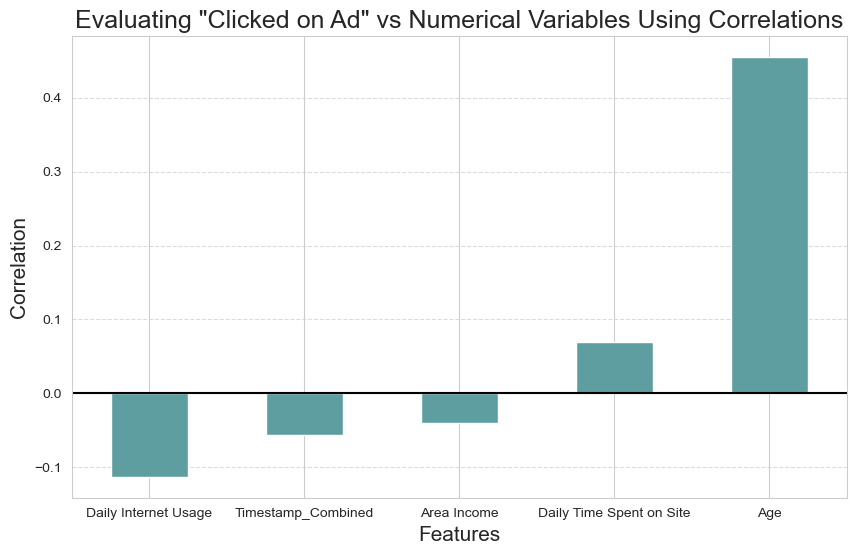

In [185]:
col_num=df.select_dtypes(include=['float', 'int']).columns

corrs=df[col_num].corr()['Clicked on Ad'].drop('Clicked on Ad')

plt.figure(figsize=(10, 6))
corrs.sort_values().plot(kind='bar', color='#5F9EA0')
plt.axhline(0, color='black', linewidth=1.5, linestyle='-')

plt.title('Evaluating "Clicked on Ad" vs Numerical Variables Using Correlations', fontsize=18)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.set_style("whitegrid")
plt.show()

### "Age" shows the strongest positive correlation with "Clicked on Ad," indicating that older users are more likely to click on ads, while other variables have weaker correlations.

#  ⬛ PREPARING THE DATASET ⬛

## 🔴 One-Hot Encoding for Categorical Variables

In [336]:
df = pd.get_dummies(df, drop_first=True)

In [338]:
df

Timestamp_Combined   Age  Area Income  Daily Internet Usage  \
0        201607211054.00 30.00     54723.19                201.58   
1        201601310512.00 51.00     74535.94                188.56   
2        201603090041.00 29.00     53431.35                200.71   
3        201606110647.00 24.00     52252.91                167.22   
4        201605210136.00 27.00     69646.35                239.32   
...                  ...   ...          ...                   ...   
2995     201607010112.00 36.00     61610.05                140.46   
2996     201604061124.00 42.00     60514.05                243.61   
2997     201601030322.00 31.00     61840.26                207.17   
2998     201605281220.00 28.00     51501.38                120.49   
2999     201604040707.00 50.00     43974.49                123.13   

      Daily Time Spent on Site  Clicked on Ad  Month_Feb  Month_Jan  \
0                        49.21              1      False      False   
1                        51.65              0      False       True   
2                        47.64              0      False      False   
3                        55.60              1      False      False   
4                        78.84              0      False      False   
...                        ...            ...        ...        ...   
2995                     44.33              1      False      False   
2996                     80.03              1      False      False   
2997                     41.73              1      False       True   
2998                     41.73              0      False      False   
2999                     46.61              1      False      False   

      Month_Jul  Month_Jun  ...  Hour_bins_Evening  Hour_bins_Morning  \
0          True      False  ...              False               True   
1         False      False  ...              False              False   
2         False      False  ...              False              False   
3         False       True  ...              False               True   
4         False      False  ...              False              False   
...         ...        ...  ...                ...                ...   
2995       True      False  ...              False              False   
2996      False      False  ...              False               True   
2997      False      False  ...              False              False   
2998      False      False  ...              False              False   
2999      False      False  ...              False               True   

      Hour_bins_Night  Gender_Male  Continent_Antarctica  Continent_Asia  \
0               False        False                 False            True   
1                True        False                 False           False   
2                True        False                 False           False   
3               False        False                 False           False   
4                True        False                 False           False   
...               ...          ...                   ...             ...   
2995             True        False                 False           False   
2996            False        False                 False           False   
2997             True         True                 False            True   
2998            False         True                 False           False   
2999            False        False                 False           False   

      Continent_Europe  Continent_North America  Continent_Oceania  \
0                False                    False              False   
1                False                    False              False   
2                False                    False              False   
3                False                    False              False   
4                 True                    False              False   
...                ...                      ...                ...   
2995             False                    Fa

## 🔴 Collinearity

In [339]:
corr = df.corr()['Clicked on Ad'].sort_values(ascending=False)
print(corr)

Clicked on Ad               1.00
Age                         0.45
Continent_Oceania           0.14
Month_May                   0.09
Continent_Europe            0.09
Daily Time Spent on Site    0.07
Hour_bins_Evening           0.07
Continent_Antarctica        0.04
Hour_bins_Morning           0.03
Continent_North America     0.02
Month_Feb                   0.02
Month_Jan                   0.00
Gender_Male                -0.04
Area Income                -0.04
Timestamp_Combined         -0.06
Continent_Asia             -0.06
Continent_South America    -0.07
Month_Jun                  -0.09
Month_Mar                  -0.09
Month_Jul                  -0.10
Daily Internet Usage       -0.11
Hour_bins_Night            -0.16
Name: Clicked on Ad, dtype: float64


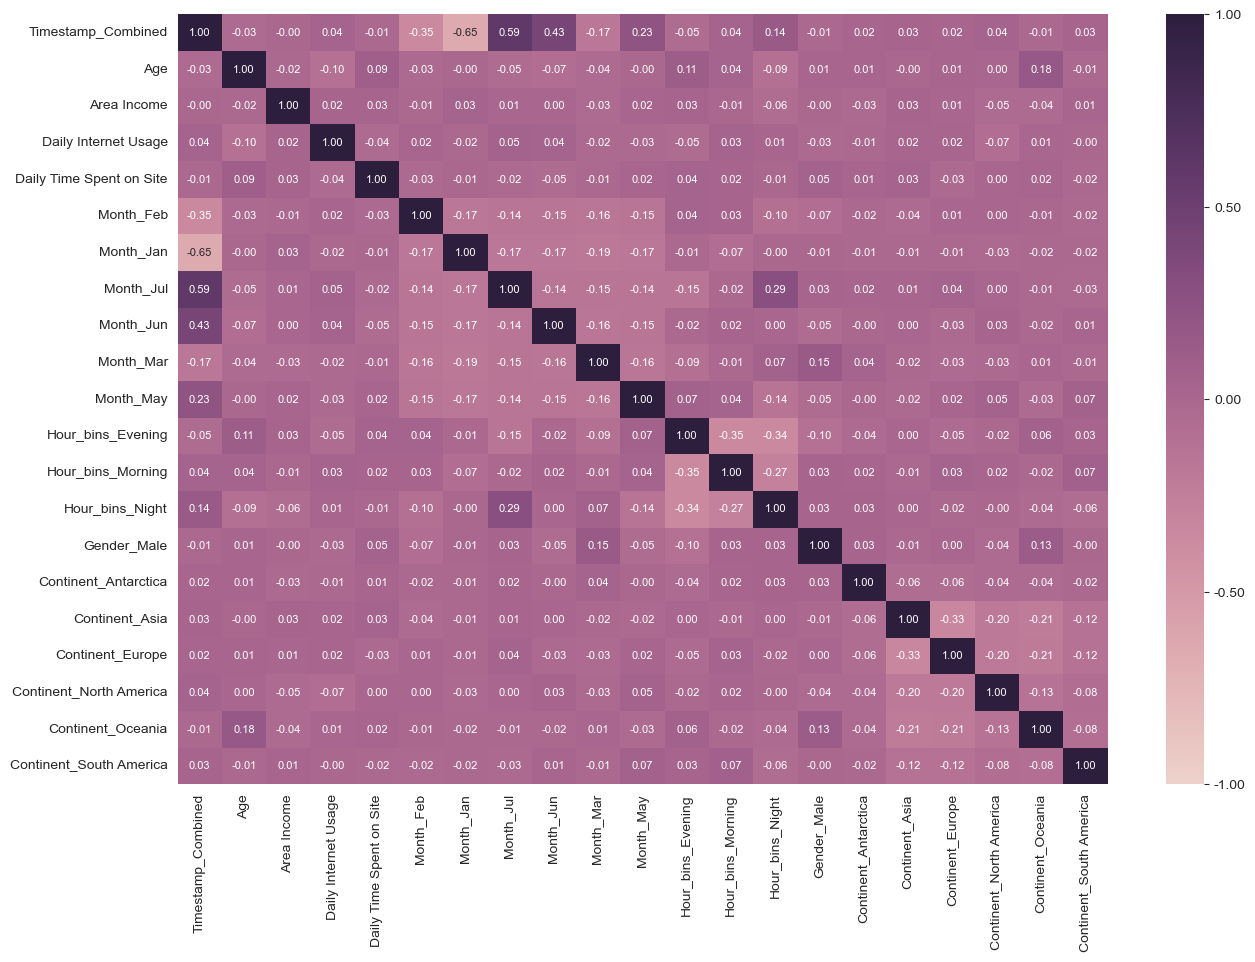

In [340]:
plt.figure(figsize=(15,10))

sns.heatmap(df.drop('Clicked on Ad',axis=1).corr(), vmin=-1, fmt='.2f', annot=True, annot_kws={"size": 8}, 
            cmap=sns.cubehelix_palette(as_cmap=True),cbar_kws={'ticks': [-1, -0.5, 0, 0.5, 1], 'format': '%.2f'})
cbar = plt.gcf().axes[-1] 
cbar.tick_params(labelsize=10) 

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### The correlation matrix shows that there is no high collinearity between the predictor variables, as none of the correlations are close to 1 or -1. This suggests that collinearity is not a significant issue in this dataset.

## 🔴 Multi-Collinearity 

In [341]:
def calculate_vif(df):
    vif = pd.DataFrame()
    numeric_features = df.select_dtypes(include=['number','bool'])
    vif['Feature'] = numeric_features.columns
    vif['VIF'] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]
    return vif

In [342]:
df[df.select_dtypes('bool').columns] = df.select_dtypes('bool').astype(int)

In [343]:
df

Timestamp_Combined   Age  Area Income  Daily Internet Usage  \
0        201607211054.00 30.00     54723.19                201.58   
1        201601310512.00 51.00     74535.94                188.56   
2        201603090041.00 29.00     53431.35                200.71   
3        201606110647.00 24.00     52252.91                167.22   
4        201605210136.00 27.00     69646.35                239.32   
...                  ...   ...          ...                   ...   
2995     201607010112.00 36.00     61610.05                140.46   
2996     201604061124.00 42.00     60514.05                243.61   
2997     201601030322.00 31.00     61840.26                207.17   
2998     201605281220.00 28.00     51501.38                120.49   
2999     201604040707.00 50.00     43974.49                123.13   

      Daily Time Spent on Site  Clicked on Ad  Month_Feb  Month_Jan  \
0                        49.21              1          0          0   
1                        51.65              0          0          1   
2                        47.64              0          0          0   
3                        55.60              1          0          0   
4                        78.84              0          0          0   
...                        ...            ...        ...        ...   
2995                     44.33              1          0          0   
2996                     80.03              1          0          0   
2997                     41.73              1          0          1   
2998                     41.73              0          0          0   
2999                     46.61              1          0          0   

      Month_Jul  Month_Jun  ...  Hour_bins_Evening  Hour_bins_Morning  \
0             1          0  ...                  0                  1   
1             0          0  ...                  0                  0   
2             0          0  ...                  0                  0   
3             0          1  ...                  0                  1   
4             0          0  ...                  0                  0   
...         ...        ...  ...                ...                ...   
2995          1          0  ...                  0                  0   
2996          0          0  ...                  0                  1   
2997          0          0  ...                  0                  0   
2998          0          0  ...                  0                  0   
2999          0          0  ...                  0                  1   

      Hour_bins_Night  Gender_Male  Continent_Antarctica  Continent_Asia  \
0                   0            0                     0               1   
1                   1            0                     0               0   
2                   1            0                     0               0   
3                   0            0                     0               0   
4                   1            0                     0               0   
...               ...          ...                   ...             ...   
2995                1            0                     0               0   
2996                0            0                     0               0   
2997                1            1                     0               1   
2998                0            1                     0               0   
2999                0            0                     0               0   

      Continent_Europe  Continent_North America  Continent_Oceania  \
0                    0                        0                  0   
1                    0                        0                  0   
2                    0                        0                  0   
3                    0                        0                  0   
4                    1                        0                  0   
...                ...                      ...                ...   
2995                 0                      

In [345]:
df_drvif = df.drop('Clicked on Ad',axis=1)
df_vif = calculate_vif(df_drvif)
df_vif

Feature   VIF
0         Timestamp_Combined 85.83
1                        Age  1.10
2                Area Income  1.01
3       Daily Internet Usage  1.03
4   Daily Time Spent on Site  1.02
5                  Month_Feb  1.54
6                  Month_Jan  1.68
7                  Month_Jul  1.63
8                  Month_Jun  1.55
9                  Month_Mar  1.65
10                 Month_May  1.53
11         Hour_bins_Evening  1.57
12         Hour_bins_Morning  1.46
13           Hour_bins_Night  1.55
14               Gender_Male  1.07
15      Continent_Antarctica  1.05
16            Continent_Asia  1.64
17          Continent_Europe  1.64
18   Continent_North America  1.36
19         Continent_Oceania  1.47
20   Continent_South America  1.17

In [346]:
while True:
    df_vif = calculate_vif(df_drvif)
    df_vif_max = df_vif['VIF'].max()
    if df_vif_max <= 10:
        break
    feature_drop = df_vif.loc[df_vif['VIF'].idxmax(),'Feature']
    print(f'Dropping {feature_drop} with VIF {df_vif_max:.2f}')
    df_drvif.drop(columns=[feature_drop], inplace=True)

Dropping Timestamp_Combined with VIF 85.83
Dropping Age with VIF 15.48
Dropping Daily Internet Usage with VIF 14.42
Dropping Area Income with VIF 11.35


In [348]:
calculate_vif(df_drvif)

Feature  VIF
0   Daily Time Spent on Site 8.04
1                  Month_Feb 1.49
2                  Month_Jan 1.66
3                  Month_Jul 1.65
4                  Month_Jun 1.49
5                  Month_Mar 1.64
6                  Month_May 1.54
7          Hour_bins_Evening 2.05
8          Hour_bins_Morning 1.77
9            Hour_bins_Night 1.86
10               Gender_Male 1.96
11      Continent_Antarctica 1.05
12            Continent_Asia 1.95
13          Continent_Europe 1.90
14   Continent_North America 1.41
15         Continent_Oceania 1.50
16   Continent_South America 1.19

In [349]:
df_drvif

Daily Time Spent on Site  Month_Feb  Month_Jan  Month_Jul  Month_Jun  \
0                        49.21          0          0          1          0   
1                        51.65          0          1          0          0   
2                        47.64          0          0          0          0   
3                        55.60          0          0          0          1   
4                        78.84          0          0          0          0   
...                        ...        ...        ...        ...        ...   
2995                     44.33          0          0          1          0   
2996                     80.03          0          0          0          0   
2997                     41.73          0          1          0          0   
2998                     41.73          0          0          0          0   
2999                     46.61          0          0          0          0   

      Month_Mar  Month_May  Hour_bins_Evening  Hour_bins_Morning  \
0             0          0                  0                  1   
1             0          0                  0                  0   
2             1          0                  0                  0   
3             0          0                  0                  1   
4             0          1                  0                  0   
...         ...        ...                ...                ...   
2995          0          0                  0                  0   
2996          0          0                  0                  1   
2997          0          0                  0                  0   
2998          0          1                  0                  0   
2999          0          0                  0                  1   

      Hour_bins_Night  Gender_Male  Continent_Antarctica  Continent_Asia  \
0                   0            0                     0               1   
1                   1            0                     0               0   
2                   1            0                     0               0   
3                   0            0                     0               0   
4                   1            0                     0               0   
...               ...          ...                   ...             ...   
2995                1            0                     0               0   
2996                0            0                     0               0   
2997                1            1                     0               1   
2998                0            1                     0               0   
2999                0            0                     0               0   

      Continent_Europe  Continent_North America  Continent_Oceania  \
0                    0                        0                  0   
1                    0                        0                  0   
2                    0                        0                  0   
3                    0                        0                  0   
4                    1                        0                  0   
...                ...                      ...                ...   
2995                 0                        0                  0   
2996                 1                        0                  0   
2997                 0                        0                  0   
2998                 1                        0                  0   
2999                 0                        0                  0   

      Continent_South America  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
...                       ...  
2995                        0  
2996                        0  
2997                        0  
2998                        0  
2999                        0  

[2969 rows x 17 columns]

In [350]:
df_drvif = pd.concat([df_drvif, df['Clicked on Ad']], axis=1)
df_drvif

Daily Time Spent on Site  Month_Feb  Month_Jan  Month_Jul  Month_Jun  \
0                        49.21          0          0          1          0   
1                        51.65          0          1          0          0   
2                        47.64          0          0          0          0   
3                        55.60          0          0          0          1   
4                        78.84          0          0          0          0   
...                        ...        ...        ...        ...        ...   
2995                     44.33          0          0          1          0   
2996                     80.03          0          0          0          0   
2997                     41.73          0          1          0          0   
2998                     41.73          0          0          0          0   
2999                     46.61          0          0          0          0   

      Month_Mar  Month_May  Hour_bins_Evening  Hour_bins_Morning  \
0             0          0                  0                  1   
1             0          0                  0                  0   
2             1          0                  0                  0   
3             0          0                  0                  1   
4             0          1                  0                  0   
...         ...        ...                ...                ...   
2995          0          0                  0                  0   
2996          0          0                  0                  1   
2997          0          0                  0                  0   
2998          0          1                  0                  0   
2999          0          0                  0                  1   

      Hour_bins_Night  Gender_Male  Continent_Antarctica  Continent_Asia  \
0                   0            0                     0               1   
1                   1            0                     0               0   
2                   1            0                     0               0   
3                   0            0                     0               0   
4                   1            0                     0               0   
...               ...          ...                   ...             ...   
2995                1            0                     0               0   
2996                0            0                     0               0   
2997                1            1                     0               1   
2998                0            1                     0               0   
2999                0            0                     0               0   

      Continent_Europe  Continent_North America  Continent_Oceania  \
0                    0                        0                  0   
1                    0                        0                  0   
2                    0                        0                  0   
3                    0                        0                  0   
4                    1                        0                  0   
...                ...                      ...                ...   
2995                 0                        0                  0   
2996                 1                        0                  0   
2997                 0                        0                  0   
2998                 1                        0                  0   
2999                 0                        0                  0   

      Continent_South America  Clicked on Ad  
0                           0              1  
1                           0              0  
2                           0              0  
3                           0              1  
4                           0              0  
...                       ...            ...  
2995                        0              1  
2996                        0              1  
2997                        0              1  
2998                        

### Several features with high Variance Inflation Factor (VIF) values were dropped to address multicollinearity and improve model stability. `"Timestamp_Combined" (VIF 85.83), "Age" (VIF 15.48), "Daily Internet Usage" (VIF 14.42), and "Area Income" (VIF 11.35)` were removed due to their strong correlation with other predictors. These adjustments enhance the reliability, interpretability, and performance of the regression model.

## 🔴 Splitting the Dataset

In [351]:
df_clean = df.copy()

In [352]:
df_clean

Timestamp_Combined   Age  Area Income  Daily Internet Usage  \
0        201607211054.00 30.00     54723.19                201.58   
1        201601310512.00 51.00     74535.94                188.56   
2        201603090041.00 29.00     53431.35                200.71   
3        201606110647.00 24.00     52252.91                167.22   
4        201605210136.00 27.00     69646.35                239.32   
...                  ...   ...          ...                   ...   
2995     201607010112.00 36.00     61610.05                140.46   
2996     201604061124.00 42.00     60514.05                243.61   
2997     201601030322.00 31.00     61840.26                207.17   
2998     201605281220.00 28.00     51501.38                120.49   
2999     201604040707.00 50.00     43974.49                123.13   

      Daily Time Spent on Site  Clicked on Ad  Month_Feb  Month_Jan  \
0                        49.21              1          0          0   
1                        51.65              0          0          1   
2                        47.64              0          0          0   
3                        55.60              1          0          0   
4                        78.84              0          0          0   
...                        ...            ...        ...        ...   
2995                     44.33              1          0          0   
2996                     80.03              1          0          0   
2997                     41.73              1          0          1   
2998                     41.73              0          0          0   
2999                     46.61              1          0          0   

      Month_Jul  Month_Jun  ...  Hour_bins_Evening  Hour_bins_Morning  \
0             1          0  ...                  0                  1   
1             0          0  ...                  0                  0   
2             0          0  ...                  0                  0   
3             0          1  ...                  0                  1   
4             0          0  ...                  0                  0   
...         ...        ...  ...                ...                ...   
2995          1          0  ...                  0                  0   
2996          0          0  ...                  0                  1   
2997          0          0  ...                  0                  0   
2998          0          0  ...                  0                  0   
2999          0          0  ...                  0                  1   

      Hour_bins_Night  Gender_Male  Continent_Antarctica  Continent_Asia  \
0                   0            0                     0               1   
1                   1            0                     0               0   
2                   1            0                     0               0   
3                   0            0                     0               0   
4                   1            0                     0               0   
...               ...          ...                   ...             ...   
2995                1            0                     0               0   
2996                0            0                     0               0   
2997                1            1                     0               1   
2998                0            1                     0               0   
2999                0            0                     0               0   

      Continent_Europe  Continent_North America  Continent_Oceania  \
0                    0                        0                  0   
1                    0                        0                  0   
2                    0                        0                  0   
3                    0                        0                  0   
4                    1                        0                  0   
...                ...                      ...                ...   
2995                 0                      

In [353]:
df, df_Evaluation = train_test_split(df_clean, test_size=0.1, random_state=seed)

In [354]:
df.shape, df_Evaluation.shape

((2672, 22), (297, 22))

In [355]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    1357
1    1315
Name: count, dtype: int64

In [356]:
df['Clicked on Ad'].value_counts(normalize=True)

Clicked on Ad
0   0.51
1   0.49
Name: proportion, dtype: float64

### The dataset is fairly balanced in terms of the target variable "Clicked on Ad", with `1357 instances (51%) labeled as 0 (not clicked)` and `1315 instances (49%) labeled as 1 (clicked)`.

In [631]:
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

In [632]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, shuffle=True, test_size=0.2, random_state=seed)

In [633]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2137, 21), (2137,), (535, 21), (535,))

## 🔴 Scaling the Training Data and Applying the Same Scaler to the Test Data

In [634]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [362]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns, index=X_train.index)
X_train_sc

Timestamp_Combined   Age  Area Income  Daily Internet Usage  \
131                -0.45 -0.77         1.19                  0.73   
1120               -0.88 -0.77         1.19                  0.55   
875                -0.46 -0.89         1.10                  1.97   
2762                0.56 -0.89        -0.05                  1.28   
242                 0.03  1.57        -1.09                  0.43   
...                  ...   ...          ...                   ...   
751                 0.10 -0.30        -1.04                 -1.41   
576                 1.09 -0.77         1.19                  0.55   
760                -1.35  1.80         1.55                 -1.47   
680                -1.43 -0.77         0.56                  0.94   
1056                1.18 -0.54        -1.51                  0.81   

      Daily Time Spent on Site  Month_Feb  Month_Jan  Month_Jul  Month_Jun  \
131                      -1.42      -0.38      -0.45      -0.37      -0.38   
1120                     -0.43       2.62      -0.45      -0.37      -0.38   
875                       0.25      -0.38      -0.45      -0.37      -0.38   
2762                      0.19      -0.38      -0.45      -0.37      -0.38   
242                       1.18      -0.38      -0.45      -0.37      -0.38   
...                        ...        ...        ...        ...        ...   
751                       0.28      -0.38      -0.45      -0.37      -0.38   
576                      -0.33      -0.38      -0.45      -0.37       2.60   
760                       1.74      -0.38       2.21      -0.37      -0.38   
680                      -0.89      -0.38       2.21      -0.37      -0.38   
1056                      0.89      -0.38      -0.45      -0.37       2.60   

      Month_Mar  ...  Hour_bins_Evening  Hour_bins_Morning  Hour_bins_Night  \
131        2.41  ...              -0.65              -0.53             1.90   
1120      -0.42  ...              -0.65              -0.53             1.90   
875        2.41  ...              -0.65              -0.53             1.90   
2762      -0.42  ...               1.53              -0.53            -0.53   
242       -0.42  ...               1.53              -0.53            -0.53   
...         ...  ...                ...                ...              ...   
751       -0.42  ...              -0.65              -0.53            -0.53   
576       -0.42  ...               1.53              -0.53            -0.53   
760       -0.42  ...              -0.65              -0.53             1.90   
680       -0.42  ...              -0.65              -0.53            -0.53   
1056      -0.42  ...              -0.65              -0.53             1.90   

      Gender_Male  Continent_Antarctica  Continent_Asia  Continent_Europe  \
131         -0.95                 -0.10           -0.57             -0.57   
1120        -0.95                 -0.10            1.77             -0.57   
875          1.06                 -0.10           -0.57             -0.57   
2762        -0.95                 -0.10           -0.57              1.76   
242          1.06                 -0.10           -0.57             -0.57   
...           ...                   ...             ...               ...   
751          1.06                 -0.10           -0.57             -0.57   
576         -0.95                 -0.10           -0.57             -0.57   
760          1.06                 -0.10           -0.57             -0.57   
680         -0.95                 -0.10           -0.57             -0.57   
1056        -0.95                 -0.10           -0.57             -0.57   

      Continent_North America  Continent_Oceania  Continent_South America  
131                     -0.35              -0.37                    -0.21  
1120                    -0.35              -0.37                    -0.21  
875                     -0.35              -0.37                    -0.21  
2762                    -0.35              -0.37              

In [363]:
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns, index=X_test.index)
X_test_sc

Timestamp_Combined   Age  Area Income  Daily Internet Usage  \
761                -0.41  0.05        -0.23                 -1.54   
1717                0.06  0.87         0.54                 -1.39   
1237                1.08 -0.30        -0.00                 -0.40   
1881               -0.41 -0.07        -0.79                  1.05   
101                 0.61  0.75         0.51                  1.48   
...                  ...   ...          ...                   ...   
1569               -0.44 -1.12        -1.35                 -1.14   
2895                0.03  0.87        -1.56                  0.50   
304                 0.03  1.57         0.23                  0.43   
1913               -1.50  0.05        -0.23                 -0.92   
1081               -0.34 -1.36        -0.11                  0.10   

      Daily Time Spent on Site  Month_Feb  Month_Jan  Month_Jul  Month_Jun  \
761                       1.09      -0.38      -0.45      -0.37      -0.38   
1717                      1.13      -0.38      -0.45      -0.37      -0.38   
1237                      0.98      -0.38      -0.45      -0.37       2.60   
1881                     -0.70      -0.38      -0.45      -0.37      -0.38   
101                      -1.37      -0.38      -0.45      -0.37      -0.38   
...                        ...        ...        ...        ...        ...   
1569                      0.87      -0.38      -0.45      -0.37      -0.38   
2895                      1.73      -0.38      -0.45      -0.37      -0.38   
304                      -0.16      -0.38      -0.45      -0.37      -0.38   
1913                     -0.66      -0.38       2.21      -0.37      -0.38   
1081                     -0.38      -0.38      -0.45      -0.37      -0.38   

      Month_Mar  ...  Hour_bins_Evening  Hour_bins_Morning  Hour_bins_Night  \
761        2.41  ...              -0.65              -0.53            -0.53   
1717      -0.42  ...              -0.65               1.89            -0.53   
1237      -0.42  ...              -0.65               1.89            -0.53   
1881       2.41  ...              -0.65              -0.53            -0.53   
101       -0.42  ...              -0.65              -0.53            -0.53   
...         ...  ...                ...                ...              ...   
1569       2.41  ...              -0.65               1.89            -0.53   
2895      -0.42  ...               1.53              -0.53            -0.53   
304       -0.42  ...               1.53              -0.53            -0.53   
1913      -0.42  ...              -0.65              -0.53            -0.53   
1081       2.41  ...               1.53              -0.53            -0.53   

      Gender_Male  Continent_Antarctica  Continent_Asia  Continent_Europe  \
761          1.06                 -0.10           -0.57             -0.57   
1717        -0.95                 -0.10            1.77             -0.57   
1237        -0.95                 -0.10            1.77             -0.57   
1881         1.06                 -0.10            1.77             -0.57   
101         -0.95                 -0.10           -0.57             -0.57   
...           ...                   ...             ...               ...   
1569         1.06                 -0.10           -0.57              1.76   
2895         1.06                 -0.10            1.77             -0.57   
304          1.06                 -0.10           -0.57             -0.57   
1913         1.06                 -0.10           -0.57              1.76   
1081        -0.95                 -0.10            1.77             -0.57   

      Continent_North America  Continent_Oceania  Continent_South America  
761                     -0.35              -0.37                    -0.21  
1717                    -0.35              -0.37                    -0.21  
1237                    -0.35              -0.37                    -0.21  
1881                    -0.35              -0.37              

#  ⬛ MODEL DEVELOPMENT ⬛

### Four different machine learning classification models will be trained and evaluated for comparison:
- ### __`Logistic Regression`__ 
- ### __`Decision Tree`__
- ### __`Random Forest`__ 
- ### __`XGBoost`__

In [364]:
pd.options.display.float_format = "{:.6f}".format

In [411]:
def classifier_metrics(model, classifier, X_train_sc, y_train, X_test_sc, y_test):
    y_train_pred = classifier.predict(X_train_sc)
    y_test_pred = classifier.predict(X_test_sc)
    
    #training set  (Cross-validation scores)
    print('MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧')
    train_accuracy = cross_val_score(classifier, X_train_sc, y_train, cv=5, n_jobs=-1).mean()
    print('Cross-Val Accuracy Score:', train_accuracy)
    train_roc_auc = cross_val_score(classifier, X_train_sc, y_train, cv=5, n_jobs=-1, scoring='roc_auc').mean()
    train_f1_score = cross_val_score(classifier, X_train_sc, y_train, cv=5, n_jobs=-1, scoring='f1').mean()
  
    train_confmatrix = confusion_matrix(y_train, y_train_pred)
    print('Confusion Matrix\n', train_confmatrix)
    print('Classification Report:\n', classification_report(y_train,y_train_pred))
    
    fig, ax = plt.subplots(figsize=(4,4))
    train_confmatrix_plot = ConfusionMatrixDisplay(confusion_matrix=train_confmatrix)
    train_confmatrix_plot.plot(cmap='Blues', ax=ax, colorbar=False)
    for text in train_confmatrix_plot.text_.ravel():
        text.set_fontsize(12)
    plt.title("Confusion Matrix", fontdict={'size': 16})
    ax.set_xlabel('Predicted Clicks', fontsize=14)
    ax.set_ylabel('Actual Clicks', fontsize=14)
    plt.xticks(rotation=0, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    

    #test set
    print('\n')
    print('MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧')
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print('Accuracy Score:', test_accuracy)

    test_confmatrix = confusion_matrix(y_test, y_test_pred)
    print('Confusion Matrix\n', test_confmatrix)

    print('Classification Report:\n', classification_report(y_test, y_test_pred))
    
    fig, ax = plt.subplots(figsize=(4,4))
    test_confmatrix_plot = ConfusionMatrixDisplay(confusion_matrix=test_confmatrix)
    test_confmatrix_plot.plot(cmap='Blues', ax=ax, colorbar=False)
    for text in test_confmatrix_plot.text_.ravel():
        text.set_fontsize(12)
    plt.title("Confusion Matrix", fontdict={'size': 16})
    ax.set_xlabel('Predicted Clicks', fontsize=14)
    ax.set_ylabel('Actual Clicks', fontsize=14)
    plt.xticks(rotation=0, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.grid(False)
    plt.tight_layout()
    plt.show()   

    
    #roc_auc_curve
    y_test_proba = classifier.predict_proba(X_test_sc)[:,1]
    roc_auc = roc_auc_score(y_test, y_test_proba)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    print('\n')
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC Curve')
    plt.plot([0,1], [0,1], 'k--', label='Random Guess')
    plt.title(f'ROC Curve with AUC Score:{roc_auc:.2f}', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(loc="lower right", fontsize=10)
    sns.set_style("white")
    plt.show()


    #results
    df_results = pd.DataFrame({  
                  'Model':[model],
                  # 'Class_weight': [Class_weight],
                  'Train Cross-Val(Accuracy Score)': [train_accuracy],
                  'Test Accuracy Score': [test_accuracy],                 
                  'Train Cross-Val(ROC_AUC)': [train_roc_auc],
                  'Test ROC_AUC': [roc_auc_score(y_test, classifier.predict_proba(X_test_sc)[:,1])],        
                  'Train Cross-Val(F1 Score)': [train_f1_score],
                  'Test F1 Score': [f1_score(y_test, y_test_pred)],                             
                })
    
    return df_results

## 🔴 Logistic Regression

## """Columns Removed (High VIF)"""

### ➡️ __`Default Parameter`__

In [644]:
df_drvif

Daily Time Spent on Site  Month_Feb  Month_Jan  Month_Jul  Month_Jun  \
0                    49.210000          0          0          1          0   
1                    51.650000          0          1          0          0   
2                    47.640000          0          0          0          0   
3                    55.600000          0          0          0          1   
4                    78.840000          0          0          0          0   
...                        ...        ...        ...        ...        ...   
2995                 44.330000          0          0          1          0   
2996                 80.030000          0          0          0          0   
2997                 41.730000          0          1          0          0   
2998                 41.730000          0          0          0          0   
2999                 46.610000          0          0          0          0   

      Month_Mar  Month_May  Hour_bins_Evening  Hour_bins_Morning  \
0             0          0                  0                  1   
1             0          0                  0                  0   
2             1          0                  0                  0   
3             0          0                  0                  1   
4             0          1                  0                  0   
...         ...        ...                ...                ...   
2995          0          0                  0                  0   
2996          0          0                  0                  1   
2997          0          0                  0                  0   
2998          0          1                  0                  0   
2999          0          0                  0                  1   

      Hour_bins_Night  Gender_Male  Continent_Antarctica  Continent_Asia  \
0                   0            0                     0               1   
1                   1            0                     0               0   
2                   1            0                     0               0   
3                   0            0                     0               0   
4                   1            0                     0               0   
...               ...          ...                   ...             ...   
2995                1            0                     0               0   
2996                0            0                     0               0   
2997                1            1                     0               1   
2998                0            1                     0               0   
2999                0            0                     0               0   

      Continent_Europe  Continent_North America  Continent_Oceania  \
0                    0                        0                  0   
1                    0                        0                  0   
2                    0                        0                  0   
3                    0                        0                  0   
4                    1                        0                  0   
...                ...                      ...                ...   
2995                 0                        0                  0   
2996                 1                        0                  0   
2997                 0                        0                  0   
2998                 1                        0                  0   
2999                 0                        0                  0   

      Continent_South America  Clicked on Ad  
0                           0              1  
1                           0              0  
2                           0              0  
3                           0              1  
4                           0              0  
...                       ...            ...  
2995                        0              1  
2996                        0              1  
2997                        0              1  
2998                        

In [645]:
df1, Evaluation_df1 = train_test_split(df_drvif, test_size=0.1, random_state=seed)
df1.shape , Evaluation_df1.shape

((2672, 18), (297, 18))

In [646]:
X1 = df1.drop('Clicked on Ad', axis=1)
y1 = df1['Clicked on Ad']

In [647]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, stratify=y1, shuffle=True, test_size=0.2, random_state=seed)

In [648]:
X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape

((2137, 17), (2137,), (535, 17), (535,))

In [650]:
sc1 = StandardScaler()
X1_train_sc = sc1.fit_transform(X1_train)
X1_test_sc = sc1.transform(X1_test)

In [546]:
lg_drvif = LogisticRegression(random_state=seed,n_jobs=-1)
lg_drvif.fit(X1_train_sc, y1_train)

LogisticRegression(n_jobs=-1, random_state=33)

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Accuracy Score: 0.6303245857865132
Confusion Matrix
 [[722 363]
 [430 622]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65      1085
           1       0.63      0.59      0.61      1052

    accuracy                           0.63      2137
   macro avg       0.63      0.63      0.63      2137
weighted avg       0.63      0.63      0.63      2137



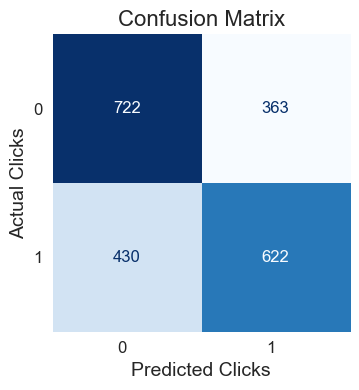



MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.6261682242990654
Confusion Matrix
 [[178  94]
 [106 157]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64       272
           1       0.63      0.60      0.61       263

    accuracy                           0.63       535
   macro avg       0.63      0.63      0.63       535
weighted avg       0.63      0.63      0.63       535



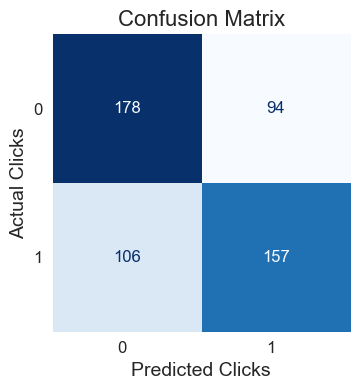

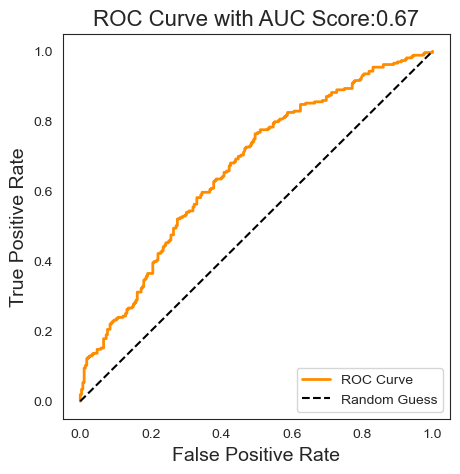

In [547]:
lg_drvif_default = classifier_metrics('LogisticRegression_drvif_default', lg_drvif, X1_train_sc, y1_train, X1_test_sc, y1_test)

In [414]:
lg_drvif_coef = pd.DataFrame(lg_drvif.coef_, columns=X1_test.columns)
lg_drvif_coef

Daily Time Spent on Site  Month_Feb  Month_Jan  Month_Jul  Month_Jun  \
0                  0.088058  -0.209158  -0.199043  -0.334435  -0.334769   

   Month_Mar  Month_May  Hour_bins_Evening  Hour_bins_Morning  \
0  -0.368034  -0.072713          -0.038883           0.011353   

   Hour_bins_Night  Gender_Male  Continent_Antarctica  Continent_Asia  \
0        -0.262671    -0.107993              0.141308        0.063013   

   Continent_Europe  Continent_North America  Continent_Oceania  \
0          0.294763                 0.144604           0.435377   

   Continent_South America  
0                -0.091549

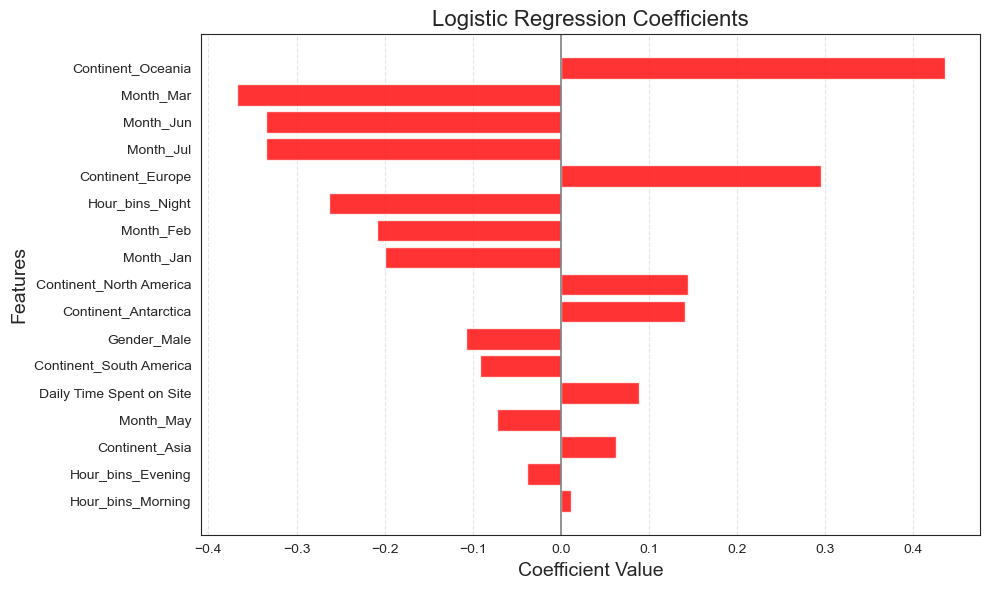

In [415]:
lg_drvif_coef = pd.DataFrame({
    'Feature': X1_test.columns,
    'Coefficient': lg_drvif.coef_[0]
})

lg_drvif_coef['Abs_Coefficient'] = lg_drvif_coef['Coefficient'].abs()
lg_drvif_coef = lg_drvif_coef.sort_values(by='Abs_Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(lg_drvif_coef['Feature'], lg_drvif_coef['Coefficient'], color='r', alpha=0.8)
plt.axvline(0, color='gray', linestyle='-', linewidth=1.2)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Logistic Regression Coefficients', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [416]:
lg_drvif_default

Model  Train Cross-Val(Accuracy Score)  \
0  LogisticRegression_drvif_default                         0.630325   

   Test Accuracy Score  Train Cross-Val(ROC_AUC)  Test ROC_AUC  \
0             0.626168                  0.673368      0.665218   

   Train Cross-Val(F1 Score)  Test F1 Score  
0                   0.615050       0.610895

### ➡️ __`Hyperparameter Tuning`__

In [417]:
start = time.time()

params = [
    {
        'C': [0.1, 0.3, 0.5, 0.75, 1, 2, 5],
        'penalty': ['l2'],
        'class_weight': [None, 'balanced'],
        'solver': ['lbfgs'],
    },
    {
        'C': [0.1, 0.3, 0.5, 0.75, 1, 2, 5],
        'penalty': ['l1', 'l2'],
        'class_weight': [None, 'balanced'],
        'solver': ['liblinear'],
    },
    {
        'C': [0.1, 0.3, 0.5, 0.75, 1, 2, 5],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'l1_ratio': np.linspace(0, 1, 5),
        'class_weight': [None, 'balanced'],
        'solver': ['saga'],
    }
]

lg_drvif = LogisticRegression(random_state=seed, n_jobs=-1)
lg_drvif_grid = GridSearchCV(lg_drvif, params, cv=5, n_jobs=-1)
lg_drvif_grid.fit(X1_train_sc, y1_train)

end = time.time()
no_of_combinations = 0
for i in params:
    grid_combinations = 1
    for key, value in i.items():
        grid_combinations *= len(value) 
    no_of_combinations += grid_combinations


print(f"Time taken by Grid Search over {no_of_combinations} combinations of hyperparameters", end-start)
print('Best Parameters:', lg_drvif_grid.best_params_)
print('Best Cross-Val Accuracy Score:', lg_drvif_grid.best_score_)

Time taken by Grid Search over 252 combinations of hyperparameters 5.008365869522095
Best Parameters: {'C': 0.5, 'class_weight': None, 'l1_ratio': 0.75, 'penalty': 'elasticnet', 'solver': 'saga'}
Best Cross-Val Accuracy Score: 0.6317286436560223


In [418]:
lg_drvif_best = lg_drvif_grid.best_estimator_

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Accuracy Score: 0.6317286436560223
Confusion Matrix
 [[724 361]
 [434 618]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65      1085
           1       0.63      0.59      0.61      1052

    accuracy                           0.63      2137
   macro avg       0.63      0.63      0.63      2137
weighted avg       0.63      0.63      0.63      2137



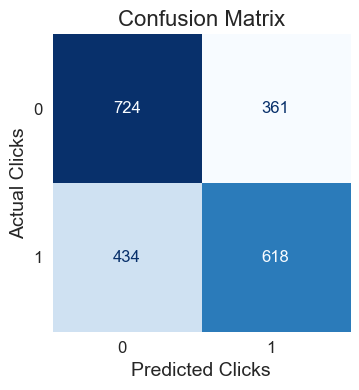



MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.6205607476635514
Confusion Matrix
 [[178  94]
 [109 154]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.65      0.64       272
           1       0.62      0.59      0.60       263

    accuracy                           0.62       535
   macro avg       0.62      0.62      0.62       535
weighted avg       0.62      0.62      0.62       535



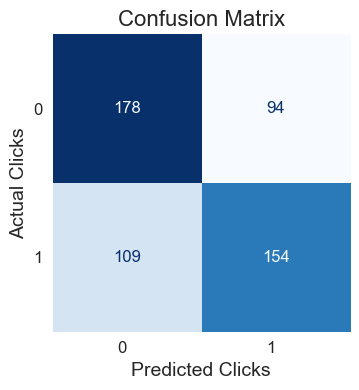

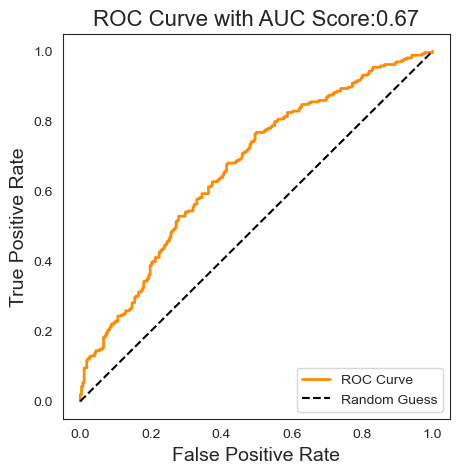

In [419]:
lg_drvif_tuned = classifier_metrics('LogisticRegression_drvif_tuned', lg_drvif_best, X1_train_sc, y1_train, X1_test_sc, y1_test)

In [420]:
lg_drvif_tuned_coef = pd.DataFrame(lg_drvif_best.coef_, columns=X1_test.columns)
lg_drvif_tuned_coef

Daily Time Spent on Site  Month_Feb  Month_Jan  Month_Jul  Month_Jun  \
0                  0.085939  -0.195644  -0.184385  -0.320655  -0.320918   

   Month_Mar  Month_May  Hour_bins_Evening  Hour_bins_Morning  \
0  -0.353968  -0.058893          -0.031784           0.011790   

   Hour_bins_Night  Gender_Male  Continent_Antarctica  Continent_Asia  \
0        -0.257992    -0.102888              0.136128        0.055692   

   Continent_Europe  Continent_North America  Continent_Oceania  \
0          0.286430                 0.137577           0.427253   

   Continent_South America  
0                -0.091364

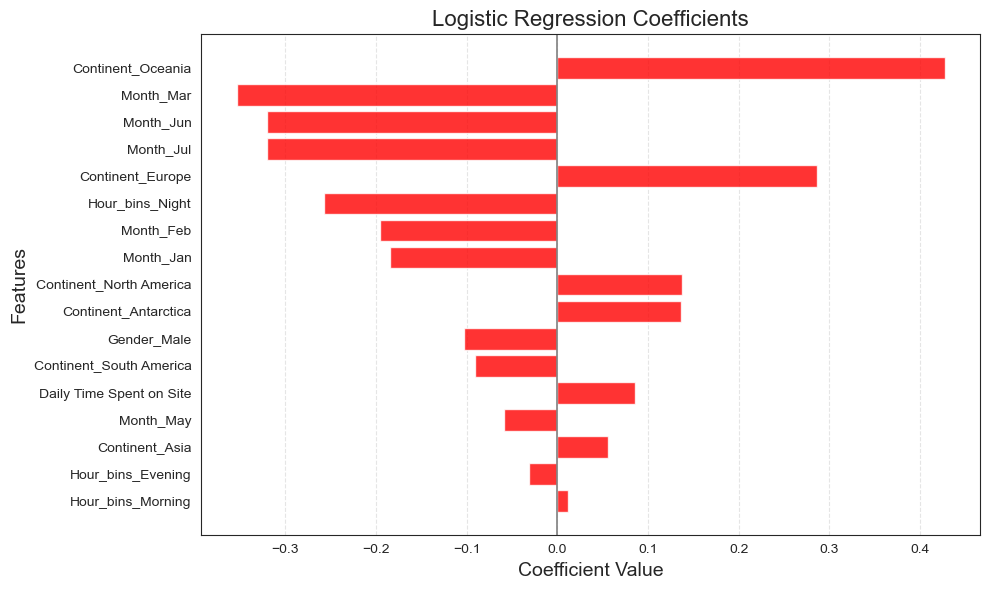

In [421]:
lg_drvif_tuned_coef = pd.DataFrame({
    'Feature': X1_test.columns,
    'Coefficient': lg_drvif_best.coef_[0]
})

lg_drvif_tuned_coef['Abs_Coefficient'] = lg_drvif_tuned_coef['Coefficient'].abs()
lg_drvif_tuned_coef = lg_drvif_tuned_coef.sort_values(by='Abs_Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(lg_drvif_tuned_coef['Feature'], lg_drvif_tuned_coef['Coefficient'], color='r', alpha=0.8)
plt.axvline(0, color='gray', linestyle='-', linewidth=1.2)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Logistic Regression Coefficients', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [422]:
df_results = pd.concat([lg_drvif_default, lg_drvif_tuned], ignore_index=True)
df_results

Model  Train Cross-Val(Accuracy Score)  \
0  LogisticRegression_drvif_default                         0.630325   
1    LogisticRegression_drvif_tuned                         0.631729   

   Test Accuracy Score  Train Cross-Val(ROC_AUC)  Test ROC_AUC  \
0             0.626168                  0.673368      0.665218   
1             0.620561                  0.673509      0.665399   

   Train Cross-Val(F1 Score)  Test F1 Score  
0                   0.615050       0.610895  
1                   0.617407       0.602740

## """ALL COLUMNS"""

In [423]:
lg = LogisticRegression(random_state=seed,n_jobs=-1)
lg.fit(X_train_sc, y_train)

LogisticRegression(n_jobs=-1, random_state=33)

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Accuracy Score: 0.7356157937359102
Confusion Matrix
 [[835 250]
 [302 750]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75      1085
           1       0.75      0.71      0.73      1052

    accuracy                           0.74      2137
   macro avg       0.74      0.74      0.74      2137
weighted avg       0.74      0.74      0.74      2137



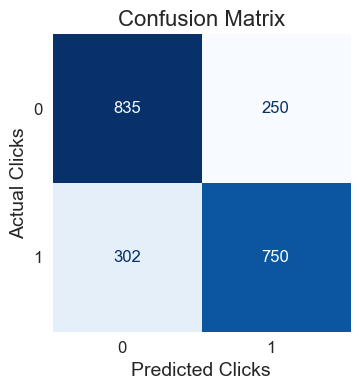



MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.7252336448598131
Confusion Matrix
 [[202  70]
 [ 77 186]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       272
           1       0.73      0.71      0.72       263

    accuracy                           0.73       535
   macro avg       0.73      0.72      0.72       535
weighted avg       0.73      0.73      0.73       535



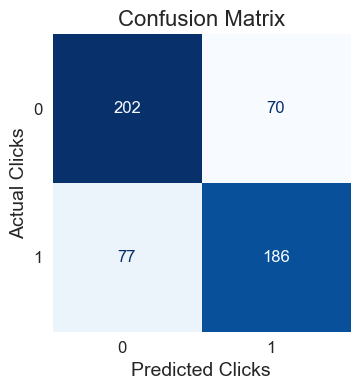

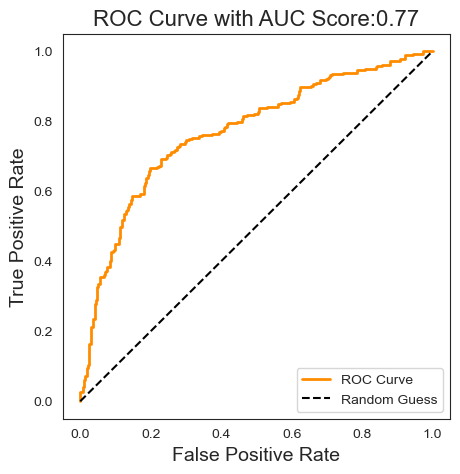

In [424]:
lg_default = classifier_metrics('LogisticRegression_default', lg, X_train_sc, y_train, X_test_sc, y_test)

In [425]:
lg.coef_

array([[ 0.38469392,  1.10510531, -0.09565387, -0.16342496,  0.03363924,
         0.02174755,  0.07573757, -0.46257974, -0.36945263, -0.25123775,
        -0.04864013, -0.16870785, -0.07341644, -0.31668232, -0.1224586 ,
         0.12313264, -0.05710704,  0.21844668,  0.05266086,  0.28187037,
        -0.15537632]])

In [426]:
lg.intercept_

array([0.00444854])

In [427]:
lg_coef = pd.DataFrame(lg.coef_, columns=X_test_sc.columns)
lg_coef

Timestamp_Combined      Age  Area Income  Daily Internet Usage  \
0            0.384694 1.105105    -0.095654             -0.163425   

   Daily Time Spent on Site  Month_Feb  Month_Jan  Month_Jul  Month_Jun  \
0                  0.033639   0.021748   0.075738  -0.462580  -0.369453   

   Month_Mar  ...  Hour_bins_Evening  Hour_bins_Morning  Hour_bins_Night  \
0  -0.251238  ...          -0.168708          -0.073416        -0.316682   

   Gender_Male  Continent_Antarctica  Continent_Asia  Continent_Europe  \
0    -0.122459              0.123133       -0.057107          0.218447   

   Continent_North America  Continent_Oceania  Continent_South America  
0                 0.052661           0.281870                -0.155376  

[1 rows x 21 columns]

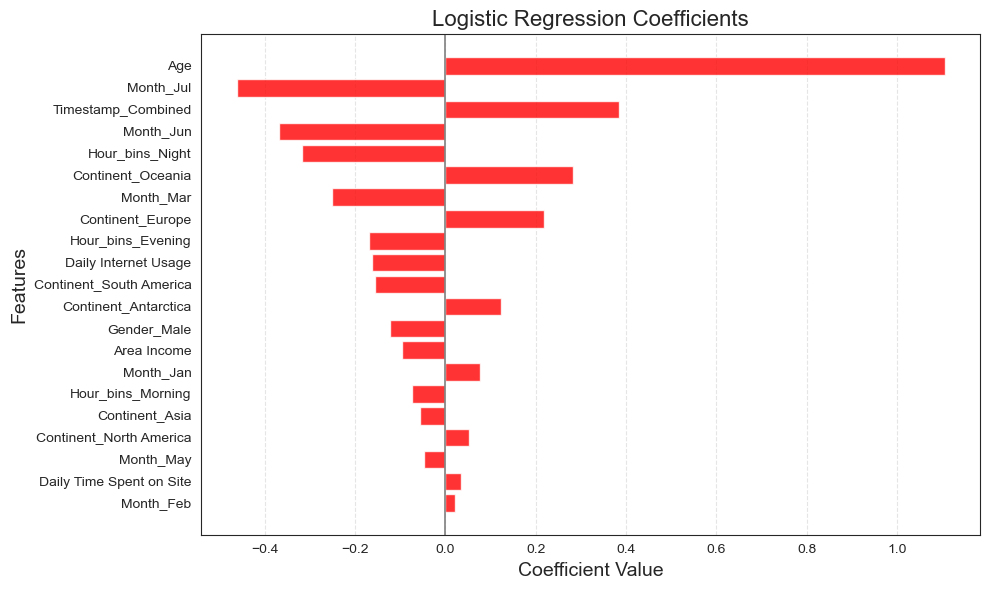

In [428]:
lg_coef = pd.DataFrame({
    'Feature': X_test_sc.columns,
    'Coefficient': lg.coef_[0]
})

lg_coef['Abs_Coefficient'] = lg_coef['Coefficient'].abs()
lg_coef = lg_coef.sort_values(by='Abs_Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(lg_coef['Feature'], lg_coef['Coefficient'], color='r', alpha=0.8)
plt.axvline(0, color='gray', linestyle='-', linewidth=1.2)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Logistic Regression Coefficients', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [429]:
df_results = pd.concat([lg_drvif_default, lg_drvif_tuned, lg_default], ignore_index=True)
df_results

Model  Train Cross-Val(Accuracy Score)  \
0  LogisticRegression_drvif_default                         0.630325   
1    LogisticRegression_drvif_tuned                         0.631729   
2        LogisticRegression_default                         0.735616   

   Test Accuracy Score  Train Cross-Val(ROC_AUC)  Test ROC_AUC  \
0             0.626168                  0.673368      0.665218   
1             0.620561                  0.673509      0.665399   
2             0.725234                  0.801229      0.771038   

   Train Cross-Val(F1 Score)  Test F1 Score  
0                   0.615050       0.610895  
1                   0.617407       0.602740  
2                   0.723807       0.716763

### ➡️ __`Hyperparameter Tuning`__

In [430]:
start = time.time()

params = [
    {
        'C': [0.1, 0.3, 0.5, 0.75, 1, 2, 5],
        'penalty': ['l2'],
        'class_weight': [None, 'balanced'],
        'solver': ['lbfgs'],
    },
    {
        'C': [0.1, 0.3, 0.5, 0.75, 1, 2, 5],
        'penalty': ['l1', 'l2'],
        'class_weight': [None, 'balanced'],
        'solver': ['liblinear'],
    },
    {
        'C': [0.1, 0.3, 0.5, 0.75, 1, 2, 5],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'l1_ratio': np.linspace(0, 1, 5),
        'class_weight': [None, 'balanced'],
        'solver': ['saga'],
    }
]

lg = LogisticRegression(random_state=seed, n_jobs=-1)
lg_grid = GridSearchCV(lg, params, cv=5, n_jobs=-1)
lg_grid.fit(X_train_sc, y_train)

end = time.time()
no_of_combinations = 0
for i in params:
    grid_combinations = 1
    for key, value in i.items():
        grid_combinations *= len(value) 
    no_of_combinations += grid_combinations


print(f"Time taken by Grid Search over {no_of_combinations} combinations of hyperparameters", end-start)
print('Best Parameters:', lg_grid.best_params_)
print('Best Cross-Val Accuracy Score:', lg_grid.best_score_)

Time taken by Grid Search over 252 combinations of hyperparameters 10.467272996902466
Best Parameters: {'C': 0.3, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Val Accuracy Score: 0.7388922935498698


In [431]:
lg_best = lg_grid.best_estimator_

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Accuracy Score: 0.7388922935498698
Confusion Matrix
 [[842 243]
 [302 750]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76      1085
           1       0.76      0.71      0.73      1052

    accuracy                           0.74      2137
   macro avg       0.75      0.74      0.74      2137
weighted avg       0.75      0.74      0.74      2137



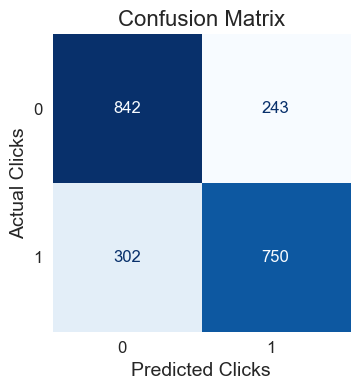



MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.7271028037383177
Confusion Matrix
 [[202  70]
 [ 76 187]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73       272
           1       0.73      0.71      0.72       263

    accuracy                           0.73       535
   macro avg       0.73      0.73      0.73       535
weighted avg       0.73      0.73      0.73       535



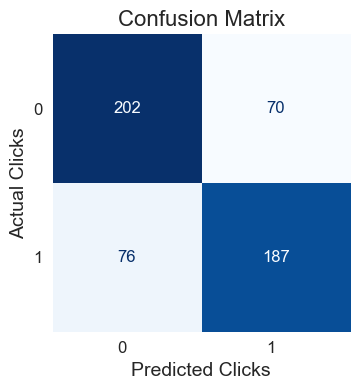

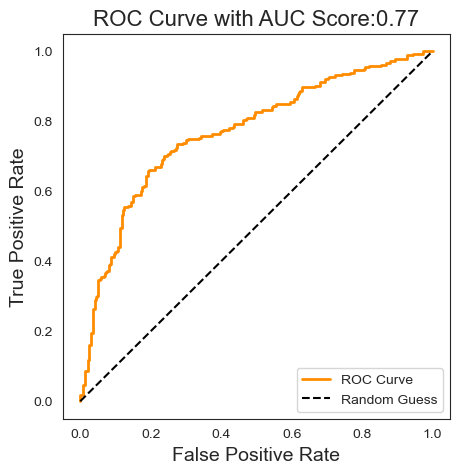

In [432]:
lg_tuned = classifier_metrics('LogisticRegression_tuned', lg_best, X_train_sc, y_train, X_test_sc, y_test)

In [433]:
lg_best_coef = pd.DataFrame(lg_best.coef_, columns=X_test_sc.columns)
lg_best_coef

Timestamp_Combined      Age  Area Income  Daily Internet Usage  \
0            0.000000 1.094429    -0.088051             -0.155597   

   Daily Time Spent on Site  Month_Feb  Month_Jan  Month_Jul  Month_Jun  \
0                  0.025866  -0.074701  -0.109297  -0.244332  -0.204950   

   Month_Mar  ...  Hour_bins_Evening  Hour_bins_Morning  Hour_bins_Night  \
0  -0.285802  ...          -0.135458          -0.048277        -0.292005   

   Gender_Male  Continent_Antarctica  Continent_Asia  Continent_Europe  \
0    -0.109293              0.112693       -0.051737          0.208194   

   Continent_North America  Continent_Oceania  Continent_South America  
0                 0.044628           0.268215                -0.147432  

[1 rows x 21 columns]

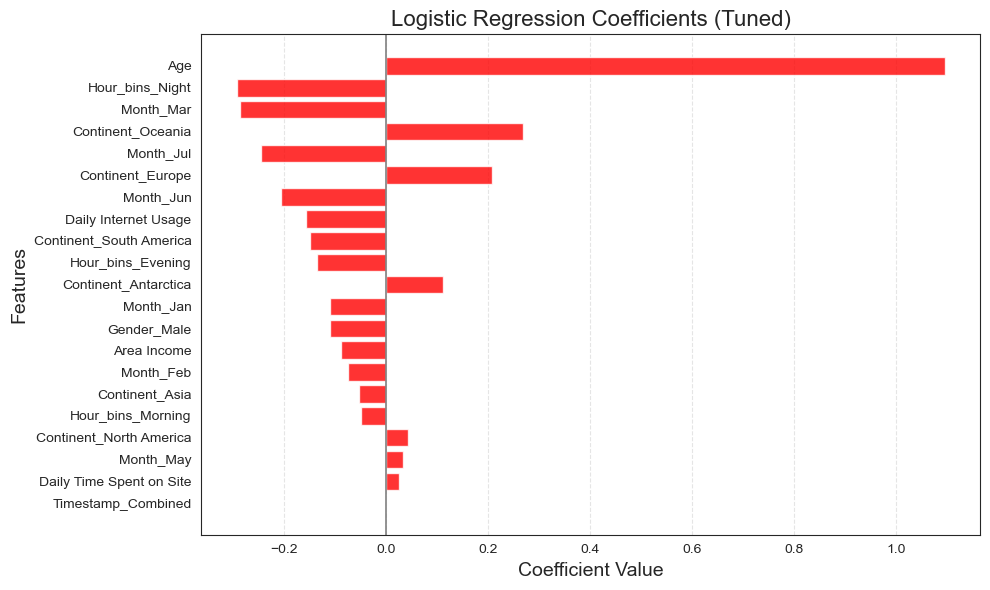

In [434]:
lg_best_coef = pd.DataFrame({
    'Feature': X_test_sc.columns,
    'Coefficient': lg_best.coef_[0]
})

lg_best_coef['Abs_Coefficient'] = lg_best_coef['Coefficient'].abs()
lg_best_coef = lg_best_coef.sort_values(by='Abs_Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(lg_best_coef['Feature'], lg_best_coef['Coefficient'], color='r', alpha=0.8)
plt.axvline(0, color='gray', linestyle='-', linewidth=1.2)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Logistic Regression Coefficients (Tuned)', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [600]:
df_results = pd.concat([lg_drvif_default, lg_drvif_tuned, lg_default, lg_tuned], ignore_index=True)
df_results

Model  Train Cross-Val(Accuracy Score)  \
0  LogisticRegression_drvif_default                         0.630325   
1    LogisticRegression_drvif_tuned                         0.631729   
2        LogisticRegression_default                         0.735616   
3          LogisticRegression_tuned                         0.738892   

   Test Accuracy Score  Train Cross-Val(ROC_AUC)  Test ROC_AUC  \
0             0.626168                  0.673368      0.665218   
1             0.620561                  0.673509      0.665399   
2             0.725234                  0.801229      0.771038   
3             0.727103                  0.801315      0.769515   

   Train Cross-Val(F1 Score)  Test F1 Score  
0                   0.615050       0.610895  
1                   0.617407       0.602740  
2                   0.723807       0.716763  
3                   0.727031       0.719231

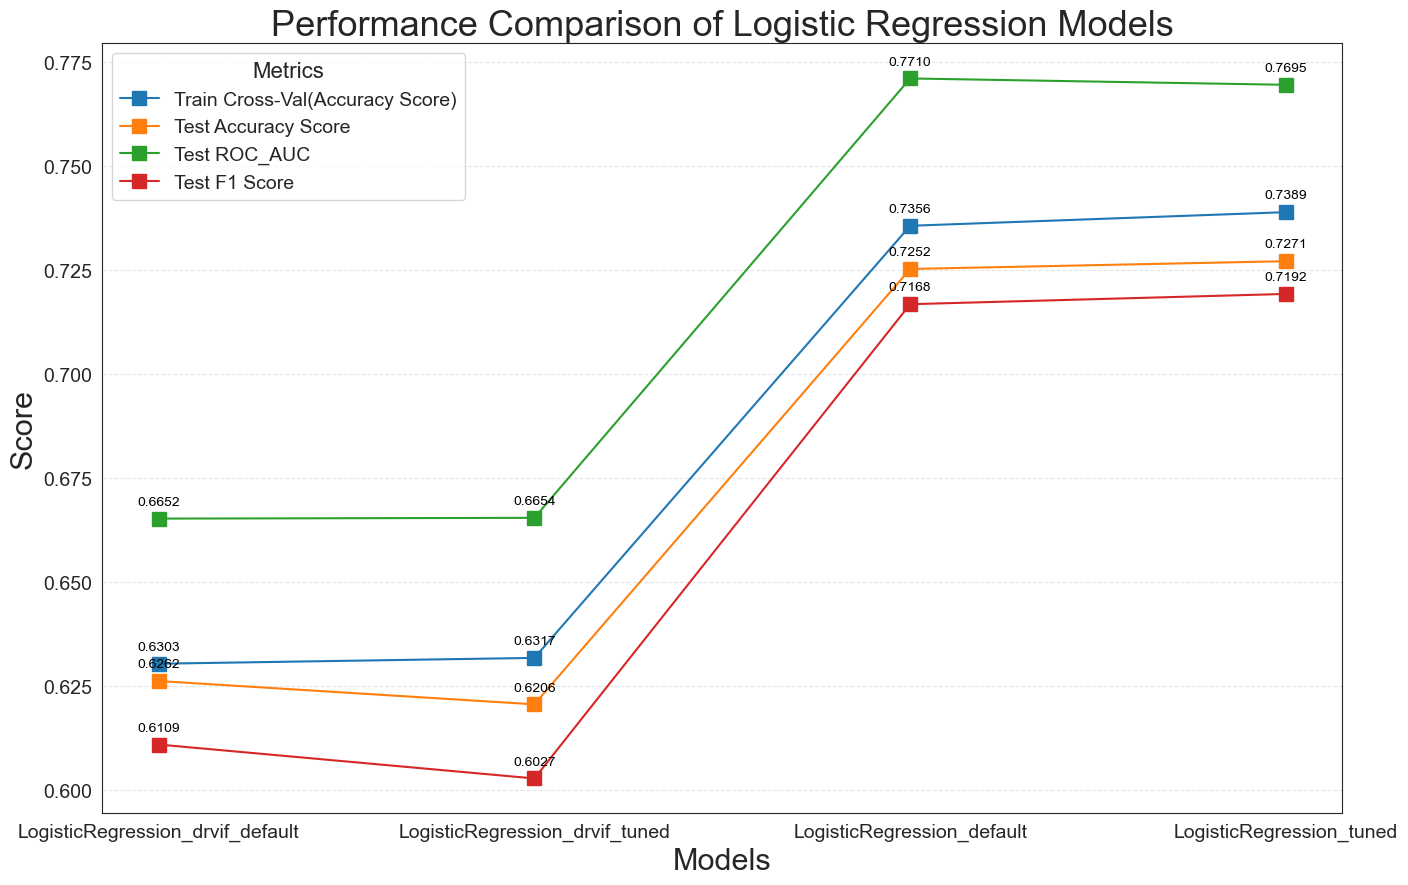

In [609]:
metrics = ['Train Cross-Val(Accuracy Score)', 'Test Accuracy Score', 'Test ROC_AUC', 'Test F1 Score']
models = df_results['Model']

fig, ax = plt.subplots(figsize=(16, 10))

for metric in metrics:
    y_values = df_results[metric]
    ax.plot(models, y_values, marker='s', markersize=10, linestyle='-', label=metric)
    
    for i, value in enumerate(y_values):
        ax.text(models[i], value+0.004, f'{value:.4f}', fontsize=10, color='black', ha='center', va='center')

ax.set_title("Performance Comparison of Logistic Regression Models", fontsize=26)
ax.set_xlabel("Models", fontsize=22)
ax.set_ylabel("Score", fontsize=22)
ax.legend(title="Metrics", title_fontsize=16, loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.set_style("white")
plt.show()

## Save Logistic Regression Model (Baseline Model)

In [552]:
with open('Logistic.pkl', 'wb') as file:
    pickle.dump(lg_drvif, file)

In [558]:
with open('Logistic.pkl', 'rb') as file:
    lg_model = pickle.load(file)

In [559]:
lg_model.predict(X1_test_sc)

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Accuracy Score: 0.6303245857865132
Confusion Matrix
 [[722 363]
 [430 622]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65      1085
           1       0.63      0.59      0.61      1052

    accuracy                           0.63      2137
   macro avg       0.63      0.63      0.63      2137
weighted avg       0.63      0.63      0.63      2137



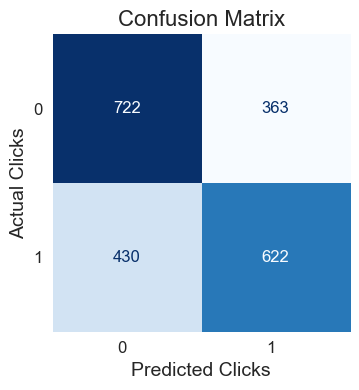



MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.6261682242990654
Confusion Matrix
 [[178  94]
 [106 157]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64       272
           1       0.63      0.60      0.61       263

    accuracy                           0.63       535
   macro avg       0.63      0.63      0.63       535
weighted avg       0.63      0.63      0.63       535



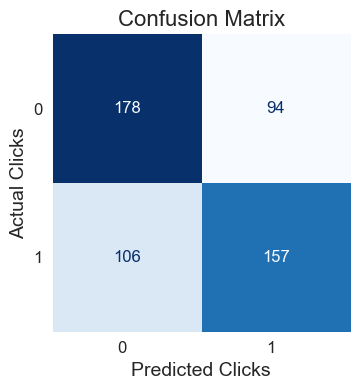

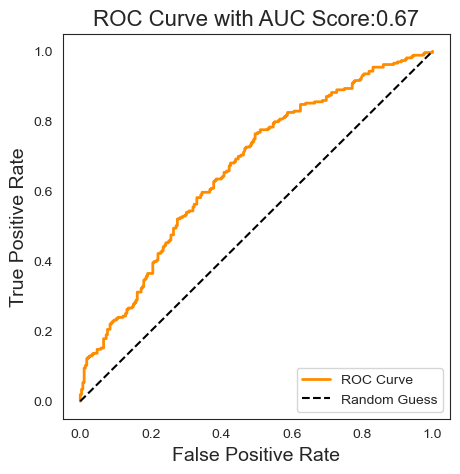

In [560]:
lg_result = classifier_metrics('LogisticRegression', lg_model, X1_train_sc, y1_train, X1_test_sc, y1_test)

## 🔴 Decision Tree

#### `For better interpretation, it is advised to use non-scaled data.`

### ➡️ __`Default Parameter`__

In [497]:
dtc = DecisionTreeClassifier(max_depth=3,random_state=seed)
dtc.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=3, random_state=33)

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Accuracy Score: 0.7150265928341615
Confusion Matrix
 [[914 171]
 [406 646]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.84      0.76      1085
           1       0.79      0.61      0.69      1052

    accuracy                           0.73      2137
   macro avg       0.74      0.73      0.73      2137
weighted avg       0.74      0.73      0.73      2137



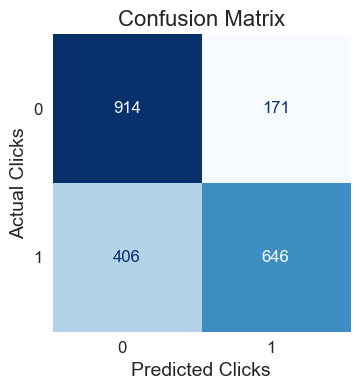



MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.697196261682243
Confusion Matrix
 [[214  58]
 [104 159]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.79      0.73       272
           1       0.73      0.60      0.66       263

    accuracy                           0.70       535
   macro avg       0.70      0.70      0.69       535
weighted avg       0.70      0.70      0.69       535



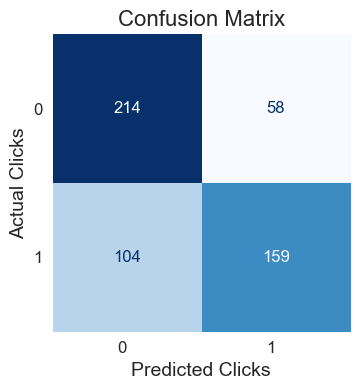

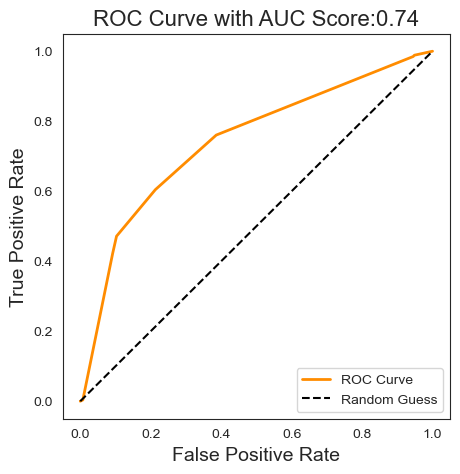

In [498]:
dtc_default = classifier_metrics('DecisionTree_default', dtc, X_train_sc, y_train, X_test_sc, y_test)

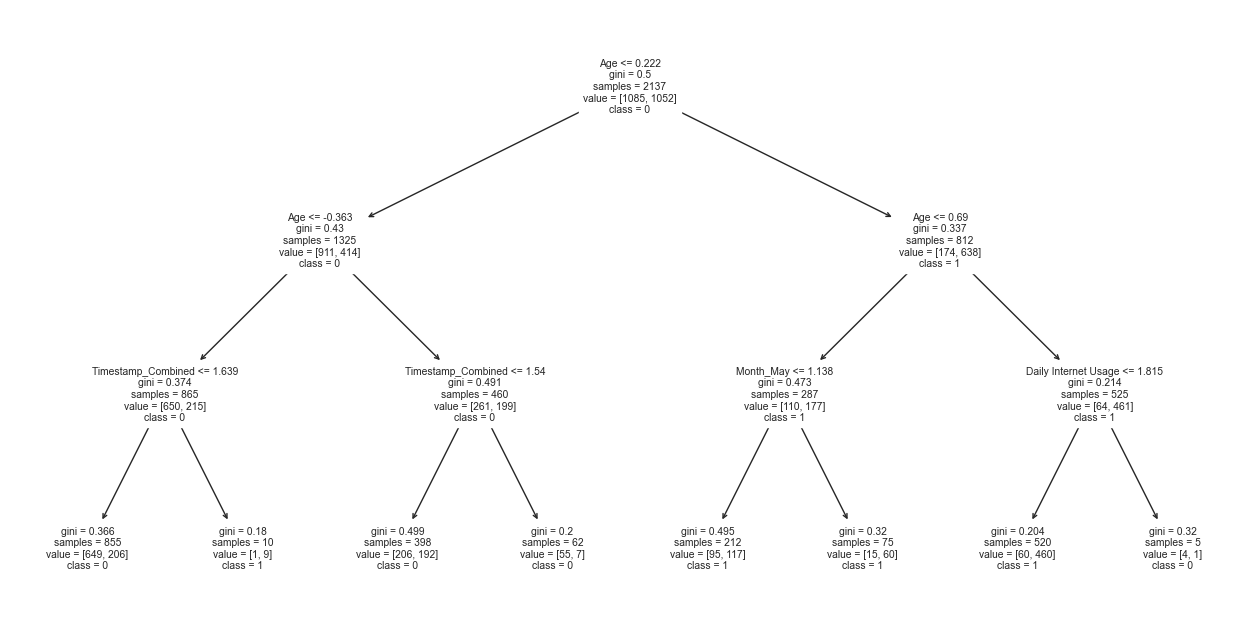

In [499]:
plt.figure(figsize=(16, 8))
plot_tree(dtc, feature_names=X_train_sc.columns, class_names=y_train.unique().astype(str))

plt.show()

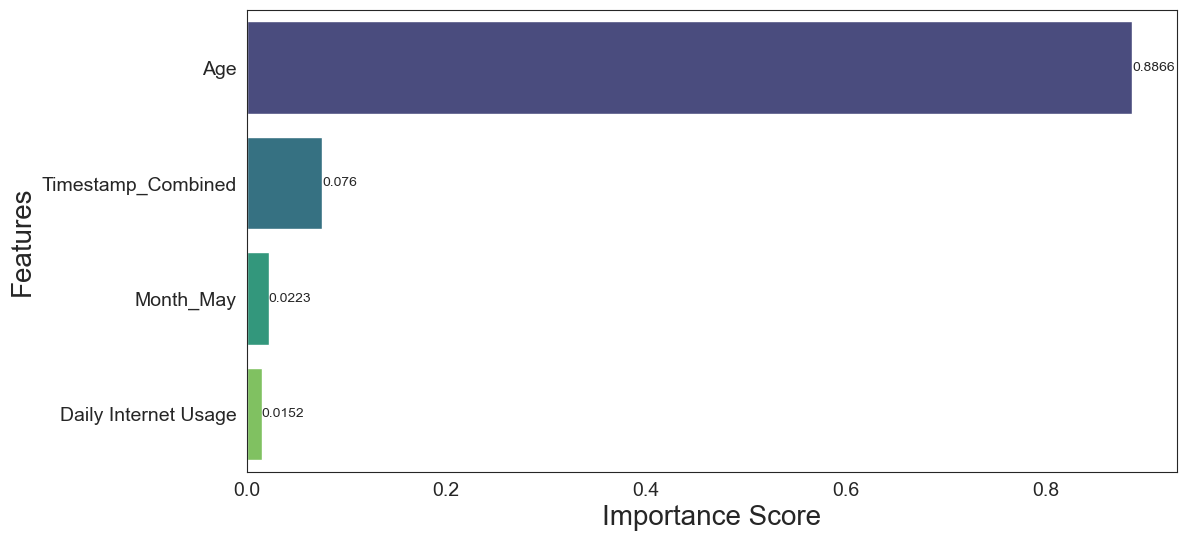

In [500]:
feature_importances = pd.DataFrame({'Features': X_train_sc.columns, "Importance Score": dtc.feature_importances_})
feature_importances['Importance Score'] = feature_importances['Importance Score'].round(4)
feature_importances.sort_values("Importance Score", ascending=False, inplace=True)
feature_importances.set_index("Features", inplace=True)

filtered_features = feature_importances[feature_importances['Importance Score']>0]

plt.figure(figsize=(12,6))
ax = sns.barplot(data=filtered_features, x='Importance Score', y='Features', hue='Features', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)

plt.xlabel('Importance Score', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.show()

In [501]:
df_results = pd.concat([lg_drvif_default, lg_drvif_tuned, lg_default, lg_tuned, dtc_default], ignore_index=True)
df_results

Model  Train Cross-Val(Accuracy Score)  \
0  LogisticRegression_drvif_default                         0.630325   
1    LogisticRegression_drvif_tuned                         0.631729   
2        LogisticRegression_default                         0.735616   
3          LogisticRegression_tuned                         0.738892   
4              DecisionTree_default                         0.715027   

   Test Accuracy Score  Train Cross-Val(ROC_AUC)  Test ROC_AUC  \
0             0.626168                  0.673368      0.665218   
1             0.620561                  0.673509      0.665399   
2             0.725234                  0.801229      0.771038   
3             0.727103                  0.801315      0.769515   
4             0.697196                  0.775662      0.742668   

   Train Cross-Val(F1 Score)  Test F1 Score  
0                   0.615050       0.610895  
1                   0.617407       0.602740  
2                   0.723807       0.716763  
3                   0.727031       0.719231  
4                   0.688912       0.662500

### ➡️ __`Hyperparameter Tuning`__

Best Test Score--> 0.7532710280373832
Best Test Max_Depth 8
Best Train Cross-Val Score--> 0.7412429687670994
Best Train Max_Depth--> 13


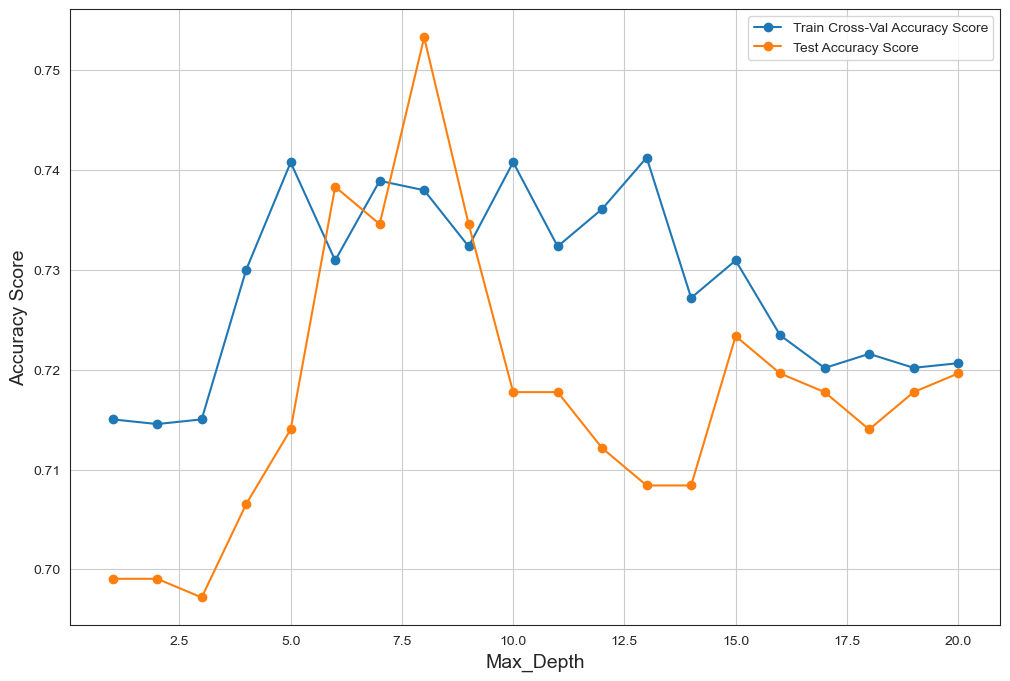

In [502]:
max_depth_range = range(1,21)
train_scores = []
test_scores = []

for i in max_depth_range:
    dtc = DecisionTreeClassifier(max_depth=i, random_state=seed)
    dtc.fit(X_train_sc, y_train)
    y_train_pred = dtc.predict(X_train_sc)
    y_test_pred = dtc.predict(X_test_sc)

    #train set
    train_score = cross_val_score(dtc, X_train_sc, y_train, cv=5).mean()
    train_scores.append(train_score)

    #test set
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

print("Best Test Score-->", max(test_scores))
print("Best Test Max_Depth", np.array(test_scores).argmax()+1)
print("Best Train Cross-Val Score-->", max(train_scores))
print("Best Train Max_Depth-->", np.array(train_scores).argmax()+1)

plt.figure(figsize=(12,8))
plt.plot(max_depth_range, train_scores, 'o-', label='Train Cross-Val Accuracy Score')
plt.plot(max_depth_range, test_scores, 'o-', label='Test Accuracy Score')
plt.xlabel('Max_Depth', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [503]:
start=time.time()

params = {
                'max_depth': list(range(5,15)),
                'min_samples_split': [2, 3, 5, 7, 10],
                'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                'criterion': ['gini', 'entropy']
}

dtc = DecisionTreeClassifier(random_state=seed)
dtc_grid = GridSearchCV(dtc, params, cv=5, n_jobs=-1)
dtc_grid.fit(X_train_sc, y_train)

end = time.time()
no_of_combinations = 1
for key, value in params.items():
    no_of_combinations *= len(value)


print(f"Time taken by Grid Search over {no_of_combinations} combinations of hyperparameters", end-start)
print('Best Parameters:', dtc_grid.best_params_)
print('Best Cross-Val Accuracy Score:', dtc_grid.best_score_)

Time taken by Grid Search over 600 combinations of hyperparameters 6.098311424255371
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Val Accuracy Score: 0.7515320974413973


In [504]:
dtc_best = dtc_grid.best_estimator_

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Accuracy Score: 0.7515320974413973
Confusion Matrix
 [[885 200]
 [301 751]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78      1085
           1       0.79      0.71      0.75      1052

    accuracy                           0.77      2137
   macro avg       0.77      0.76      0.76      2137
weighted avg       0.77      0.77      0.76      2137



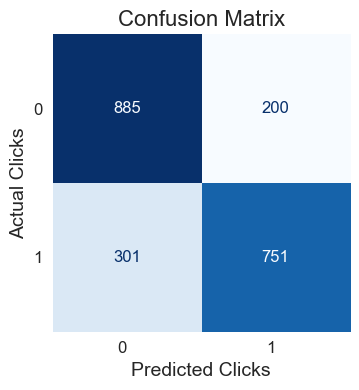



MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.7140186915887851
Confusion Matrix
 [[203  69]
 [ 84 179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       272
           1       0.72      0.68      0.70       263

    accuracy                           0.71       535
   macro avg       0.71      0.71      0.71       535
weighted avg       0.71      0.71      0.71       535



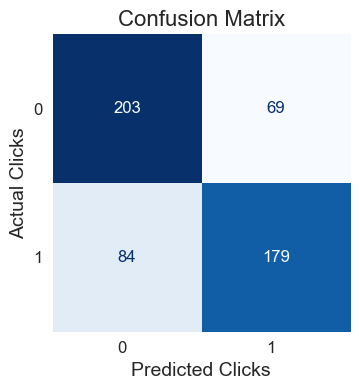

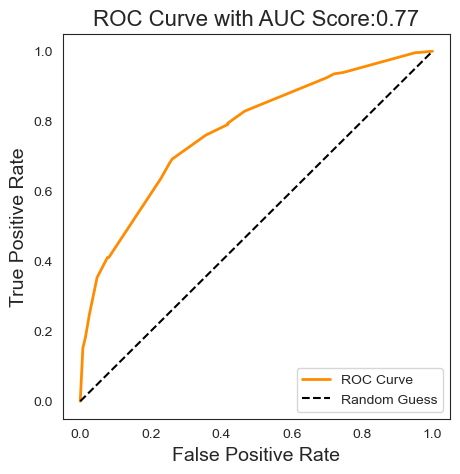

In [505]:
dtc_tuned = classifier_metrics('DecisionTree_tuned', dtc_best, X_train_sc, y_train, X_test_sc, y_test)

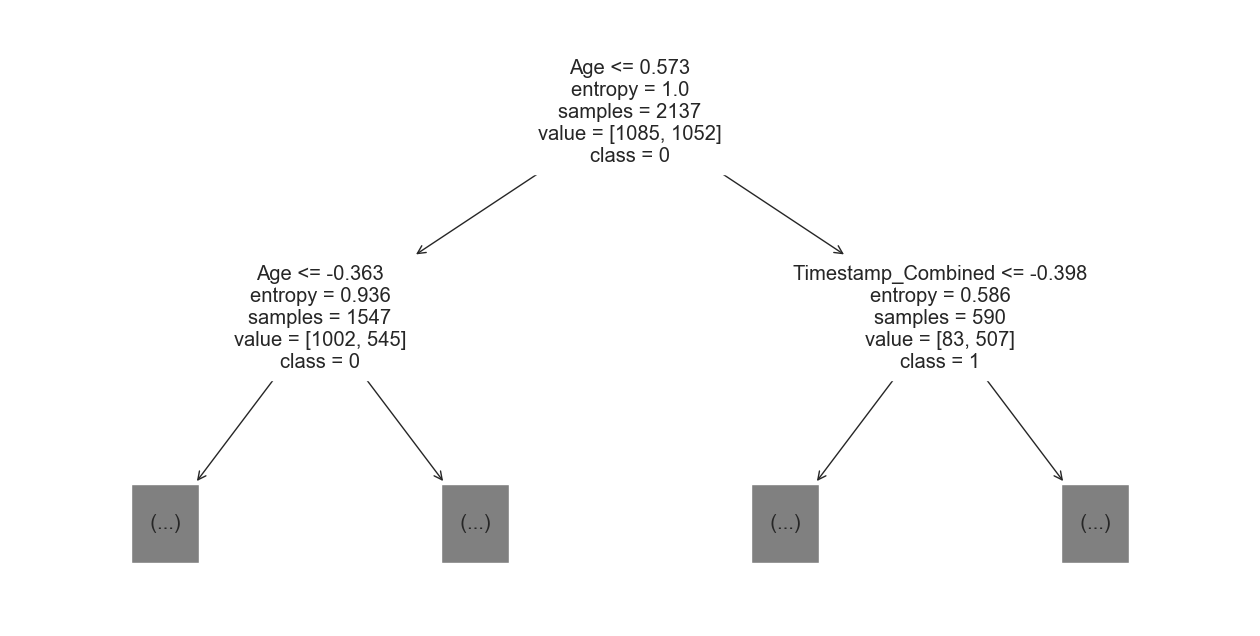

In [506]:
plt.figure(figsize=(16, 8))
plot_tree(dtc_best, feature_names=X_train_sc.columns, class_names=y_train.unique().astype(str), max_depth=1) 

plt.show()

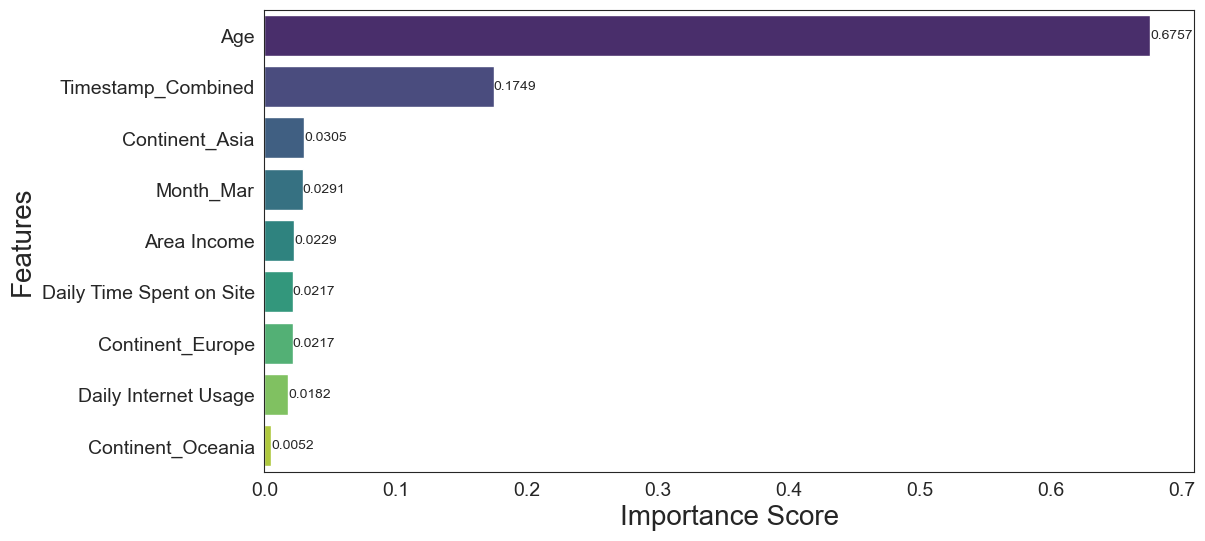

In [507]:
feature_importances = pd.DataFrame({'Features': X_train_sc.columns, "Importance Score": dtc_best.feature_importances_})
feature_importances['Importance Score'] = feature_importances['Importance Score'].round(4)
feature_importances.sort_values("Importance Score", ascending=False, inplace=True)
feature_importances.set_index("Features", inplace=True)

filtered_features = feature_importances[feature_importances['Importance Score']>0]

plt.figure(figsize=(12,6))
ax = sns.barplot(data=filtered_features, x='Importance Score', y='Features', hue='Features', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)

plt.xlabel('Importance Score', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.show()

In [508]:
df_results = pd.concat([lg_drvif_default, lg_drvif_tuned, lg_default, lg_tuned, dtc_default, dtc_tuned], ignore_index=True)
df_results

Model  Train Cross-Val(Accuracy Score)  \
0  LogisticRegression_drvif_default                         0.630325   
1    LogisticRegression_drvif_tuned                         0.631729   
2        LogisticRegression_default                         0.735616   
3          LogisticRegression_tuned                         0.738892   
4              DecisionTree_default                         0.715027   
5                DecisionTree_tuned                         0.751532   

   Test Accuracy Score  Train Cross-Val(ROC_AUC)  Test ROC_AUC  \
0             0.626168                  0.673368      0.665218   
1             0.620561                  0.673509      0.665399   
2             0.725234                  0.801229      0.771038   
3             0.727103                  0.801315      0.769515   
4             0.697196                  0.775662      0.742668   
5             0.714019                  0.800933      0.773631   

   Train Cross-Val(F1 Score)  Test F1 Score  
0                   0.615050       0.610895  
1                   0.617407       0.602740  
2                   0.723807       0.716763  
3                   0.727031       0.719231  
4                   0.688912       0.662500  
5                   0.734099       0.700587

## ''''''Non-Scaled Data''''''

### ➡️ __`Default Parameter`__

In [509]:
dtc = DecisionTreeClassifier(max_depth=3,random_state=seed)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=33)

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Accuracy Score: 0.7117511873755171
Confusion Matrix
 [[910 175]
 [404 648]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.84      0.76      1085
           1       0.79      0.62      0.69      1052

    accuracy                           0.73      2137
   macro avg       0.74      0.73      0.72      2137
weighted avg       0.74      0.73      0.73      2137



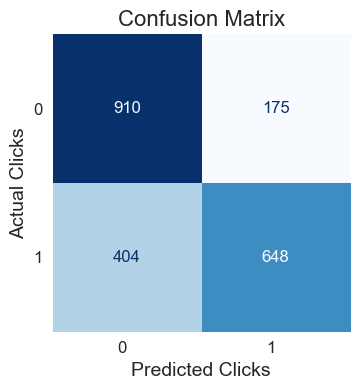



MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.6897196261682244
Confusion Matrix
 [[209  63]
 [103 160]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       272
           1       0.72      0.61      0.66       263

    accuracy                           0.69       535
   macro avg       0.69      0.69      0.69       535
weighted avg       0.69      0.69      0.69       535



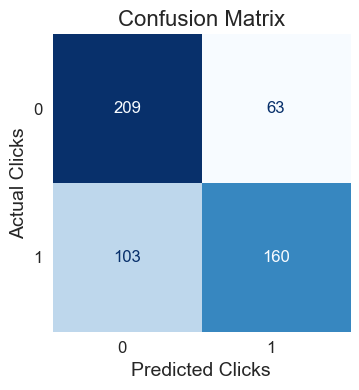

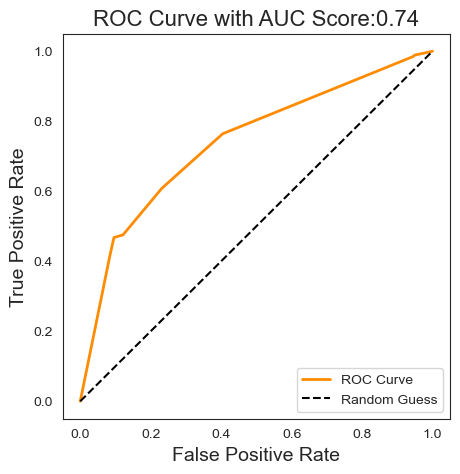

In [510]:
dtc_nosc_default = classifier_metrics('DecisionTree_nosc_default', dtc, X_train, y_train, X_test, y_test)

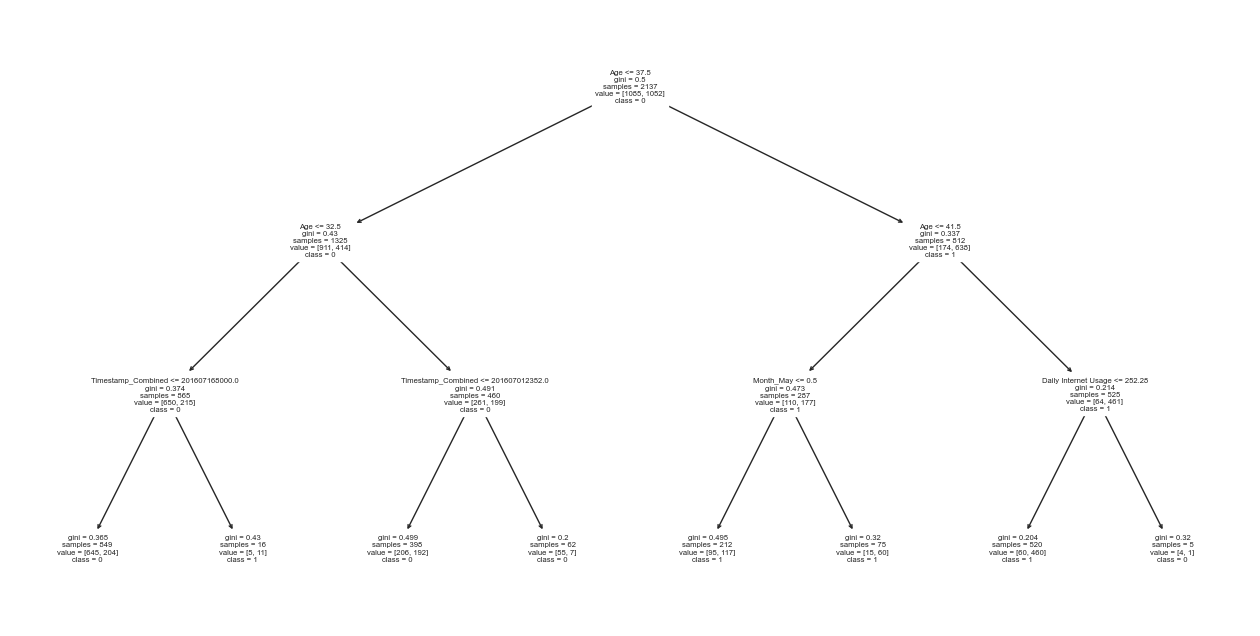

In [511]:
plt.figure(figsize=(16, 8))
plot_tree(dtc, feature_names=X_train.columns, class_names=y_train.unique().astype(str))

plt.show()

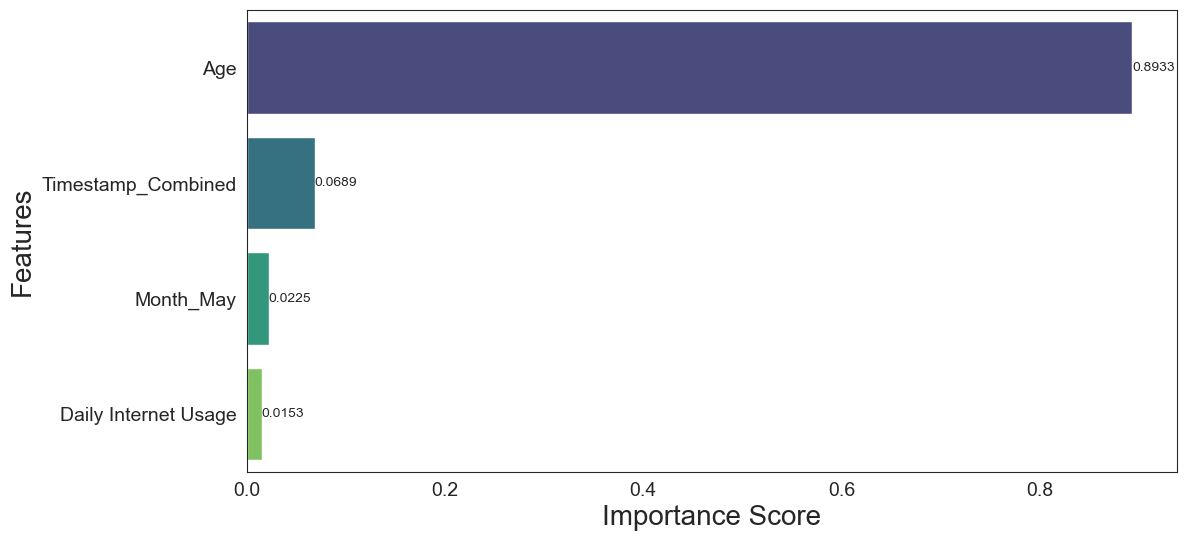

In [512]:
feature_importances = pd.DataFrame({'Features': X_train.columns, "Importance Score": dtc.feature_importances_})
feature_importances['Importance Score'] = feature_importances['Importance Score'].round(4)
feature_importances.sort_values("Importance Score", ascending=False, inplace=True)
feature_importances.set_index("Features", inplace=True)

filtered_features = feature_importances[feature_importances['Importance Score']>0]

plt.figure(figsize=(12,6))
ax = sns.barplot(data=filtered_features, x='Importance Score', y='Features', hue='Features', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)

plt.xlabel('Importance Score', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.show()

In [513]:
df_results = pd.concat([lg_drvif_default, lg_drvif_tuned, lg_default, lg_tuned, dtc_default, dtc_tuned, dtc_nosc_default], ignore_index=True)
df_results

Model  Train Cross-Val(Accuracy Score)  \
0  LogisticRegression_drvif_default                         0.630325   
1    LogisticRegression_drvif_tuned                         0.631729   
2        LogisticRegression_default                         0.735616   
3          LogisticRegression_tuned                         0.738892   
4              DecisionTree_default                         0.715027   
5                DecisionTree_tuned                         0.751532   
6         DecisionTree_nosc_default                         0.711751   

   Test Accuracy Score  Train Cross-Val(ROC_AUC)  Test ROC_AUC  \
0             0.626168                  0.673368      0.665218   
1             0.620561                  0.673509      0.665399   
2             0.725234                  0.801229      0.771038   
3             0.727103                  0.801315      0.769515   
4             0.697196                  0.775662      0.742668   
5             0.714019                  0.800933      0.773631   
6             0.689720                  0.772482      0.740487   

   Train Cross-Val(F1 Score)  Test F1 Score  
0                   0.615050       0.610895  
1                   0.617407       0.602740  
2                   0.723807       0.716763  
3                   0.727031       0.719231  
4                   0.688912       0.662500  
5                   0.734099       0.700587  
6                   0.683956       0.658436

### ➡️ __`Hyperparameter Tuning`__

In [514]:
start=time.time()

params = {
                'max_depth': list(range(5,15)),
                'min_samples_split': [2, 3, 5, 7, 10],
                'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                'criterion': ['gini', 'entropy']
}

dtc = DecisionTreeClassifier(random_state=seed)
dtc_grid = GridSearchCV(dtc, params, cv=5, n_jobs=-1)
dtc_grid.fit(X_train, y_train)

end = time.time()
no_of_combinations = 1
for key, value in params.items():
    no_of_combinations *= len(value)


print(f"Time taken by Grid Search over {no_of_combinations} combinations of hyperparameters", end-start)
print('Best Parameters:', dtc_grid.best_params_)
print('Best Cross-Val Accuracy Score:', dtc_grid.best_score_)

Time taken by Grid Search over 600 combinations of hyperparameters 5.858450174331665
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Cross-Val Accuracy Score: 0.7529372496662216


In [515]:
dtc_best = dtc_grid.best_estimator_

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Accuracy Score: 0.7529372496662216
Confusion Matrix
 [[942 143]
 [265 787]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82      1085
           1       0.85      0.75      0.79      1052

    accuracy                           0.81      2137
   macro avg       0.81      0.81      0.81      2137
weighted avg       0.81      0.81      0.81      2137



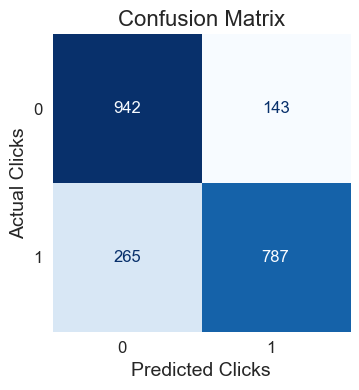



MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.7420560747663552
Confusion Matrix
 [[213  59]
 [ 79 184]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.76       272
           1       0.76      0.70      0.73       263

    accuracy                           0.74       535
   macro avg       0.74      0.74      0.74       535
weighted avg       0.74      0.74      0.74       535



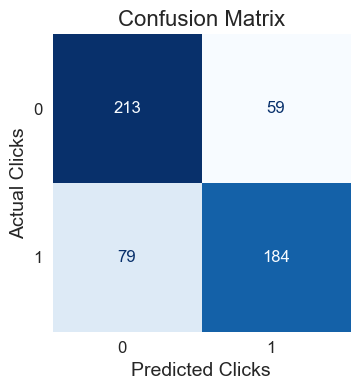

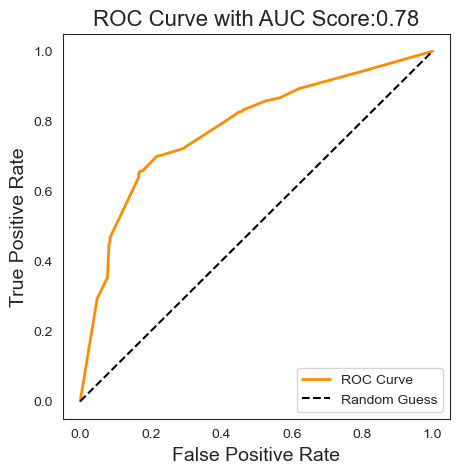

In [516]:
dtc_nosc_tuned = classifier_metrics('DecisionTree_nosc_tuned', dtc_best, X_train, y_train, X_test, y_test)

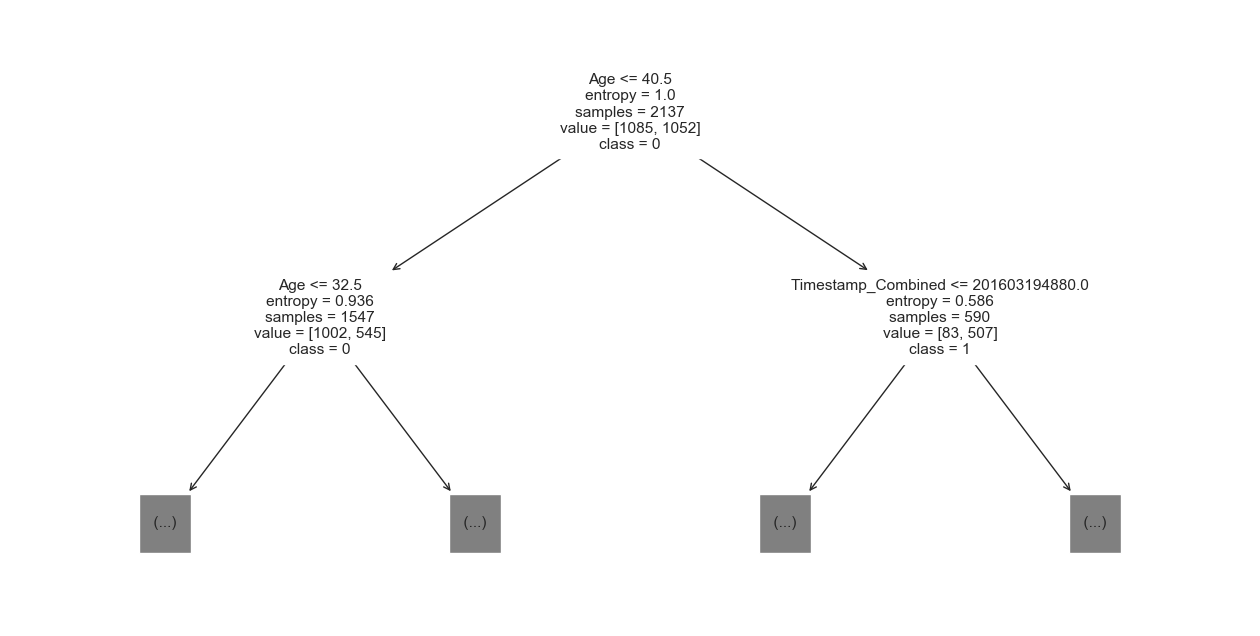

In [517]:
plt.figure(figsize=(16, 8))
plot_tree(dtc_best, feature_names=X_train.columns, class_names=y_train.unique().astype(str), max_depth=1) 

plt.show()

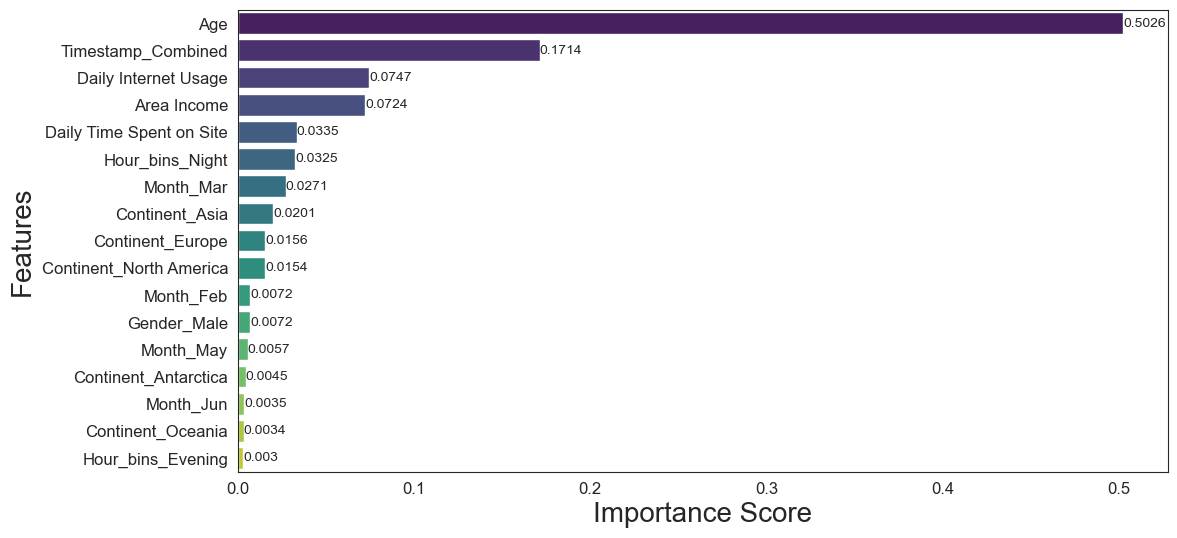

In [518]:
feature_importances = pd.DataFrame({'Features': X_train.columns, "Importance Score": dtc_best.feature_importances_})
feature_importances['Importance Score'] = feature_importances['Importance Score'].round(4)
feature_importances.sort_values("Importance Score", ascending=False, inplace=True)
feature_importances.set_index("Features", inplace=True)

filtered_features = feature_importances[feature_importances['Importance Score']>0]

plt.figure(figsize=(12,6))
ax = sns.barplot(data=filtered_features, x='Importance Score', y='Features', hue='Features', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)

plt.xlabel('Importance Score', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()

In [519]:
df_results = pd.concat([lg_drvif_default, lg_drvif_tuned, lg_default, lg_tuned, 
                        dtc_default, dtc_tuned, dtc_nosc_default, dtc_nosc_tuned], ignore_index=True)
df_results

Model  Train Cross-Val(Accuracy Score)  \
0  LogisticRegression_drvif_default                         0.630325   
1    LogisticRegression_drvif_tuned                         0.631729   
2        LogisticRegression_default                         0.735616   
3          LogisticRegression_tuned                         0.738892   
4              DecisionTree_default                         0.715027   
5                DecisionTree_tuned                         0.751532   
6         DecisionTree_nosc_default                         0.711751   
7           DecisionTree_nosc_tuned                         0.752937   

   Test Accuracy Score  Train Cross-Val(ROC_AUC)  Test ROC_AUC  \
0             0.626168                  0.673368      0.665218   
1             0.620561                  0.673509      0.665399   
2             0.725234                  0.801229      0.771038   
3             0.727103                  0.801315      0.769515   
4             0.697196                  0.775662      0.742668   
5             0.714019                  0.800933      0.773631   
6             0.689720                  0.772482      0.740487   
7             0.742056                  0.800080      0.780097   

   Train Cross-Val(F1 Score)  Test F1 Score  
0                   0.615050       0.610895  
1                   0.617407       0.602740  
2                   0.723807       0.716763  
3                   0.727031       0.719231  
4                   0.688912       0.662500  
5                   0.734099       0.700587  
6                   0.683956       0.658436  
7                   0.740189       0.727273

## 🔴 Random Forest

## ''''''Non-Scaled Data''''''

### ➡️ __`Default Parameter`__

In [520]:
rfc = RandomForestClassifier(random_state=seed,n_jobs=-1)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=33)

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Accuracy Score: 0.7964531944231654
Confusion Matrix
 [[1085    0]
 [   3 1049]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1085
           1       1.00      1.00      1.00      1052

    accuracy                           1.00      2137
   macro avg       1.00      1.00      1.00      2137
weighted avg       1.00      1.00      1.00      2137



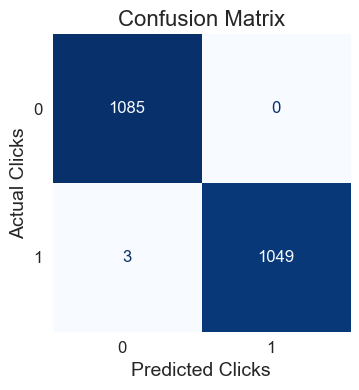



MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.7570093457943925
Confusion Matrix
 [[209  63]
 [ 67 196]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76       272
           1       0.76      0.75      0.75       263

    accuracy                           0.76       535
   macro avg       0.76      0.76      0.76       535
weighted avg       0.76      0.76      0.76       535



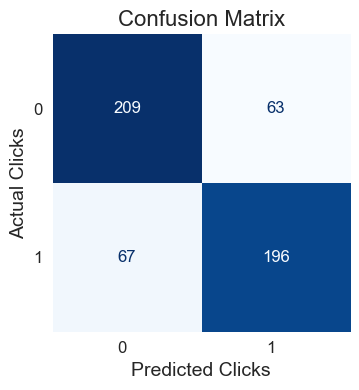

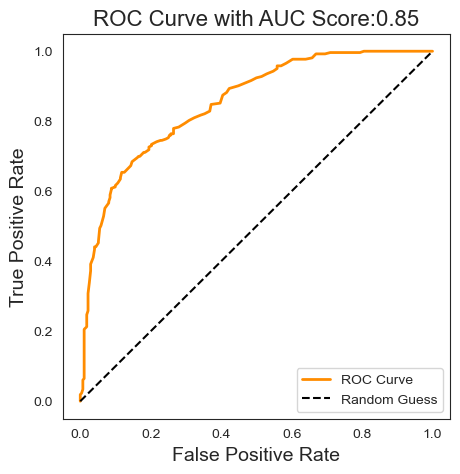

In [521]:
rfc_nosc_default = classifier_metrics('RandomForest_nosc_default', rfc, X_train, y_train, X_test, y_test)

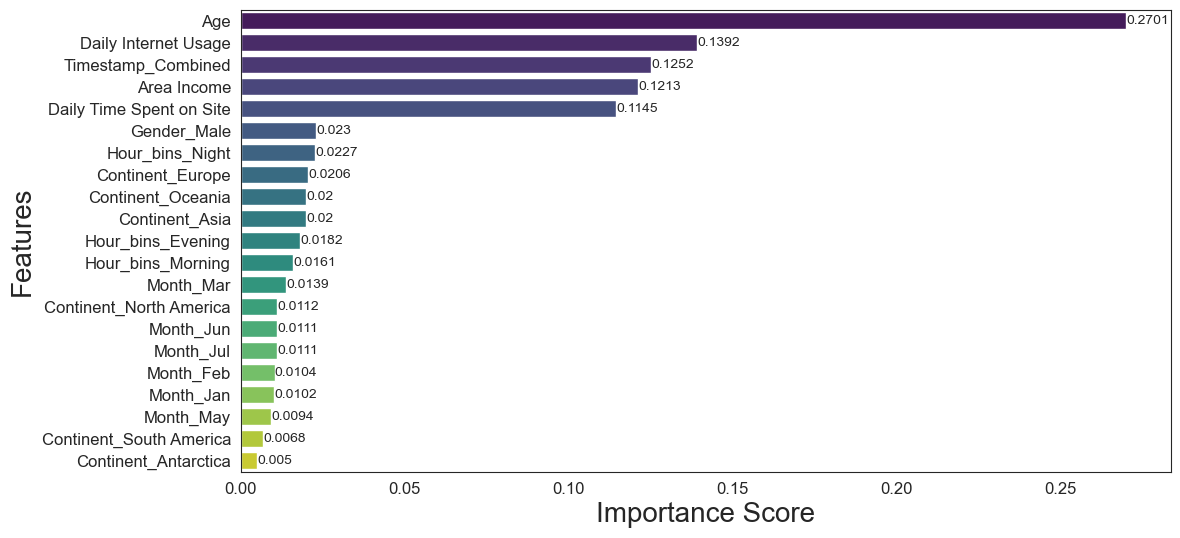

In [522]:
feature_importances = pd.DataFrame({'Features': X_train.columns, "Importance Score": rfc.feature_importances_})
feature_importances['Importance Score'] = feature_importances['Importance Score'].round(4)
feature_importances.sort_values("Importance Score", ascending=False, inplace=True)
feature_importances.set_index("Features", inplace=True)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=feature_importances, x='Importance Score', y='Features', hue='Features', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)

plt.xlabel('Importance Score', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()

In [523]:
df_results = pd.concat([lg_drvif_default, lg_drvif_tuned, lg_default, lg_tuned, 
                        dtc_default, dtc_tuned, dtc_nosc_default, dtc_nosc_tuned,
                        rfc_nosc_default], ignore_index=True)
df_results

Model  Train Cross-Val(Accuracy Score)  \
0  LogisticRegression_drvif_default                         0.630325   
1    LogisticRegression_drvif_tuned                         0.631729   
2        LogisticRegression_default                         0.735616   
3          LogisticRegression_tuned                         0.738892   
4              DecisionTree_default                         0.715027   
5                DecisionTree_tuned                         0.751532   
6         DecisionTree_nosc_default                         0.711751   
7           DecisionTree_nosc_tuned                         0.752937   
8         RandomForest_nosc_default                         0.796453   

   Test Accuracy Score  Train Cross-Val(ROC_AUC)  Test ROC_AUC  \
0             0.626168                  0.673368      0.665218   
1             0.620561                  0.673509      0.665399   
2             0.725234                  0.801229      0.771038   
3             0.727103                  0.801315      0.769515   
4             0.697196                  0.775662      0.742668   
5             0.714019                  0.800933      0.773631   
6             0.689720                  0.772482      0.740487   
7             0.742056                  0.800080      0.780097   
8             0.757009                  0.875372      0.851061   

   Train Cross-Val(F1 Score)  Test F1 Score  
0                   0.615050       0.610895  
1                   0.617407       0.602740  
2                   0.723807       0.716763  
3                   0.727031       0.719231  
4                   0.688912       0.662500  
5                   0.734099       0.700587  
6                   0.683956       0.658436  
7                   0.740189       0.727273  
8                   0.789449       0.750958

### ➡️ __`Hyperparameter Tuning`__

### -->__`n_estimators`__

Best Train Cross-Val Accuracy Score--> 0.8058164985007332
Best Train 'n_estimators'--> 400
Best Test Accuracy Score--> 0.7700934579439253
Best Test 'n_estimators'--> 40


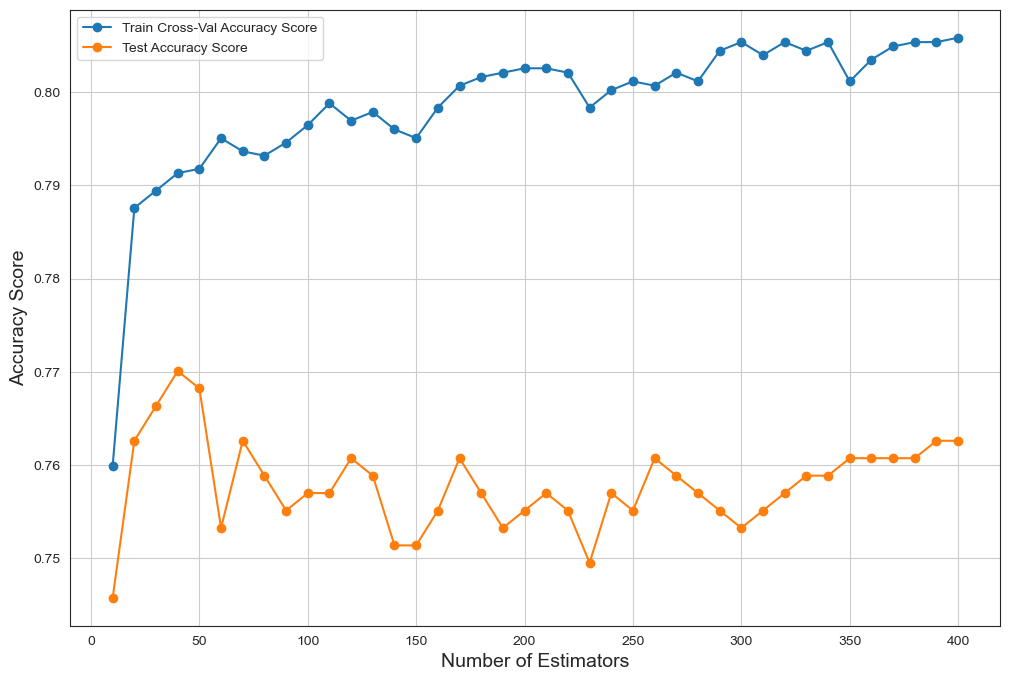

In [524]:
n_estimators_range = range(10, 401, 10)
train_scores = []
test_scores = []

for i in n_estimators_range:
    rfc = RandomForestClassifier(n_estimators=i, random_state=seed, n_jobs=-1)
    rfc.fit(X_train, y_train)
    y_train_pred = rfc.predict(X_train)
    y_test_pred = rfc.predict(X_test)

    #train set
    train_score = cross_val_score(rfc, X_train, y_train, cv=5).mean()
    train_scores.append(train_score)

    #test set
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)


print("Best Train Cross-Val Accuracy Score-->", max(train_scores))
print("Best Train 'n_estimators'-->", (np.array(train_scores).argmax()*10+10))
print("Best Test Accuracy Score-->", max(test_scores))
print("Best Test 'n_estimators'-->", (np.array(test_scores).argmax()*10+10))

plt.figure(figsize=(12,8))
plt.plot(n_estimators_range, train_scores, 'o-', label='Train Cross-Val Accuracy Score')
plt.plot(n_estimators_range, test_scores, 'o-', label='Test Accuracy Score')
plt.xlabel('Number of Estimators', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### From the graph, the range for `n_estimators` can be explored between 40 and 170.

### -->__`max_depth`__

Best Train Cross-Val Accuracy Score--> 0.8015955700496837
Best Train Max_Depth--> 13
Best Test Accuracy Score--> 0.7794392523364486
Best Test Max_Depth 17


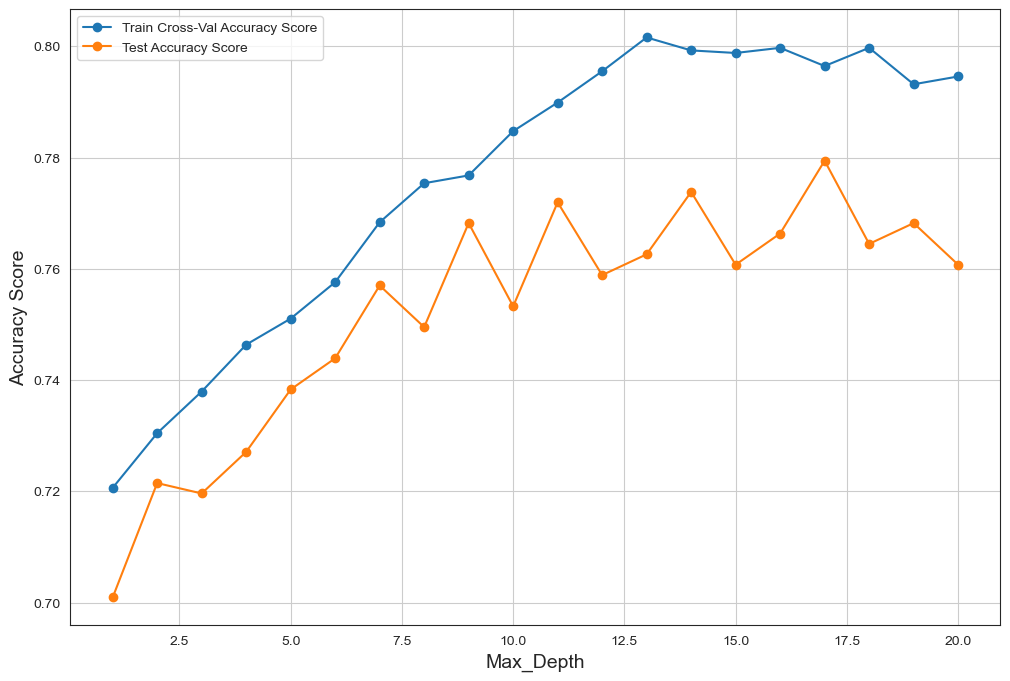

In [525]:
max_depth_range = range(1,21)
train_scores = []
test_scores = []

for i in max_depth_range:
    rfc = RandomForestClassifier(max_depth=i, random_state=seed, n_jobs=-1)
    rfc.fit(X_train, y_train)
    y_train_pred = rfc.predict(X_train)
    y_test_pred = rfc.predict(X_test)

    #train set
    train_score = cross_val_score(rfc, X_train, y_train, cv=5).mean()
    train_scores.append(train_score)

    #test set
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

print("Best Train Cross-Val Accuracy Score-->", max(train_scores))
print("Best Train Max_Depth-->", np.array(train_scores).argmax()+1)
print("Best Test Accuracy Score-->", max(test_scores))
print("Best Test Max_Depth", np.array(test_scores).argmax()+1)


plt.figure(figsize=(12,8))
plt.plot(max_depth_range, train_scores, 'o-', label='Train Cross-Val Accuracy Score')
plt.plot(max_depth_range, test_scores, 'o-', label='Test Accuracy Score')
plt.xlabel('Max_Depth', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### From the graph, the range for `max_depth` could be further investigated between 13 and 18.

## -->__`max_features`__

Best Train Cross-Val Accuracy Score--> 0.8016021361815755
Best Train Max_Features--> 0.7000000000000001
Best Test Accuracy Score--> 0.7850467289719626
Best Test Max_Features 0.5


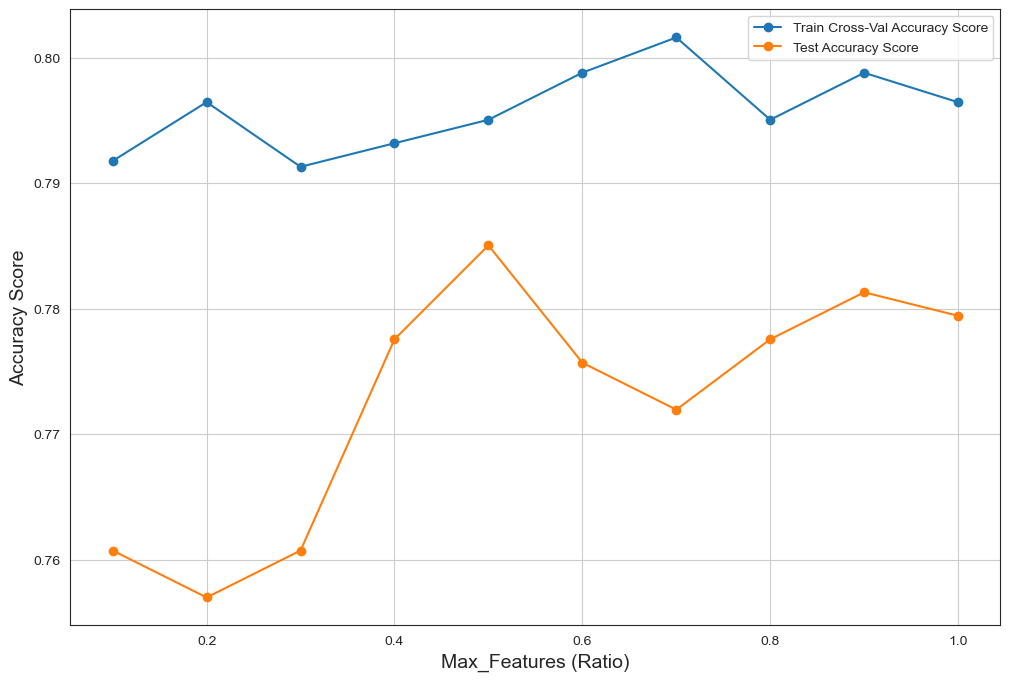

In [526]:
max_features_range = np.linspace(0.1,1,10)
train_scores = []
test_scores = []

for i in max_features_range:
    rfc = RandomForestClassifier(max_features=i, random_state=seed, n_jobs=-1)
    rfc.fit(X_train, y_train)
    y_train_pred = rfc.predict(X_train)
    y_test_pred = rfc.predict(X_test)

    #train set
    train_score = cross_val_score(rfc, X_train, y_train, cv=5).mean()
    train_scores.append(train_score)

    #test set
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)


print("Best Train Cross-Val Accuracy Score-->", max(train_scores))
print("Best Train Max_Features-->", (np.array(train_scores).argmax()*0.1+0.1))
print("Best Test Accuracy Score-->", max(test_scores))
print("Best Test Max_Features", (np.array(test_scores).argmax()*0.1+0.1))


plt.figure(figsize=(12,8))
plt.plot(max_features_range, train_scores, 'o-', label='Train Cross-Val Accuracy Score')
plt.plot(max_features_range, test_scores, 'o-', label='Test Accuracy Score')
plt.xlabel('Max_Features (Ratio)', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### From the graph, the range for `max_features` can be further explored between 0.5 and 0.9.

In [532]:
start = time.time()

params = {
            'n_estimators': list(range(40,180,10)),
            'max_depth': [13,14,17],
            'max_features': [0.5,0.7,0.9,1],
            "min_samples_split": [2,3,5,8],
            'criterion':['gini','entropy']
}

rfc = RandomForestClassifier(random_state=seed, n_jobs=-1)
rfc_grid = GridSearchCV(rfc, params, cv=5, n_jobs=-1)
rfc_grid.fit(X_train, y_train)

end = time.time()
no_of_combinations = 1
for key, value in params.items():
    no_of_combinations *= len(value)

print(f"Time taken by Grid Search over {no_of_combinations} combinations of hyperparameters", end-start)
print('Best Parameters:', rfc_grid.best_params_)
print('Best Cross-Validation Accuracy Score:', rfc_grid.best_score_)

Time taken by Grid Search over 1344 combinations of hyperparameters 680.5556457042694
Best Parameters: {'criterion': 'gini', 'max_depth': 17, 'max_features': 0.7, 'min_samples_split': 2, 'n_estimators': 120}
Best Cross-Validation Accuracy Score: 0.8067445118080938


In [533]:
rfc_best = rfc_grid.best_estimator_

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Accuracy Score: 0.8067445118080938
Confusion Matrix
 [[1083    2]
 [   2 1050]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1085
           1       1.00      1.00      1.00      1052

    accuracy                           1.00      2137
   macro avg       1.00      1.00      1.00      2137
weighted avg       1.00      1.00      1.00      2137



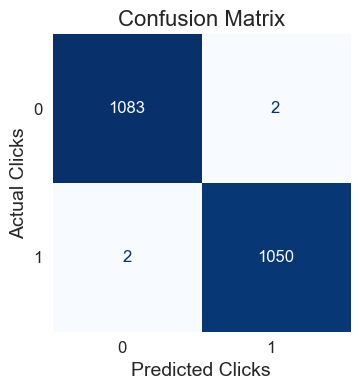



MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.7757009345794392
Confusion Matrix
 [[216  56]
 [ 64 199]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       272
           1       0.78      0.76      0.77       263

    accuracy                           0.78       535
   macro avg       0.78      0.78      0.78       535
weighted avg       0.78      0.78      0.78       535



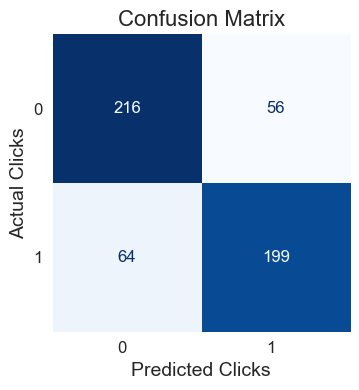

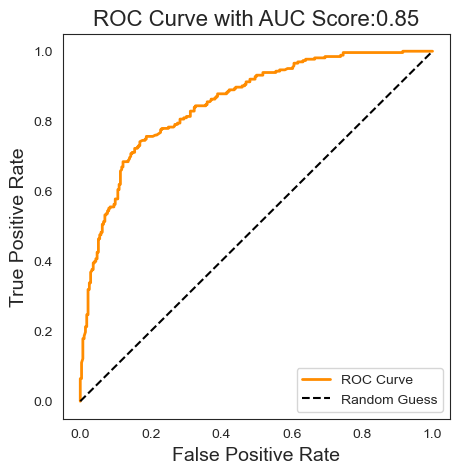

In [681]:
rfc_nosc_tuned = classifier_metrics('RandomForest_nosc_tuned', rfc_best, X_train, y_train, X_test, y_test)

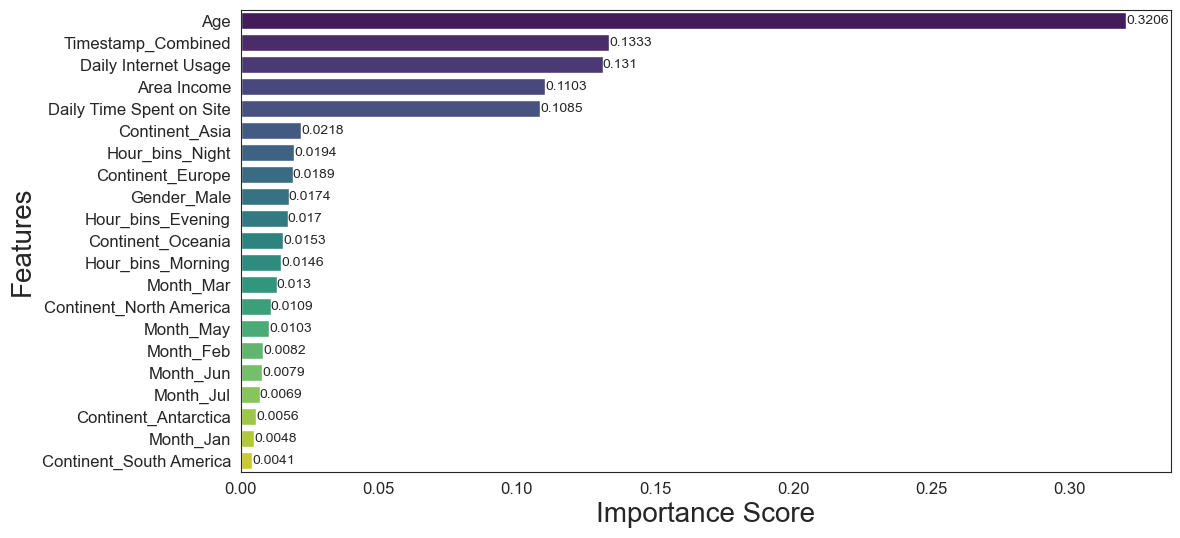

In [682]:
feature_importances = pd.DataFrame({'Features': X_train.columns, "Importance Score": rfc_best.feature_importances_})
feature_importances['Importance Score'] = feature_importances['Importance Score'].round(4)
feature_importances.sort_values("Importance Score", ascending=False, inplace=True)
feature_importances.set_index("Features", inplace=True)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=feature_importances, x='Importance Score', y='Features', hue='Features', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)

plt.xlabel('Importance Score', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()

## SHAP VALUES

In [683]:
explainer = shap.Explainer(rfc_best.predict, X_train)
shap_values = explainer(X_train)

PermutationExplainer explainer: 2138it [32:26,  1.09it/s]                                                              


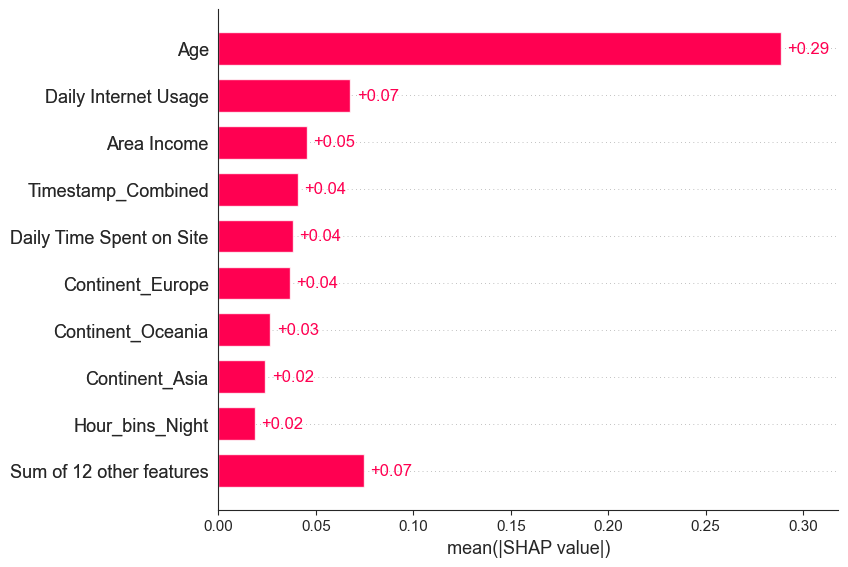

In [684]:
shap.plots.bar(shap_values)

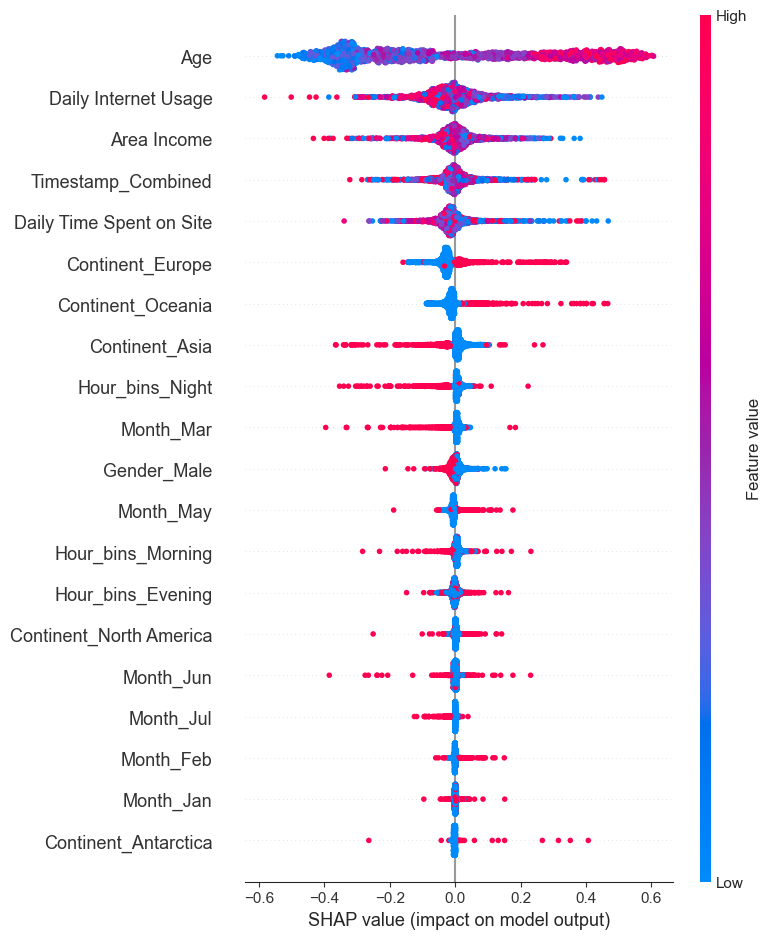

In [685]:
shap.summary_plot(shap_values)

### Higher "Age" values (red) positively impact the prediction, increasing the likelihood of clicking on the ad.
### Lower "Age" values (blue) negatively impact the prediction, decreasing the likelihood of clicking on the ad.

In [531]:
df_results = pd.concat([lg_drvif_default, lg_drvif_tuned, lg_default, lg_tuned, 
                        dtc_default, dtc_tuned, dtc_nosc_default, dtc_nosc_tuned,
                        rfc_nosc_default, rfc_nosc_tuned], ignore_index=True)
df_results

Model  Train Cross-Val(Accuracy Score)  \
0  LogisticRegression_drvif_default                         0.630325   
1    LogisticRegression_drvif_tuned                         0.631729   
2        LogisticRegression_default                         0.735616   
3          LogisticRegression_tuned                         0.738892   
4              DecisionTree_default                         0.715027   
5                DecisionTree_tuned                         0.751532   
6         DecisionTree_nosc_default                         0.711751   
7           DecisionTree_nosc_tuned                         0.752937   
8         RandomForest_nosc_default                         0.796453   
9           RandomForest_nosc_tuned                         0.806745   

   Test Accuracy Score  Train Cross-Val(ROC_AUC)  Test ROC_AUC  \
0             0.626168                  0.673368      0.665218   
1             0.620561                  0.673509      0.665399   
2             0.725234                  0.801229      0.771038   
3             0.727103                  0.801315      0.769515   
4             0.697196                  0.775662      0.742668   
5             0.714019                  0.800933      0.773631   
6             0.689720                  0.772482      0.740487   
7             0.742056                  0.800080      0.780097   
8             0.757009                  0.875372      0.851061   
9             0.775701                  0.877335      0.853479   

   Train Cross-Val(F1 Score)  Test F1 Score  
0                   0.615050       0.610895  
1                   0.617407       0.602740  
2                   0.723807       0.716763  
3                   0.727031       0.719231  
4                   0.688912       0.662500  
5                   0.734099       0.700587  
6                   0.683956       0.658436  
7                   0.740189       0.727273  
8                   0.789449       0.750958  
9                   0.800553       0.768340

## Save Random Forest Model (Tuned)

In [556]:
with open('RandomForest.pkl', 'wb') as file:
    pickle.dump(rfc_best, file)

In [557]:
with open('RandomForest.pkl', 'rb') as file:
    rfc_model = pickle.load(file)

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Accuracy Score: 0.8067445118080938
Confusion Matrix
 [[1083    2]
 [   2 1050]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1085
           1       1.00      1.00      1.00      1052

    accuracy                           1.00      2137
   macro avg       1.00      1.00      1.00      2137
weighted avg       1.00      1.00      1.00      2137



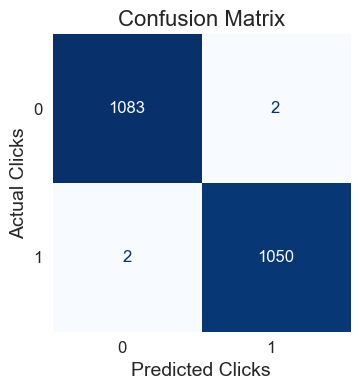



MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.7757009345794392
Confusion Matrix
 [[216  56]
 [ 64 199]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       272
           1       0.78      0.76      0.77       263

    accuracy                           0.78       535
   macro avg       0.78      0.78      0.78       535
weighted avg       0.78      0.78      0.78       535



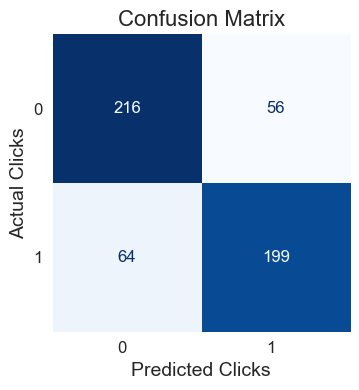

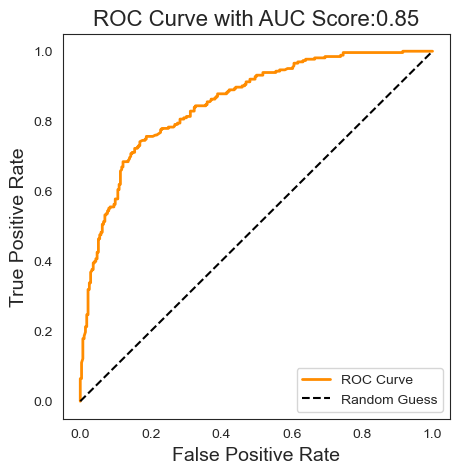

In [561]:
rfc_result = classifier_metrics('RandomForest', rfc_model, X_train, y_train, X_test, y_test)

## 🔴 XGBoost

### ➡️ __`Default Parameter`__

In [562]:
xgbc = XGBClassifier(random_state=seed,n_jobs=-1)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=33, ...)

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Accuracy Score: 0.7950370986451881
Confusion Matrix
 [[1082    3]
 [   9 1043]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1085
           1       1.00      0.99      0.99      1052

    accuracy                           0.99      2137
   macro avg       0.99      0.99      0.99      2137
weighted avg       0.99      0.99      0.99      2137



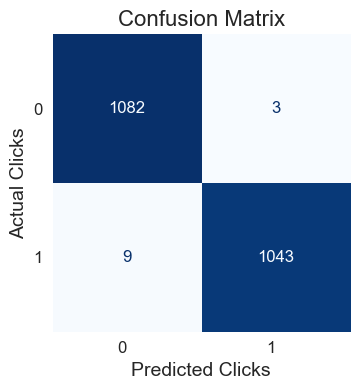



MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.7794392523364486
Confusion Matrix
 [[215  57]
 [ 61 202]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       272
           1       0.78      0.77      0.77       263

    accuracy                           0.78       535
   macro avg       0.78      0.78      0.78       535
weighted avg       0.78      0.78      0.78       535



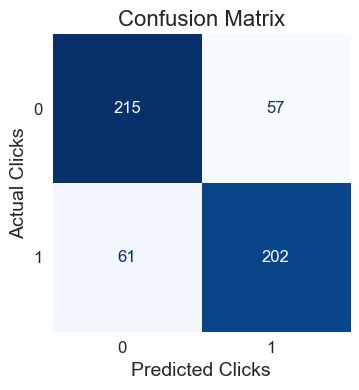

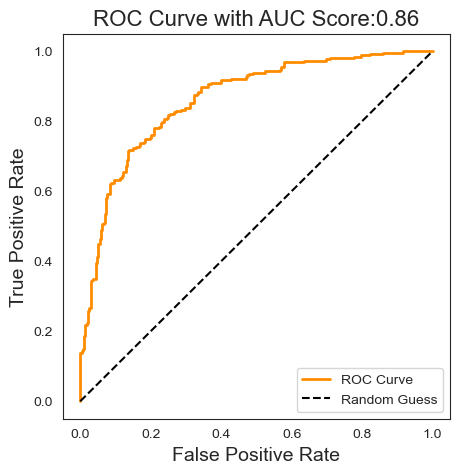

In [563]:
xgbc_nosc_default = classifier_metrics('XGBoost_nosc_default', xgbc, X_train, y_train, X_test, y_test)

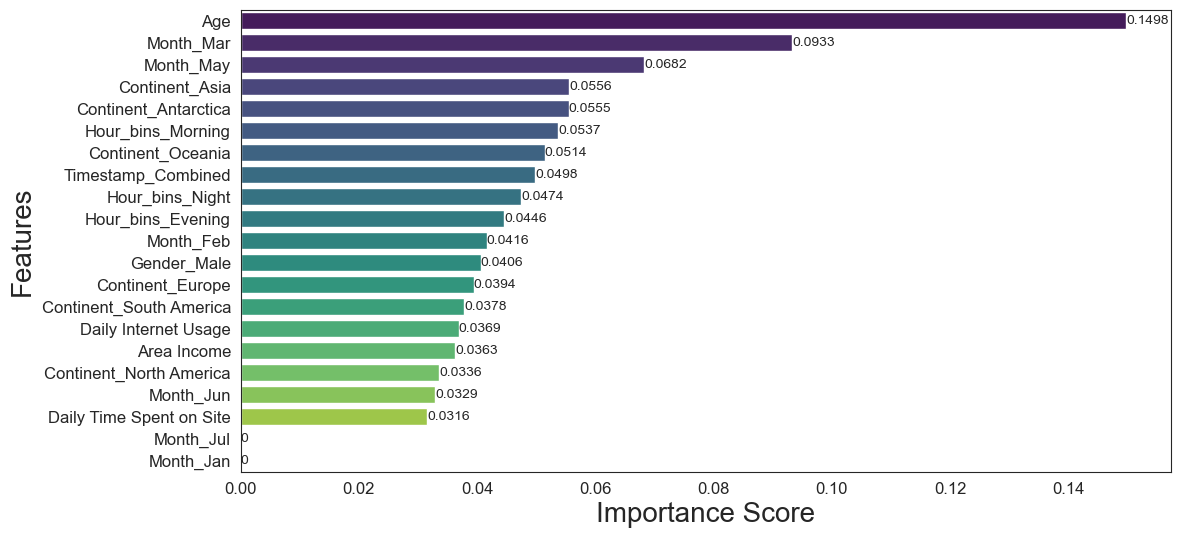

In [564]:
feature_importances = pd.DataFrame({'Features': X_train.columns, "Importance Score": xgbc.feature_importances_})
feature_importances['Importance Score'] = feature_importances['Importance Score'].round(4)
feature_importances.sort_values("Importance Score", ascending=False, inplace=True)
feature_importances.set_index("Features", inplace=True)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=feature_importances, x='Importance Score', y='Features', hue='Features', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)

plt.xlabel('Importance Score', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()

In [565]:
df_results = pd.concat([lg_drvif_default, lg_drvif_tuned, lg_default, lg_tuned, 
                        dtc_default, dtc_tuned, dtc_nosc_default, dtc_nosc_tuned,
                        rfc_nosc_default, rfc_nosc_tuned, xgbc_nosc_default], ignore_index=True)
df_results

Model  Train Cross-Val(Accuracy Score)  \
0   LogisticRegression_drvif_default                         0.630325   
1     LogisticRegression_drvif_tuned                         0.631729   
2         LogisticRegression_default                         0.735616   
3           LogisticRegression_tuned                         0.738892   
4               DecisionTree_default                         0.715027   
5                 DecisionTree_tuned                         0.751532   
6          DecisionTree_nosc_default                         0.711751   
7            DecisionTree_nosc_tuned                         0.752937   
8          RandomForest_nosc_default                         0.796453   
9            RandomForest_nosc_tuned                         0.806745   
10              XGBoost_nosc_default                         0.795037   

    Test Accuracy Score  Train Cross-Val(ROC_AUC)  Test ROC_AUC  \
0              0.626168                  0.673368      0.665218   
1              0.620561                  0.673509      0.665399   
2              0.725234                  0.801229      0.771038   
3              0.727103                  0.801315      0.769515   
4              0.697196                  0.775662      0.742668   
5              0.714019                  0.800933      0.773631   
6              0.689720                  0.772482      0.740487   
7              0.742056                  0.800080      0.780097   
8              0.757009                  0.875372      0.851061   
9              0.775701                  0.877335      0.853479   
10             0.779439                  0.881843      0.862125   

    Train Cross-Val(F1 Score)  Test F1 Score  
0                    0.615050       0.610895  
1                    0.617407       0.602740  
2                    0.723807       0.716763  
3                    0.727031       0.719231  
4                    0.688912       0.662500  
5                    0.734099       0.700587  
6                    0.683956       0.658436  
7                    0.740189       0.727273  
8                    0.789449       0.750958  
9                    0.800553       0.768340  
10                   0.792159       0.773946

### ➡️ __`Hyperparameter Tuning`__

### -->__`n_estimators`__

Best Train Cross-Val Accuracy Score--> 0.803929829937184
Best Train 'n_estimators'--> 70
Best Test Accuracy Score--> 0.7925233644859813
Best Test 'n_estimators'--> 40


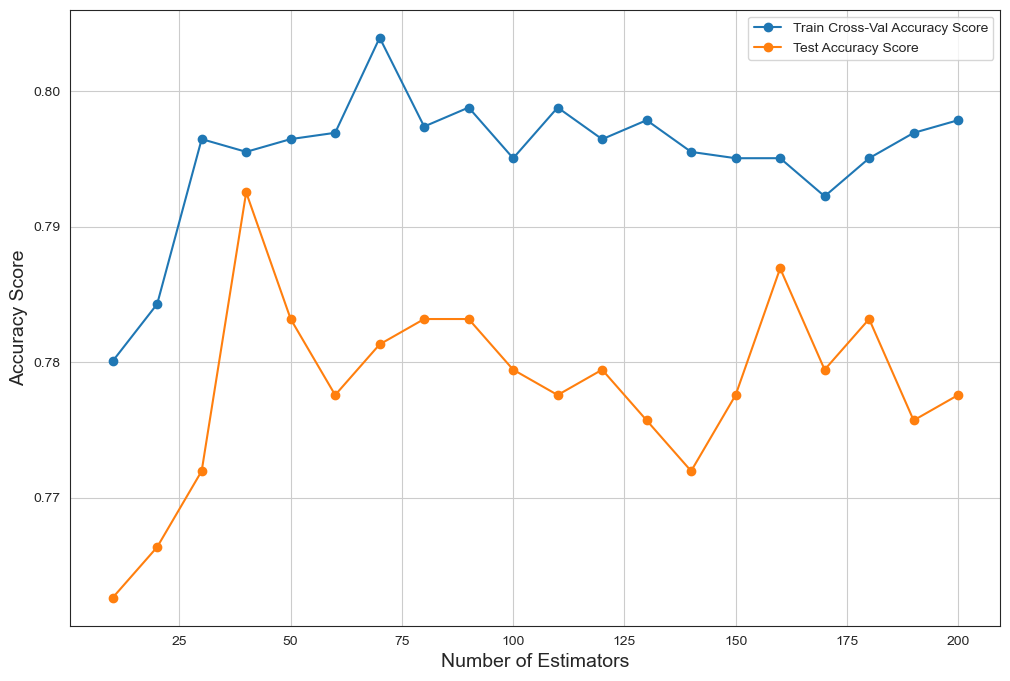

In [566]:
n_estimators_range = range(10,201,10)
train_scores = []
test_scores = []

for i in n_estimators_range:
    xgbc = XGBClassifier(n_estimators=i, random_state=seed, n_jobs=-1)
    xgbc.fit(X_train, y_train)
    y_train_pred = xgbc.predict(X_train)
    y_test_pred = xgbc.predict(X_test)

    #train set
    train_score = cross_val_score(xgbc, X_train, y_train, cv=5).mean()
    train_scores.append(train_score)

    #test set
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

print("Best Train Cross-Val Accuracy Score-->", max(train_scores))
print("Best Train 'n_estimators'-->", (np.array(train_scores).argmax()*10+10))
print("Best Test Accuracy Score-->", max(test_scores))
print("Best Test 'n_estimators'-->", (np.array(test_scores).argmax()*10+10))


plt.figure(figsize=(12,8))
plt.plot(n_estimators_range, train_scores, 'o-', label='Train Cross-Val Accuracy Score')
plt.plot(n_estimators_range, test_scores, 'o-', label='Test Accuracy Score')
plt.xlabel('Number of Estimators', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.legend()
sns.set_style('white')
plt.grid(True)
plt.show()

### From the graph, the range for `n_estimators` can be explored between 40 to 70.

### -->__`max_depth`__

Best Train Cross-Val Accuracy Score--> 0.8044014970780713
Best Train Max_Depth--> 4
Best Test Accuracy Score--> 0.788785046728972
Best Test Max_Depth--> 8


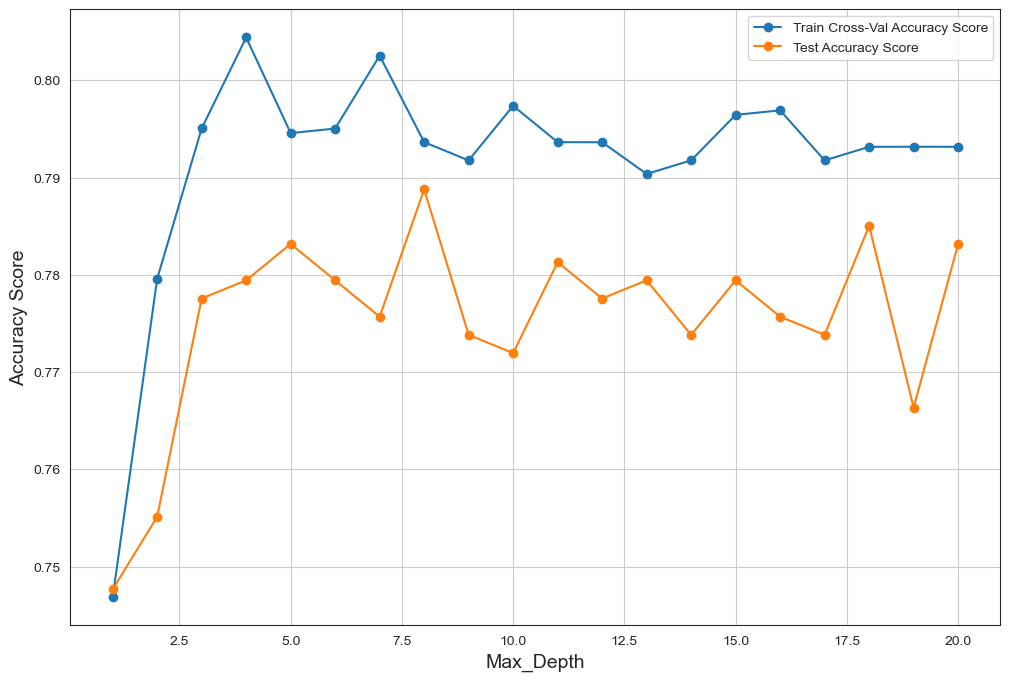

In [567]:
max_depth_range = range(1,21)
train_scores = []
test_scores = []

for i in max_depth_range:
    xgbc = XGBClassifier(max_depth=i, random_state=seed, n_jobs=-1)
    xgbc.fit(X_train, y_train)
    y_train_pred = xgbc.predict(X_train)
    y_test_pred = xgbc.predict(X_test)

    #train set
    train_score = cross_val_score(xgbc, X_train, y_train, cv=5).mean()
    train_scores.append(train_score)

    #test set
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)


print("Best Train Cross-Val Accuracy Score-->", max(train_scores))
print("Best Train Max_Depth-->", (np.array(train_scores).argmax()+1))
print("Best Test Accuracy Score-->", max(test_scores))
print("Best Test Max_Depth-->", (np.array(test_scores).argmax()+1))


plt.figure(figsize=(12,8))
plt.plot(max_depth_range, train_scores, 'o-', label='Train Cross-Val Accuracy Score')
plt.plot(max_depth_range, test_scores, 'o-', label='Test Accuracy Score')
plt.xlabel('Max_Depth', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### From the graph, the range for `max_depth` could be further investigated between 4 and 8.

In [568]:
start = time.time()

params = {
            'n_estimators': [40,70,100,160],
            'max_depth': [3,4,5,6,7,8],
            'colsample_bytree': [0.4, 0.6, 0.8, 1],
            'subsample': [0.5, 0.8],
            'learning_rate': [0.01, 0.05, 0.1, 0.3],
            'gamma': [0, 1],
            'booster': ['gbtree']
}

xgbc = XGBClassifier(random_state=seed, n_jobs=-1)
xgbc_grid = GridSearchCV(xgbc, params, cv=5, n_jobs=-1)
xgbc_grid.fit(X_train, y_train)

end = time.time()
no_of_combinations = 1
for key, value in params.items():
    no_of_combinations *= len(value)

print(f"Time taken by Grid Search over {no_of_combinations} combinations of hyperparameters", end-start)
print('Best Parameters:', xgbc_grid.best_params_)
print('Best Cross-Validation Accuracy Score:', xgbc_grid.best_score_)

Time taken by Grid Search over 1536 combinations of hyperparameters 126.93196702003479
Best Parameters: {'booster': 'gbtree', 'colsample_bytree': 0.4, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 160, 'subsample': 0.5}
Best Cross-Validation Accuracy Score: 0.8184475475497385


In [569]:
xgbc_best = xgbc_grid.best_estimator_

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Accuracy Score: 0.8184475475497385
Confusion Matrix
 [[1020   65]
 [  76  976]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1085
           1       0.94      0.93      0.93      1052

    accuracy                           0.93      2137
   macro avg       0.93      0.93      0.93      2137
weighted avg       0.93      0.93      0.93      2137



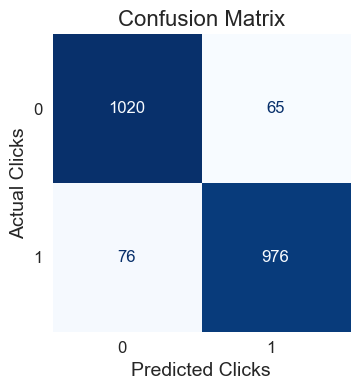



MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.788785046728972
Confusion Matrix
 [[218  54]
 [ 59 204]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       272
           1       0.79      0.78      0.78       263

    accuracy                           0.79       535
   macro avg       0.79      0.79      0.79       535
weighted avg       0.79      0.79      0.79       535



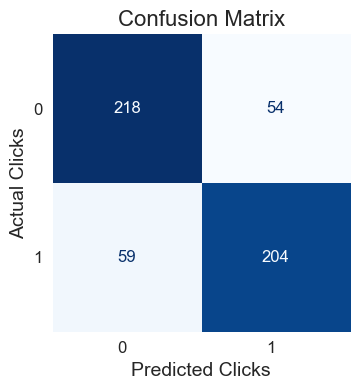

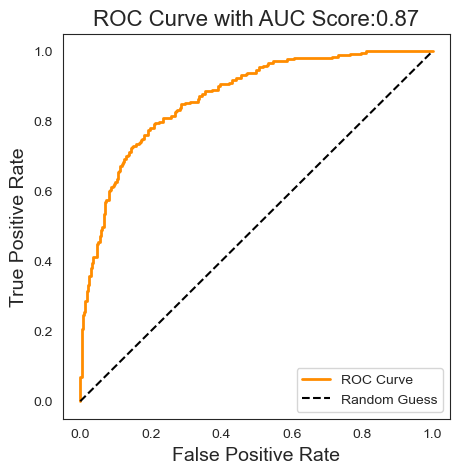

In [686]:
xgbc_nosc_tuned = classifier_metrics('XGBoost_nosc_tuned', xgbc_best, X_train, y_train, X_test, y_test)

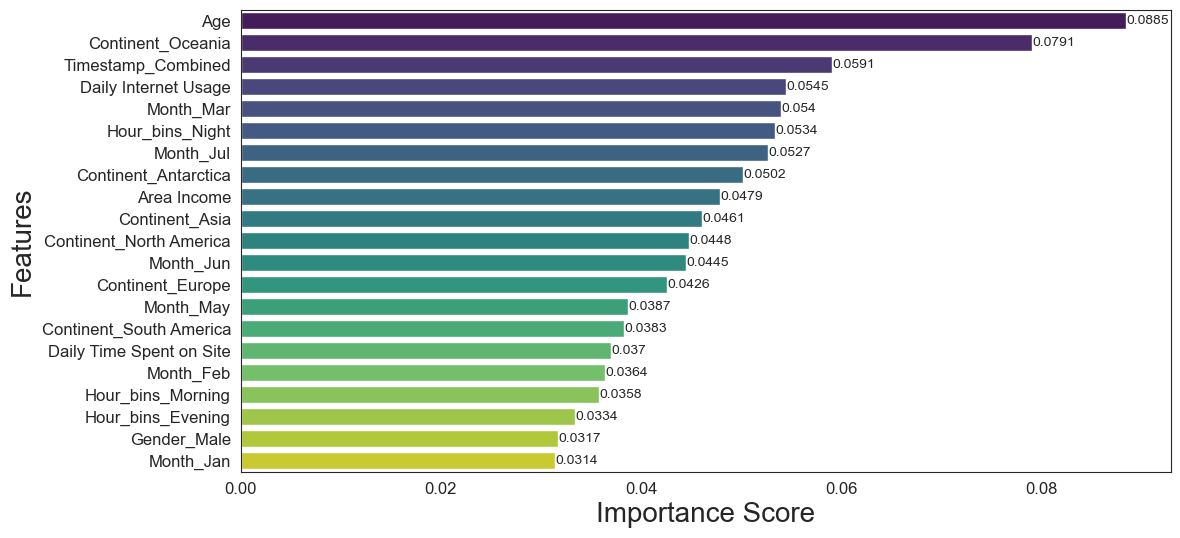

In [571]:
feature_importances = pd.DataFrame({'Features': X_train.columns, "Importance Score": xgbc_best.feature_importances_})
feature_importances['Importance Score'] = feature_importances['Importance Score'].round(4)
feature_importances.sort_values("Importance Score", ascending=False, inplace=True)
feature_importances.set_index("Features", inplace=True)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=feature_importances, x='Importance Score', y='Features', hue='Features', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)

plt.xlabel('Importance Score', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()

## SHAP VALUES

In [689]:
explainer = shap.Explainer(xgbc_best.predict, X_train)
shap_values = explainer(X_train)

PermutationExplainer explainer: 2138it [04:14,  8.05it/s]                                                              


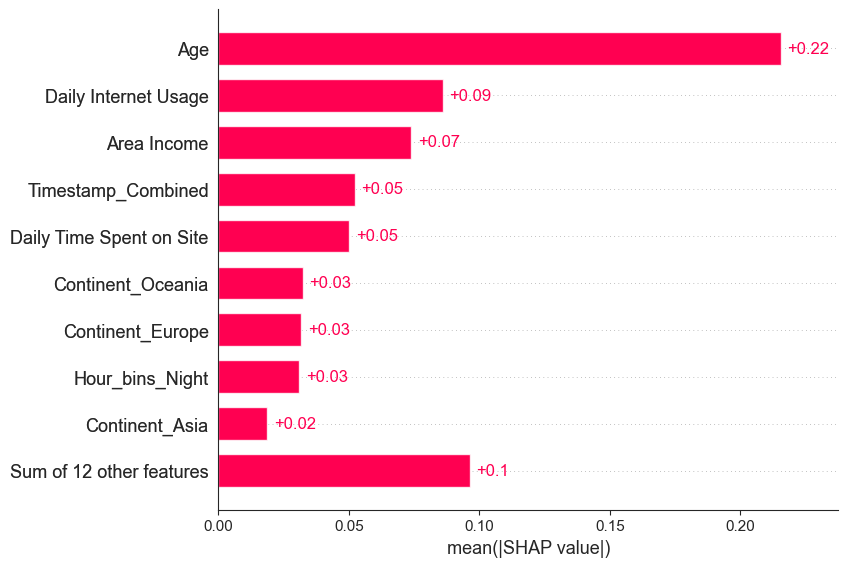

In [690]:
shap.plots.bar(shap_values)

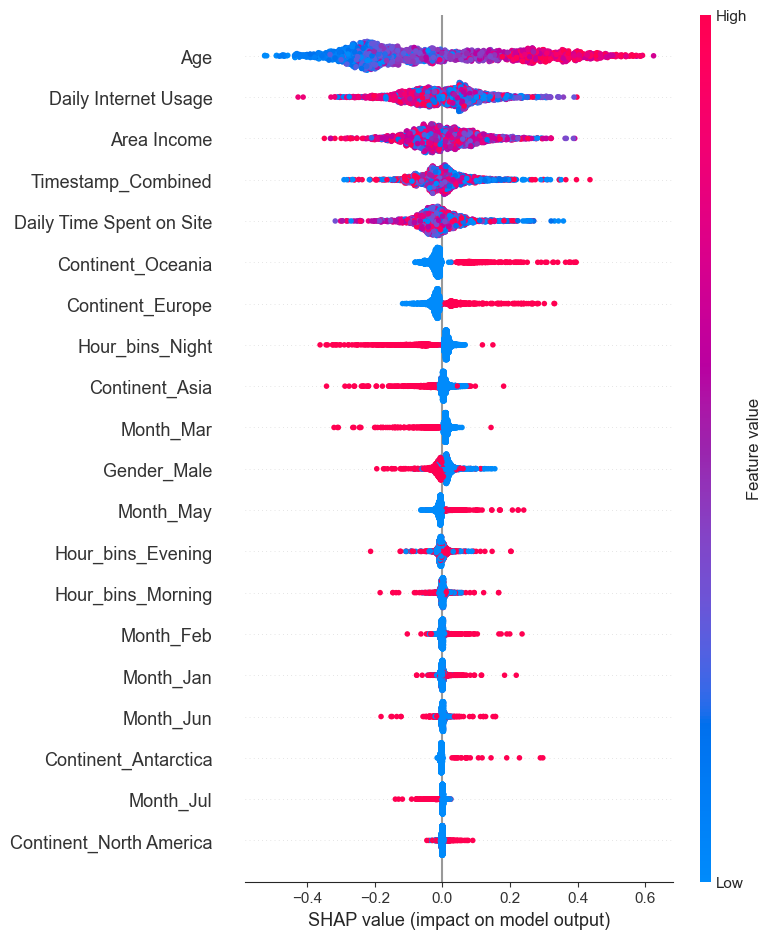

In [691]:
shap.summary_plot(shap_values)

### Higher "Age" values (red) positively impact the prediction, increasing the likelihood of clicking on the ad.
### Lower "Age" values (blue) negatively impact the prediction, decreasing the likelihood of clicking on the ad.

In [618]:
df_results = pd.concat([lg_drvif_default, lg_drvif_tuned, lg_default, lg_tuned, 
                        dtc_default, dtc_tuned, dtc_nosc_default, dtc_nosc_tuned,
                        rfc_nosc_default, rfc_nosc_tuned, xgbc_nosc_default, xgbc_nosc_tuned], ignore_index=True)
df_results

Model  Train Cross-Val(Accuracy Score)  \
0   LogisticRegression_drvif_default                         0.630325   
1     LogisticRegression_drvif_tuned                         0.631729   
2         LogisticRegression_default                         0.735616   
3           LogisticRegression_tuned                         0.738892   
4               DecisionTree_default                         0.715027   
5                 DecisionTree_tuned                         0.751532   
6          DecisionTree_nosc_default                         0.711751   
7            DecisionTree_nosc_tuned                         0.752937   
8          RandomForest_nosc_default                         0.796453   
9            RandomForest_nosc_tuned                         0.806745   
10              XGBoost_nosc_default                         0.795037   
11                XGBoost_nosc_tuned                         0.818448   

    Test Accuracy Score  Train Cross-Val(ROC_AUC)  Test ROC_AUC  \
0              0.626168                  0.673368      0.665218   
1              0.620561                  0.673509      0.665399   
2              0.725234                  0.801229      0.771038   
3              0.727103                  0.801315      0.769515   
4              0.697196                  0.775662      0.742668   
5              0.714019                  0.800933      0.773631   
6              0.689720                  0.772482      0.740487   
7              0.742056                  0.800080      0.780097   
8              0.757009                  0.875372      0.851061   
9              0.775701                  0.877335      0.853479   
10             0.779439                  0.881843      0.862125   
11             0.788785                  0.892335      0.869842   

    Train Cross-Val(F1 Score)  Test F1 Score  
0                    0.615050       0.610895  
1                    0.617407       0.602740  
2                    0.723807       0.716763  
3                    0.727031       0.719231  
4                    0.688912       0.662500  
5                    0.734099       0.700587  
6                    0.683956       0.658436  
7                    0.740189       0.727273  
8                    0.789449       0.750958  
9                    0.800553       0.768340  
10                   0.792159       0.773946  
11                   0.812669       0.783109

In [610]:
df_results = pd.concat([lg_drvif_default, lg_drvif_tuned, lg_default, lg_tuned, 
                        dtc_default, dtc_tuned, dtc_nosc_default, dtc_nosc_tuned,
                        rfc_nosc_default, rfc_nosc_tuned, xgbc_nosc_default, xgbc_nosc_tuned], ignore_index=True)
df_results

Model  Train Cross-Val(Accuracy Score)  \
0   LogisticRegression_drvif_default                         0.630325   
1     LogisticRegression_drvif_tuned                         0.631729   
2         LogisticRegression_default                         0.735616   
3           LogisticRegression_tuned                         0.738892   
4               DecisionTree_default                         0.715027   
5                 DecisionTree_tuned                         0.751532   
6          DecisionTree_nosc_default                         0.711751   
7            DecisionTree_nosc_tuned                         0.752937   
8          RandomForest_nosc_default                         0.796453   
9            RandomForest_nosc_tuned                         0.806745   
10              XGBoost_nosc_default                         0.795037   
11                XGBoost_nosc_tuned                         0.818448   

    Test Accuracy Score  Train Cross-Val(ROC_AUC)  Test ROC_AUC  \
0              0.626168                  0.673368      0.665218   
1              0.620561                  0.673509      0.665399   
2              0.725234                  0.801229      0.771038   
3              0.727103                  0.801315      0.769515   
4              0.697196                  0.775662      0.742668   
5              0.714019                  0.800933      0.773631   
6              0.689720                  0.772482      0.740487   
7              0.742056                  0.800080      0.780097   
8              0.757009                  0.875372      0.851061   
9              0.775701                  0.877335      0.853479   
10             0.779439                  0.881843      0.862125   
11             0.788785                  0.892335      0.869842   

    Train Cross-Val(F1 Score)  Test F1 Score  
0                    0.615050       0.610895  
1                    0.617407       0.602740  
2                    0.723807       0.716763  
3                    0.727031       0.719231  
4                    0.688912       0.662500  
5                    0.734099       0.700587  
6                    0.683956       0.658436  
7                    0.740189       0.727273  
8                    0.789449       0.750958  
9                    0.800553       0.768340  
10                   0.792159       0.773946  
11                   0.812669       0.783109

## Save XGBoost Model (Tuned)

In [573]:
with open('XGBoost.pkl', 'wb') as file:
    pickle.dump(xgbc_best, file)

In [574]:
with open('XGBoost.pkl', 'rb') as file:
    xgbc_model = pickle.load(file)

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Accuracy Score: 0.8184475475497385
Confusion Matrix
 [[1020   65]
 [  76  976]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1085
           1       0.94      0.93      0.93      1052

    accuracy                           0.93      2137
   macro avg       0.93      0.93      0.93      2137
weighted avg       0.93      0.93      0.93      2137



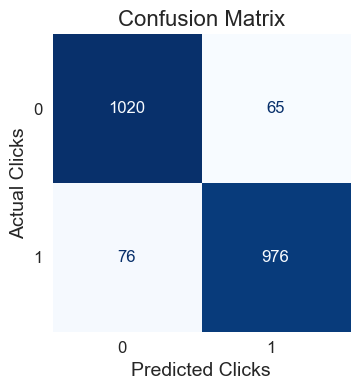



MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.788785046728972
Confusion Matrix
 [[218  54]
 [ 59 204]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       272
           1       0.79      0.78      0.78       263

    accuracy                           0.79       535
   macro avg       0.79      0.79      0.79       535
weighted avg       0.79      0.79      0.79       535



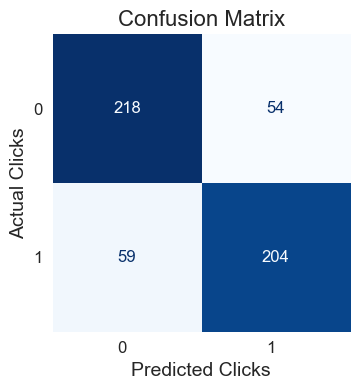

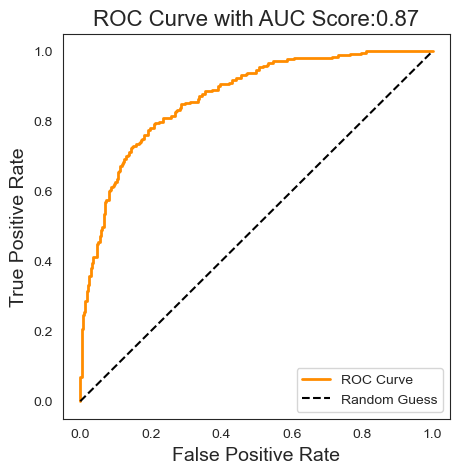

In [575]:
xgbc_result = classifier_metrics('XGBoost', xgbc_model, X_train, y_train, X_test, y_test)

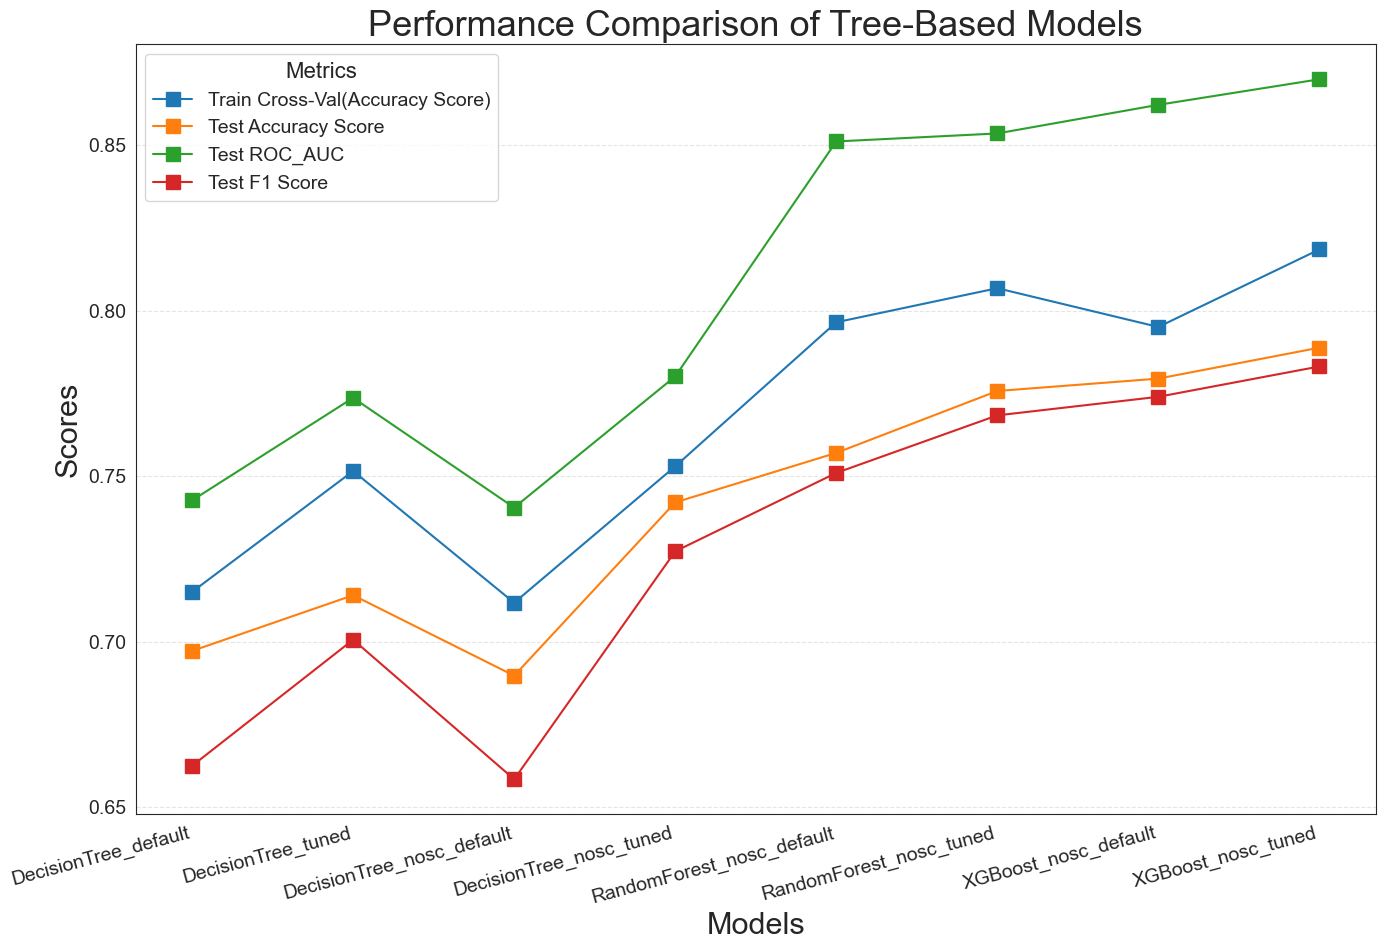

In [611]:
selected_models = ['DecisionTree_default', 'DecisionTree_tuned', 'DecisionTree_nosc_default', 'DecisionTree_nosc_tuned',	
                   'RandomForest_nosc_default', 'RandomForest_nosc_tuned', 'XGBoost_nosc_default', 'XGBoost_nosc_tuned']
filtered_df = df_results[df_results['Model'].isin(selected_models)]

fig, ax = plt.subplots(figsize=(16, 10))

for column in ['Train Cross-Val(Accuracy Score)', 'Test Accuracy Score', 'Test ROC_AUC', 'Test F1 Score']:
    ax.plot(filtered_df['Model'], filtered_df[column], marker='s', markersize=10, label=column)

ax.set_title("Performance Comparison of Tree-Based Models", fontsize=26)
ax.set_ylabel("Scores", fontsize=22)
ax.set_xlabel("Models", fontsize=22)
ax.set_xticks(range(len(filtered_df['Model'])))
ax.set_xticklabels(filtered_df['Model'], rotation=15, ha='right', fontsize=14)
ax.tick_params(axis='y', labelsize=14) 
ax.legend(title="Metrics", title_fontsize=16, loc='upper left', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.set_style('white')
plt.show()

# ⬛ ALL MODELS PERFORMANCE COMPARISON ⬛

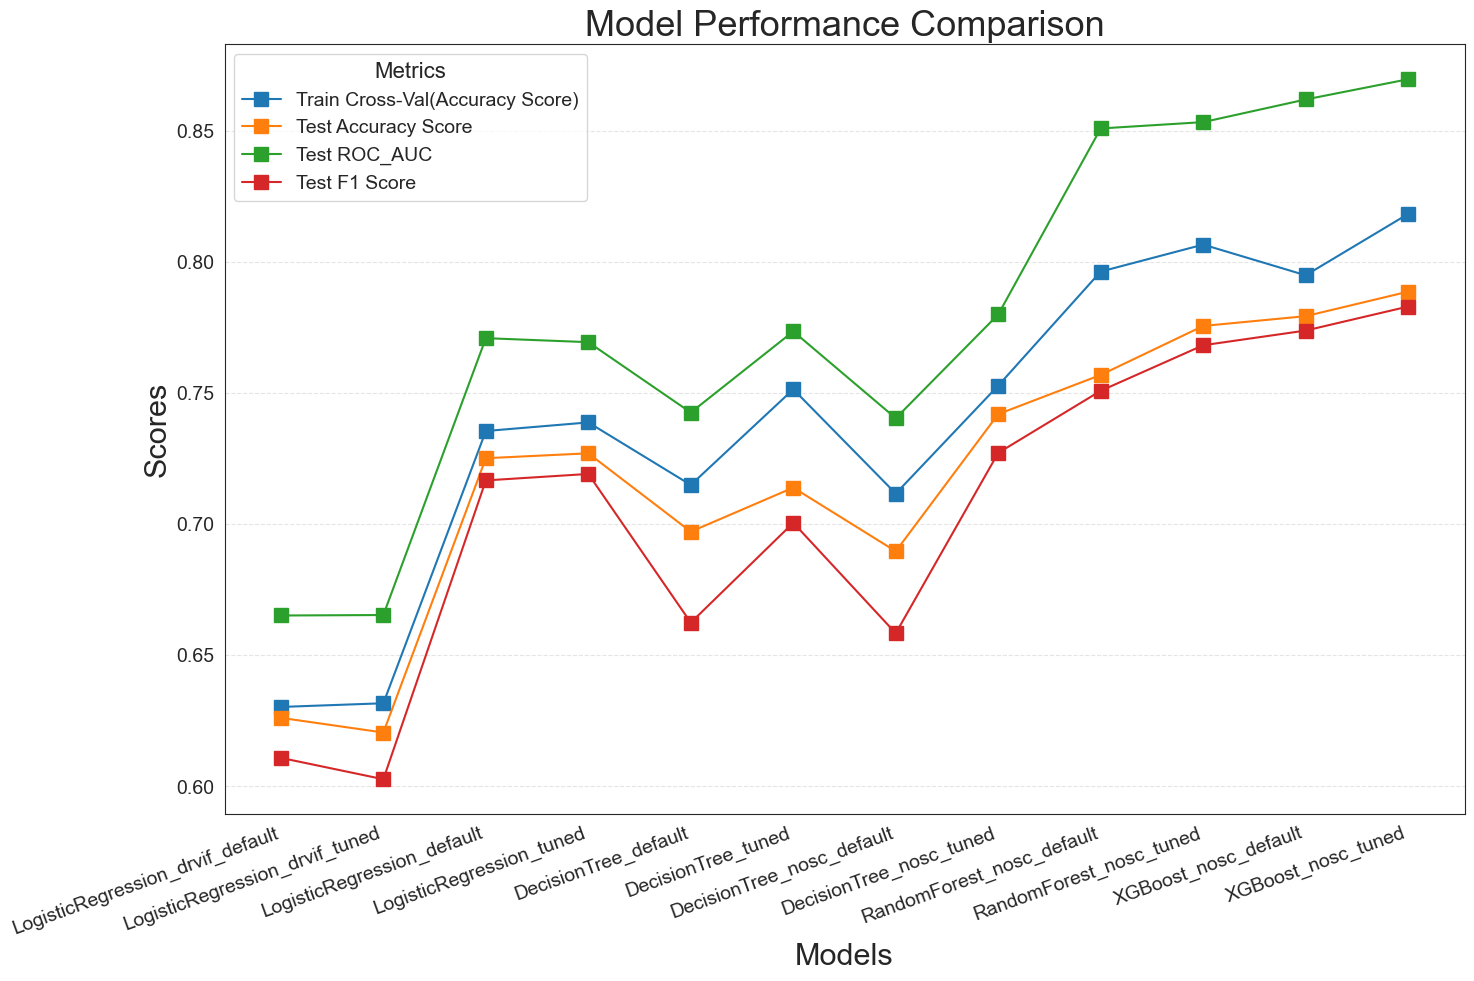

In [613]:
fig, ax = plt.subplots(figsize=(16, 10))

for column in ['Train Cross-Val(Accuracy Score)', 'Test Accuracy Score', 'Test ROC_AUC', 'Test F1 Score']:
    ax.plot(df_results['Model'], df_results[column], marker='s', markersize=10, label=column)

ax.set_title("Model Performance Comparison", fontsize=26)
ax.set_ylabel("Scores", fontsize=22)
ax.set_xlabel("Models", fontsize=22)
ax.set_xticks(range(len(df_results['Model'])))
ax.set_xticklabels(df_results['Model'], rotation=20, ha='right', fontsize=14)
ax.tick_params(axis='y', labelsize=14) 
ax.legend(title="Metrics", title_fontsize=16, loc='upper left', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.set_style('white')
plt.show()

In [621]:
df_results.sort_values(by='Train Cross-Val(ROC_AUC)', ascending=False)

Model  Train Cross-Val(Accuracy Score)  \
11                XGBoost_nosc_tuned                         0.818448   
10              XGBoost_nosc_default                         0.795037   
9            RandomForest_nosc_tuned                         0.806745   
8          RandomForest_nosc_default                         0.796453   
3           LogisticRegression_tuned                         0.738892   
2         LogisticRegression_default                         0.735616   
5                 DecisionTree_tuned                         0.751532   
7            DecisionTree_nosc_tuned                         0.752937   
4               DecisionTree_default                         0.715027   
6          DecisionTree_nosc_default                         0.711751   
1     LogisticRegression_drvif_tuned                         0.631729   
0   LogisticRegression_drvif_default                         0.630325   

    Test Accuracy Score  Train Cross-Val(ROC_AUC)  Test ROC_AUC  \
11             0.788785                  0.892335      0.869842   
10             0.779439                  0.881843      0.862125   
9              0.775701                  0.877335      0.853479   
8              0.757009                  0.875372      0.851061   
3              0.727103                  0.801315      0.769515   
2              0.725234                  0.801229      0.771038   
5              0.714019                  0.800933      0.773631   
7              0.742056                  0.800080      0.780097   
4              0.697196                  0.775662      0.742668   
6              0.689720                  0.772482      0.740487   
1              0.620561                  0.673509      0.665399   
0              0.626168                  0.673368      0.665218   

    Train Cross-Val(F1 Score)  Test F1 Score  
11                   0.812669       0.783109  
10                   0.792159       0.773946  
9                    0.800553       0.768340  
8                    0.789449       0.750958  
3                    0.727031       0.719231  
2                    0.723807       0.716763  
5                    0.734099       0.700587  
7                    0.740189       0.727273  
4                    0.688912       0.662500  
6                    0.683956       0.658436  
1                    0.617407       0.602740  
0                    0.615050       0.610895

### Conclusion: Based on the performance comparison, tree-based models demonstrate superior performance. Random Forest and XGBoost are selected for predicting the evaluation dataset, while Logistic Regression will serve as the baseline model for comparison.
### 1. **`Baseline Model`**  
- __Logistic Regression (remove high VIF columns)__

### 2. **`Champion Models`**  
- __Random Forest (Tuned)__
- __XGBoost (Tuned)__

# ⬛ MODEL EVALUATION (Unseen Data) ⬛

In [619]:
df_Evaluation

Timestamp_Combined       Age  Area Income  Daily Internet Usage  \
2854 201605030821.000000 24.000000 52252.910000            182.200000   
2767 201602030759.000000 39.000000 32549.950000            115.260000   
743  201606251733.000000 31.000000 46179.970000            133.170000   
2843 201603110005.000000 34.000000 20592.990000            160.030000   
1052 201604211610.000000 51.000000 57260.410000            118.270000   
1916 201603110005.000000 34.000000 40183.750000            168.340000   
2057 201603181322.000000 39.000000 65953.760000            128.620000   
1217 201605122132.000000 33.000000 44174.250000            196.770000   
627  201604032113.000000 43.000000 51119.930000            163.480000   
1500 201606101131.000000 33.000000 60953.930000            125.270000   
860  201602111645.000000 40.000000 62669.590000            130.860000   
2441 201607180136.000000 40.000000 56113.370000            140.460000   
2507 201601082247.000000 37.000000 23936.860000            181.020000   
434  201604042001.000000 54.000000 45632.510000            218.610000   
2547 201601052058.000000 38.000000 60953.930000            162.050000   
473  201606172018.000000 19.000000 33951.630000            253.480000   
2693 201602200954.000000 35.000000 59785.940000            160.030000   
843  201601151940.000000 26.000000 56782.180000            131.680000   
667  201601090345.000000 32.000000 55424.240000            178.920000   
2452 201606100356.000000 26.000000 66291.670000            131.680000   
2284 201604072034.000000 37.000000 53058.910000            139.320000   
727  201601051626.000000 37.000000 23936.860000            173.430000   
1439 201604040707.000000 50.000000 43974.490000            123.130000   
1481 201603232106.000000 37.000000 23936.860000            181.020000   
800  201605082224.000000 39.000000 38067.080000            124.440000   
825  201604082240.000000 28.000000 61840.260000            120.490000   
960  201604062120.000000 32.000000 69481.850000            182.200000   
1823 201601142058.000000 35.000000 53898.890000            201.260000   
2899 201604071518.000000 36.000000 32549.950000            115.260000   
1137 201604072034.000000 37.000000 23936.860000            217.370000   
2862 201607180136.000000 35.000000 25603.930000            235.290000   
2453 201606132241.000000 22.000000 45945.880000            253.170000   
2231 201604042001.000000 60.000000 39031.890000            122.020000   
2369 201604211956.000000 44.000000 50723.670000            187.760000   
1271 201605312342.000000 44.000000 57868.440000            140.950000   
2576 201603110649.000000 26.000000 35521.880000            228.780000   
1172 201601090345.000000 32.000000 55424.240000            178.920000   
411  201607080347.000000 36.000000 59886.580000            115.260000   
48   201607110932.000000 31.000000 56180.930000            207.170000   
2632 201606092143.000000 32.000000 69481.850000            178.920000   
2470 201602111645.000000 40.000000 66873.900000            136.180000   
295  201601051626.000000 54.000000 58966.220000            218.610000   
385  201604042001.000000 49.000000 39031.890000            195.690000   
1915 201606291050.000000 30.000000 57877.150000            113.690000   
2553 201606131106.000000 46.000000 64021.550000            209.930000   
1847 201602270852.000000 34.000000 59785.940000            160.030000   
2356 201606201420.000000 37.000000 67132.460000            158.560000   
837  201604061124.000000 38.000000 51920.490000            226.740000   
1262 201602151652.000000 23.000000 59243.460000            222.870000   
777  201607121056.000000 24.000000 52252.910000            178.920000   
1022 201601141400.000000 38.000000 71455.620000            146.800000   
791  201604010921.000000 35.000000 73889.990000            236.870000   
1317 201601052058.000000 26.000000 56694.120000            228.810000   
1758 201607051859.000000 26.000000 66291.670000            131.6

In [673]:
def eval_model(model, model_name, X, y):
    y_pred=model.predict(X)
    
    accuracy = accuracy_score(y, y_pred)
    print('Accuracy Score:', accuracy)

    confmatrix = confusion_matrix(y, y_pred)
    print('Confusion Matrix\n', confmatrix)

    print('Classification Report:\n', classification_report(y, y_pred))
    
    fig, ax = plt.subplots(figsize=(4,4))
    confmatrix_plot = ConfusionMatrixDisplay(confusion_matrix=confmatrix)
    confmatrix_plot.plot(cmap='Blues', ax=ax, colorbar=False)
    for text in confmatrix_plot.text_.ravel():
        text.set_fontsize(16)
    plt.title("Confusion Matrix", fontdict={'size': 16})
    ax.set_xlabel('Predicted Clicks', fontsize=14)
    ax.set_ylabel('Actual Clicks', fontsize=14)
    plt.xticks(rotation=0, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.grid(False)
    plt.tight_layout()
    plt.show()   

    
    #roc_auc_curve
    y_proba = model.predict_proba(X)[:,1]
    roc_auc = roc_auc_score(y, y_proba)
    
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    print('\n')
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC Curve')
    plt.plot([0,1], [0,1], 'k--', label='Random Guess')
    plt.title(f'ROC Curve with AUC Score:{roc_auc:.2f}', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(loc="lower right", fontsize=10)
    sns.set_style("white")
    plt.show()


    eval_results = pd.DataFrame({  
                  'Model': [model_name],
                  'Accuracy Score': [accuracy],                 
                  'ROC_AUC': [roc_auc_score(y, model.predict_proba(X)[:,1])],        
                  'F1 Score': [f1_score(y, y_pred)]                             
                })
    
    return eval_results
   

In [623]:
df_Evaluation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 2854 to 1532
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp_Combined        297 non-null    float64
 1   Age                       297 non-null    float64
 2   Area Income               297 non-null    float64
 3   Daily Internet Usage      297 non-null    float64
 4   Daily Time Spent on Site  297 non-null    float64
 5   Clicked on Ad             297 non-null    int64  
 6   Month_Feb                 297 non-null    int32  
 7   Month_Jan                 297 non-null    int32  
 8   Month_Jul                 297 non-null    int32  
 9   Month_Jun                 297 non-null    int32  
 10  Month_Mar                 297 non-null    int32  
 11  Month_May                 297 non-null    int32  
 12  Hour_bins_Evening         297 non-null    int32  
 13  Hour_bins_Morning         297 non-null    int32  
 14  Hour_bins_N

In [638]:
X_unseen = df_Evaluation.drop('Clicked on Ad', axis=1)
y_unseen = df_Evaluation['Clicked on Ad']

In [639]:
X_unseen.shape, y_unseen.shape

((297, 21), (297,))

### Load Models

In [640]:
# Logistic Regression (Baseline Model)
with open('Logistic.pkl', 'rb') as file:
    lg_model = pickle.load(file)

# Random Forest (Tuned)
with open('RandomForest.pkl', 'rb') as file:
    rfc_model = pickle.load(file)

# XGBoost(Tuned)
with open('XGBoost.pkl', 'rb') as file:
    xgbc_model = pickle.load(file)


## 🔴Logistic Regression (Baseline)

#### Due to their high VIF values, "Timestamp_Combined", "Age", "Daily Internet Usage", and "Area Income" will be excluded from the evaluation to address multicollinearity.

In [641]:
X1_unseen=X_unseen.copy()
y1_unseen=y_unseen.copy()

In [642]:
X1_unseen = X1_unseen.drop(['Timestamp_Combined','Age','Daily Internet Usage','Area Income'], axis=1)

In [651]:
X1_unseen_sc=sc1.transform(X1_unseen)

Accuracy Score: 0.6397306397306397
Confusion Matrix
 [[94 50]
 [57 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.65      0.64       144
           1       0.66      0.63      0.64       153

    accuracy                           0.64       297
   macro avg       0.64      0.64      0.64       297
weighted avg       0.64      0.64      0.64       297



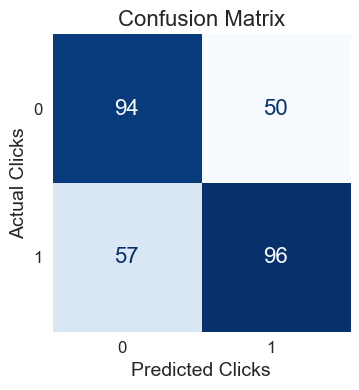

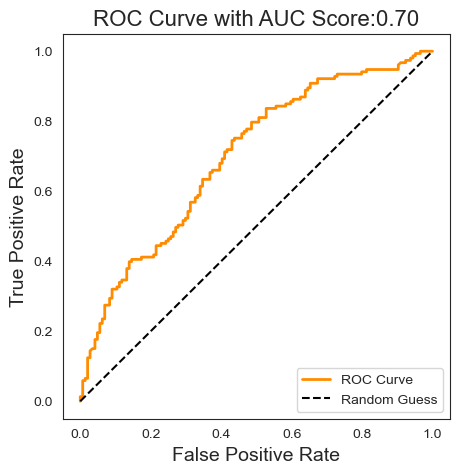

In [674]:
lg_baseline = eval_model(lg_model, "Logistic Regression (Baseline)", X1_unseen_sc, y1_unseen)

In [664]:
lg_baseline

Model  Accuracy Score  ROC_AUC  F1 Score
0  Logistic Regression        0.639731 0.698575  0.642140

## 🔴Random Forest (Tuned)

Accuracy Score: 0.8080808080808081
Confusion Matrix
 [[118  26]
 [ 31 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       144
           1       0.82      0.80      0.81       153

    accuracy                           0.81       297
   macro avg       0.81      0.81      0.81       297
weighted avg       0.81      0.81      0.81       297



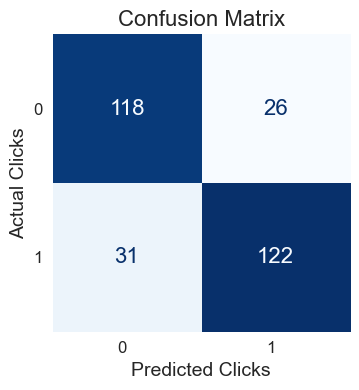

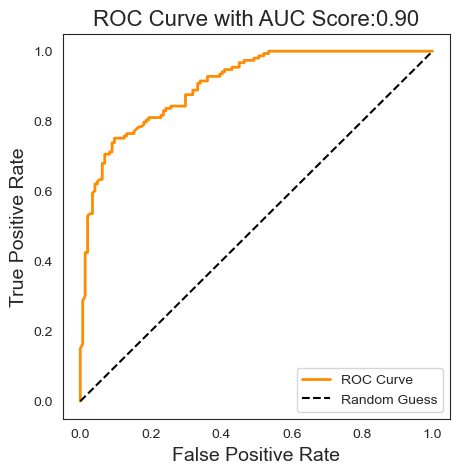

In [677]:
rf_tuned = eval_model(rfc_model, "Random Forest (Tuned)", X_unseen, y_unseen)

In [678]:
eval_results = pd.concat([lg_baseline,rf_tuned], ignore_index=True)
eval_results

Model  Accuracy Score  ROC_AUC  F1 Score
0  Logistic Regression (Baseline)        0.639731 0.698575  0.642140
1           Random Forest (Tuned)        0.808081 0.904321  0.810631

## 🔴XGBoost (Tuned)

Accuracy Score: 0.8383838383838383
Confusion Matrix
 [[127  17]
 [ 31 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       144
           1       0.88      0.80      0.84       153

    accuracy                           0.84       297
   macro avg       0.84      0.84      0.84       297
weighted avg       0.84      0.84      0.84       297



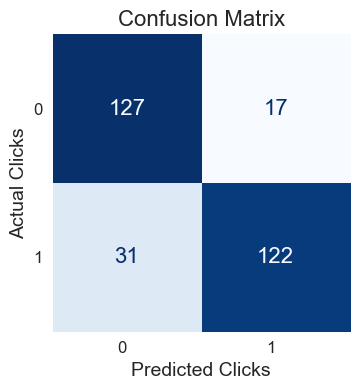

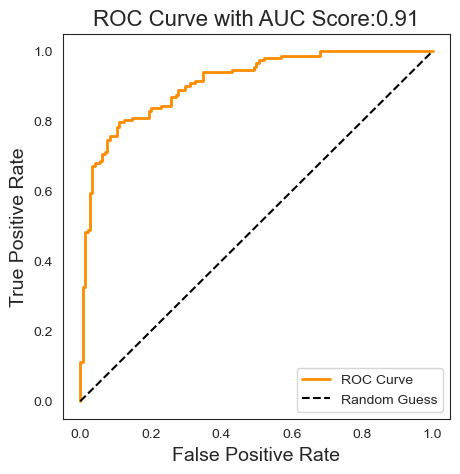

In [676]:
xg_tuned = eval_model(xgbc_model, "XGBoost (Tuned)", X_unseen, y_unseen)

In [679]:
eval_results = pd.concat([lg_baseline,rf_tuned,xg_tuned], ignore_index=True)
eval_results

Model  Accuracy Score  ROC_AUC  F1 Score
0  Logistic Regression (Baseline)        0.639731 0.698575  0.642140
1           Random Forest (Tuned)        0.808081 0.904321  0.810631
2                 XGBoost (Tuned)        0.838384 0.910902  0.835616

In [680]:
eval_results.set_index('Model')

Accuracy Score  ROC_AUC  F1 Score
Model                                                            
Logistic Regression (Baseline)        0.639731 0.698575  0.642140
Random Forest (Tuned)                 0.808081 0.904321  0.810631
XGBoost (Tuned)                       0.838384 0.910902  0.835616

# CONCLUSION:
### 1. **`XGBoost (Tuned)`** achieved the highest `ROC_AUC score of 0.9109`, making it the best-performing model for predicting "Clicked on Ad" based on its ability to distinguish between classes.

### 2. **`Random Forest (Tuned)`** also performed well with a `ROC_AUC of 0.9043`, showing strong predictive power and reliability, though slightly lower than XGBoost.

### 3. **`Logistic Regression (Baseline)`** had the lowest `ROC_AUC of 0.6986`, indicating weaker performance, and it serves as a baseline for comparison with the tuned tree-based models.

# 🌟BUSINESS RECOMMENDATIONS🌟

### 1. Prioritize XGBoost for Ad Targeting:
- Use the XGBoost model to identify users most likely to click on ads and focus campaigns on them.

### 2. Optimize Ad Spend:
- Allocate budgets efficiently by prioritizing high-probability users while minimizing spending on less responsive audiences.

### 3. Focus on Evening Ad Campaigns:
- Deploy ads during evening hours when users are more likely to engage, as indicated by usage patterns.

### 4. Personalize Ad Content:
- Leverage key drivers (e.g., Age, Internet Usage) to create tailored and relevant ad messaging for targeted user segments.

### 5. Segment Users for Engagement:
- Categorize users into high, medium, and low likelihood groups and design strategies specific to each segment.

### 6. Validate with A/B Testing:
- Test XGBoost predictions in real campaigns and measure performance metrics like CTR (Click-Through Rate) and ROI (Return on Investment) to fine-tune targeting strategies.